Saving telecom_churn.csv to telecom_churn (1).csv
Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64
Accuracy: 0.9250374812593704

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.85      0.61      0.71       101

    accuracy                           0.93       667
   macro avg       0.89      0.80      0.83       667
weighted avg       0.92      0.93      0.92       667



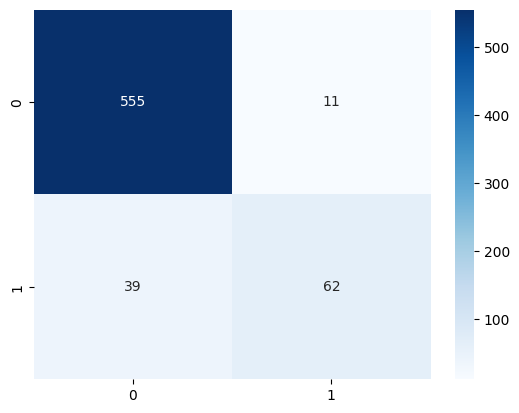

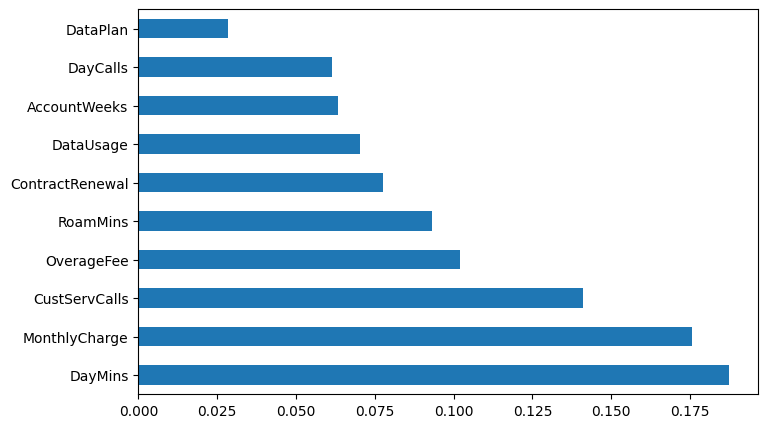

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# Upload via Colab file uploader
from google.colab import files
uploaded = files.upload()

# Load data (example: churn.csv)
df = pd.read_csv("telecom_churn.csv")
df.head()
# Check for missing values
print(df.isnull().sum())

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Features (X) and Target (y)
X = df.drop("Churn", axis=1)  # assuming "Churn" is the target column
y = df["Churn"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Random Forest (easy and effective)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,5))
plt.show()

![telecom_churn.csv](data:text/csv;base64,Q2h1cm4sQWNjb3VudFdlZWtzLENvbnRyYWN0UmVuZXdhbCxEYXRhUGxhbixEYXRhVXNhZ2UsQ3VzdFNlcnZDYWxscyxEYXlNaW5zLERheUNhbGxzLE1vbnRobHlDaGFyZ2UsT3ZlcmFnZUZlZSxSb2FtTWlucw0KMCwxMjgsMSwxLDIuNywxLDI2NS4xLDExMCw4OSw5Ljg3LDEwDQowLDEwNywxLDEsMy43LDEsMTYxLjYsMTIzLDgyLDkuNzgsMTMuNw0KMCwxMzcsMSwwLDAsMCwyNDMuNCwxMTQsNTIsNi4wNiwxMi4yDQowLDg0LDAsMCwwLDIsMjk5LjQsNzEsNTcsMy4xLDYuNg0KMCw3NSwwLDAsMCwzLDE2Ni43LDExMyw0MSw3LjQyLDEwLjENCjAsMTE4LDAsMCwwLDAsMjIzLjQsOTgsNTcsMTEuMDMsNi4zDQowLDEyMSwxLDEsMi4wMywzLDIxOC4yLDg4LDg3LjMsMTcuNDMsNy41DQowLDE0NywwLDAsMCwwLDE1Nyw3OSwzNiw1LjE2LDcuMQ0KMCwxMTcsMSwwLDAuMTksMSwxODQuNSw5Nyw2My45LDE3LjU4LDguNw0KMCwxNDEsMCwxLDMuMDIsMCwyNTguNiw4NCw5My4yLDExLjEsMTEuMg0KMSw2NSwxLDAsMC4yOSw0LDEyOS4xLDEzNyw0NC45LDExLjQzLDEyLjcNCjAsNzQsMSwwLDAuMzQsMCwxODcuNywxMjcsNDkuNCw4LjE3LDkuMQ0KMCwxNjgsMSwwLDAsMSwxMjguOCw5NiwzMSw1LjI1LDExLjINCjAsOTUsMSwwLDAuNDQsMywxNTYuNiw4OCw1Mi40LDEyLjM4LDEyLjMNCjAsNjIsMSwwLDAsNCwxMjAuNyw3MCw0NywxNS4zNiwxMy4xDQoxLDE2MSwxLDAsMCw0LDMzMi45LDY3LDg0LDE1Ljg5LDUuNA0KMCw4NSwxLDEsMy43MywxLDE5Ni40LDEzOSw5NS4zLDE0LjA1LDEzLjgNCjAsOTMsMSwwLDAsMywxOTAuNywxMTQsNTEsMTAuOTEsOC4xDQowLDc2LDEsMSwyLjcsMSwxODkuNyw2Niw3OCwxMC42NCwxMA0KMCw3MywxLDAsMCwxLDIyNC40LDkwLDUyLDcuOTgsMTMNCjAsMTQ3LDEsMCwwLjMxLDAsMTU1LjEsMTE3LDUwLjEsMTEuOTksMTAuNg0KMSw3NywxLDAsMCw1LDYyLjQsODksMjYsOC41LDUuNw0KMCwxMzAsMSwwLDAsMCwxODMsMTEyLDM4LDMuNjUsOS41DQowLDExMSwxLDAsMC4zOSwyLDExMC40LDEwMywzNC45LDYuODcsNy43DQowLDEzMiwxLDAsMCwwLDgxLjEsODYsMzUsMTIuMjYsMTAuMw0KMCwxNzQsMSwwLDAsMywxMjQuMyw3Niw0NSwxMy44NiwxNS41DQowLDU3LDEsMSwyLjU3LDAsMjEzLDExNSw3OC43LDkuNTYsOS41DQowLDU0LDEsMCwwLDMsMTM0LjMsNzMsMzcsNy43OCwxNC43DQowLDIwLDEsMCwwLjMyLDAsMTkwLDEwOSw1OC4yLDEyLjkxLDYuMw0KMCw0OSwxLDAsMC4yMSwxLDExOS4zLDExNyw0MS4xLDEwLjc2LDExLjENCjAsMTQyLDEsMCwwLDIsODQuOCw5NSwyNyw2Ljg0LDE0LjINCjAsNzUsMSwwLDAsMSwyMjYuMSwxMDUsNTYsMTAuMDgsMTAuMw0KMCwxNzIsMSwwLDAsMywyMTIsMTIxLDM5LDEuNTYsMTIuNg0KMSwxMiwxLDAsMCwxLDI0OS42LDExOCw2NCwxMi42MiwxMS44DQowLDU3LDEsMSwyLjI0LDAsMTc2LjgsOTQsNjkuNCw5Ljc1LDguMw0KMCw3MiwxLDEsMy45NywzLDIyMCw4MCw5NS43LDEwLjg3LDE0LjcNCjAsMzYsMSwxLDMuOTIsMCwxNDYuMywxMjgsNzguMiw4LjEzLDE0LjUNCjAsNzgsMSwwLDAsMSwxMzAuOCw2NCw0MiwxMS4xOSwxMA0KMCwxMzYsMCwxLDIuODQsMywyMDMuOSwxMDYsNzkuNCw5LjM4LDEwLjUNCjAsMTQ5LDEsMCwwLDEsMTQwLjQsOTQsNDcsMTMuNTksMTEuMQ0KMCw5OCwxLDAsMC4zLDMsMTI2LjMsMTAyLDM5LDguMzQsOS40DQoxLDEzNSwwLDEsMy45NCwwLDE3My4xLDg1LDg2LjQsMTAuMiwxNC42DQowLDM0LDEsMCwwLDIsMTI0LjgsODIsNDYsMTQuMTEsMTANCjAsMTYwLDEsMCwwLjM4LDMsODUuOCw3NywzMi44LDguMjcsOS4yDQowLDY0LDEsMCwwLjI0LDEsMTU0LDY3LDQ4LjQsMTEuMjksMy41DQowLDU5LDEsMSwyLjMsMiwxMjAuOSw5Nyw2MiwxMC42NSw4LjUNCjAsNjUsMSwwLDAsMywyMTEuMywxMjAsNTAsOC4xMywxMy4yDQowLDE0MiwxLDAsMC4zNSwyLDE4NywxMzMsNDcuNSw2LjczLDcuNA0KMSwxMTksMSwwLDAsNSwxNTkuMSwxMTQsNDcsMTEuNTcsOC44DQowLDk3LDEsMSwyLjk3LDEsMTMzLjIsMTM1LDcxLjcsMTAuODYsMTENCjAsNTIsMSwwLDAuMzIsMywxOTEuOSwxMDgsNTkuMiwxMy40OSw3LjgNCjAsNjAsMSwwLDAsMSwyMjAuNiw1Nyw1NiwxMC41Niw2LjgNCjAsMTAsMSwwLDAsMiwxODYuMSwxMTIsNDgsOS41MSwxMS40DQowLDk2LDEsMCwwLjIxLDIsMTYwLjIsMTE3LDUyLjEsMTMuMzgsOS4zDQoxLDg3LDEsMCwwLDUsMTUxLDgzLDQ1LDEwLjk5LDkuNw0KMCw4MSwxLDAsMC4xMSwxLDE3NS41LDY3LDUzLjEsMTIuNDcsMTAuMg0KMCwxNDEsMSwwLDAsMSwxMjYuOSw5OCwzNyw5LDgNCjEsMTIxLDEsMSwxLjU3LDMsMTk4LjQsMTI5LDU2LjcsMy43Nyw1LjgNCjAsNjgsMSwwLDAsMywxNDguOCw3MCw0NywxMi4zMywxMi4xDQowLDEyNSwxLDAsMCwxLDIyOS4zLDEwMyw1NSw4Ljg3LDEyDQowLDE3NCwxLDAsMCwxLDE5Mi4xLDk3LDQ4LDguNSwxMS40DQowLDExNiwxLDEsMy4xMywyLDI2OC42LDgzLDkyLjMsOC45MSwxMS42DQowLDc0LDEsMSwzLjk0LDIsMTkzLjcsOTEsOTMuNCwxMi4zMSwxNC42DQowLDE0OSwxLDEsMy40LDMsMTgwLjcsOTIsODEsOS4zOSwxMi42DQowLDM4LDEsMCwwLDIsMTMxLjIsOTgsMzcsOC4xNSw4LjINCjAsNDAsMSwxLDEuNjcsMiwxNDguMSw3NCw1Ni43LDguNDgsNi4yDQowLDQzLDAsMCwwLDAsMjUxLjUsMTA1LDYxLDEwLjY0LDkuMw0KMCwxMTMsMCwwLDAsMCwxMjUuMiw5MywzOSwxMC4zMiw4LjMNCjAsMTI2LDEsMCwwLDEsMjExLjYsNzAsNTUsMTAuODUsNy44DQoxLDE1MCwxLDAsMCw0LDE3OC45LDEwMSw0NSw4LjQ2LDEzLjgNCjAsMTM4LDEsMCwwLDMsMjQxLjgsOTMsNTYsOC41MywxMS44DQowLDE2MiwxLDEsMy4yNywwLDIyNC45LDk3LDg3LjcsOS40MSwxMi4xDQowLDE0NywxLDAsMCwzLDI0OC42LDgzLDU1LDcuNDUsOA0KMCw5MCwxLDAsMCwxLDIwMy40LDE0Niw1NCwxMS4zNCw3LjMNCjAsODUsMSwwLDAsMCwyMzUuOCwxMDksNTQsNy44NiwxMg0KMCw1MCwxLDAsMCwxLDE1Ny4xLDkwLDQ2LDExLjE3LDYuMQ0KMSw4MiwxLDAsMC4yMSwwLDMwMC4zLDEwOSw2OS4xLDkuMDUsMTEuNw0KMSwxNDQsMSwwLDAuMjEsNCw2MS42LDExNywyMC4xLDMuODYsOC4yDQowLDQ2LDEsMCwwLjI2LDIsMjE0LjEsNzIsNTMuNiw4LjIyLDguMg0KMCw3MCwxLDAsMC4zLDEsMTcwLjIsOTgsNDYsNy43NiwxNQ0KMCwxNDQsMSwwLDAsMSwyMDEuMSw5OSw2MCwxNS4xOCwxMy4yDQowLDExNiwwLDAsMC4zLDMsMjE1LjQsMTA0LDU4LDEwLjI0LDEyLjYNCjAsNTUsMSwxLDIuOTcsMywxNjUuNiwxMjMsNjkuNyw2LjgxLDExDQowLDcwLDEsMSwyLjY1LDEsMjQ5LjUsMTAxLDkxLjUsMTIuOTksOS44DQoxLDEwNiwxLDAsMCwyLDIxMC42LDk2LDU3LDEyLjQ2LDEyLjQNCjAsMTI4LDEsMSwyLjMyLDAsMTc5LjMsMTA0LDczLjIsMTEuMyw4LjYNCjEsOTQsMSwwLDAsNCwxNTcuOSwxMDUsNDEsNy43NSw4DQowLDExMSwxLDAsMCwxLDIxNC4zLDExOCw1NSwxMC40MywxMg0KMCw3NCwxLDEsMi45NCwyLDE1NC4xLDEwNCw2Ni40LDYuMTcsMTAuOQ0KMSwxMjgsMSwwLDAsMSwyMzcuOSwxMjUsNjIsMTIuMzgsMTMuOQ0KMCw4MiwxLDAsMC4xNywxLDE0My45LDYxLDQzLjcsOS43NSwxMS4xDQoxLDE1NSwxLDAsMCwwLDIwMy40LDEwMCw1MSw5LjU1LDguOQ0KMCw4MCwxLDAsMCwxLDEyNC4zLDEwMCwzNiw4LjY1LDcuOQ0KMCw3OCwxLDAsMCwzLDI1Mi45LDkzLDU5LDguOTIsOS41DQowLDkwLDEsMCwwLDMsMTc5LjEsNzEsNDcsOS41MywxMC42DQowLDEwNCwxLDAsMC4zLDEsMjc4LjQsMTA2LDU4LDQuMDUsOS44DQowLDczLDEsMCwwLDAsMTYwLjEsMTEwLDQ2LDEwLjY3LDEzDQowLDk5LDEsMCwwLDQsMTk4LjIsODcsNTIsMTAuMzcsOC43DQoxLDEyMCwxLDAsMCwxLDIxMi4xLDEzMSw1NCwxMC40Nyw1LjMNCjEsNzcsMSwwLDAsMiwyNTEuOCw3Miw2MSwxMC4yOSw5LjgNCjAsOTgsMSwxLDEuMTksNCwxNjEuMiwxMTQsNjAuOSwxMi42MSw0LjQNCjAsMTA4LDEsMCwwLjM0LDAsMTc4LjMsMTM3LDUwLjQsOS40NSwxNC42DQowLDEzNSwxLDAsMCwwLDE1MS43LDgyLDM2LDUuOTUsMTAuNQ0KMCw5NSwxLDAsMCwxLDEzNSw5OSwzOSw5LjE4LDEyLjUNCjAsMTIyLDEsMCwwLjM5LDEsMTcwLjUsOTQsNDcuOSw4LjY5LDExLjMNCjAsOTUsMSwwLDAsNCwyMzguMSw2NSw1Nyw5LjM2LDExLjgNCjAsMzYsMSwxLDIuNDMsMiwyODEuNCwxMDIsOTAuMywxMC4xMSw5DQowLDkzLDEsMSwyLjY1LDEsMTE3LjksMTMxLDYxLjUsOC4yMyw5LjgNCjAsMTQxLDEsMSwyLjczLDEsMTQ4LjYsOTEsNjQuMyw2LjU2LDEwLjENCjAsMTU3LDEsMCwwLDMsMjI5LjgsOTAsNTIsNy40LDkuNg0KMCwxMjAsMSwwLDAsMSwxNjUsMTAwLDU2LDE1Ljg2LDguMw0KMCwxMDMsMSwwLDAsMiwxODUsMTE3LDUxLDExLjE3LDEyLjYNCjAsOTgsMSwwLDAsNCwxNjEsMTE3LDQ0LDkuNTUsMTIuMQ0KMCwxMjUsMSwwLDAsMSwxMjYuNywxMDgsNDAsMTAuMywxMy4zDQowLDYzLDEsMCwwLDEsNTguOSwxMjUsMjUsOC40OCw5LjQNCjEsMzYsMCwxLDUuNCwwLDE5Ni44LDg5LDExMCwxMi43NSwyMA0KMCw2NCwxLDAsMC4yOSwxLDE2Mi42LDgzLDQzLjksNy42MiwxNC4yDQoxLDc0LDEsMCwwLjIxLDEsMjgyLjUsMTE0LDY5LjEsMTEsOS40DQowLDExMiwxLDEsMi43LDIsMTEzLjcsMTE3LDYwLDcuODgsMTANCjAsOTcsMSwwLDAsMiwyMzkuOCwxMjUsNjAsMTAuNzQsOC43DQowLDQ2LDEsMCwwLjIxLDEsMjEwLjIsOTIsNTguMSwxMS4zNywxMy4xDQowLDQxLDEsMSwxLjk0LDAsMjEzLjgsMTAyLDY4LjQsNy4wOSw3LjINCjAsMTIxLDEsMCwwLDMsMTkwLjcsMTAzLDQ5LDkuMTgsOS44DQowLDE5MywxLDAsMCwxLDE3MC45LDEyNCw0MSw2LjYyLDExLjYNCjAsMTMwLDEsMCwwLDIsMTU0LjIsMTE5LDM2LDUuNTEsOS4yDQowLDg1LDEsMCwwLjQsMSwyMDEuNCw1Miw1OCwxMS40NywxMg0KMSwxNjIsMSwwLDAsNCw3MC43LDEwOCwyNiw3Ljg4LDkuMQ0KMSw2MSwxLDEsMS43Myw0LDE4Ny41LDEyNCw2Mi4zLDcuMzMsNi40DQowLDkyLDEsMCwwLDIsOTEuNyw5MCwzMyw5LjY5LDkuMg0KMCwxMzEsMSwxLDIuNTcsMywyMTQuMiwxMTUsNzYuNyw4LjA5LDkuNQ0KMCw5MCwxLDAsMCwzLDE0NS41LDkyLDQ0LDEwLjg5LDEwLjkNCjAsNzUsMSwwLDAsMSwxNjYuMywxMjUsNDIsNy45MSw2LjENCjAsNzgsMSwwLDAsMSwyMzEsMTE1LDU5LDExLjUyLDkuNQ0KMCw4MiwxLDAsMCw0LDIwMC4zLDk2LDUyLDEwLjA2LDcuMQ0KMCwxNjMsMSwwLDAsMSwxOTcsMTA5LDUxLDEwLjEzLDkuMQ0KMCw5MSwwLDAsMC4zMSwzLDEyOS45LDExMiw0MC4xLDguNjcsMTEuMg0KMCw3NSwxLDEsMS40Myw1LDE3NS44LDk3LDYzLjMsMTAuODgsNS4zDQowLDkxLDEsMCwwLDMsMjAzLjEsMTA2LDUzLDEwLjUxLDEyDQowLDEyNywxLDEsMy4wMiwxLDE4My4yLDExNyw3Mi4yLDYuMzQsMTEuMg0KMCwxMTMsMSwxLDIuNzUsMiwyMDUsMTAxLDc1LjUsNy42LDEwLjINCjAsMTEwLDEsMCwwLDEsMTQ4LjUsMTE1LDQ5LDEzLjgyLDEyLjQNCjAsMTIwLDEsMSwyLjg0LDAsMjAwLjMsNjgsODEuNCwxMS4wMiwxMC41DQowLDE1NywxLDEsMS44NCwzLDE5Mi42LDEwNyw2OC40LDkuNzgsNi44DQowLDEwMywxLDAsMCwxLDI0Ni41LDQ3LDU5LDkuNzgsMTEuNw0KMSwxMTcsMCwwLDAsMiwxNjcuMSw4Niw0NCw4Ljg4LDE0LjENCjAsMTQwLDEsMCwwLDMsMjMxLjksMTAxLDU0LDguMDEsMTQuMw0KMCwxMjcsMSwwLDAsMSwxNDYuNyw5MSw0MywxMC4xOCwxMy43DQowLDgzLDAsMCwwLjI2LDEsMjcxLjUsODcsNjcuNiwxMC44MiwxMS43DQowLDEyMSwxLDAsMCwxLDE4MS41LDEyMSw1MCwxMC45Miw4LjUNCjAsMTQ1LDEsMSwzLDIsMjU3LjcsOTcsODgsOC4xMSwxMS4xDQowLDExMywxLDAsMCwxLDE5My44LDk5LDUyLDExLjA3LDEwLjYNCjAsMTE3LDEsMCwwLDEsMTAyLjgsMTE5LDM2LDEwLjM0LDEwLjENCjAsNjUsMSwwLDAsMSwxODcuOSwxMTYsNDYsNy44OCw3LjUNCjAsNTYsMSwwLDAsMSwyMjYsMTEyLDYwLDEyLjQzLDYuOQ0KMCw5NiwxLDAsMCw1LDI2MC40LDExNSw1Nyw3LjMsMTEuNQ0KMCwxNTEsMSwwLDAsMCwxNzguNywxMTYsNTYsMTQuNjEsOS44DQoxLDgzLDEsMCwwLDAsMzM3LjQsMTIwLDc3LDExLjM3LDE1LjgNCjAsMTM5LDEsMSwzLjcsMCwxNTcuNiwxMjksODUsMTIuMzUsMTMuNw0KMCw2LDEsMCwwLDEsMTgzLjYsMTE3LDU0LDEyLjg0LDEwLjINCjAsMTE1LDEsMSwyLjU5LDEsMTQyLjEsMTI0LDY1LjksOS4xNyw5LjYNCjAsODcsMSwwLDAuMzEsMCwxMzYuMyw5Nyw0MS4xLDguNjEsNy4xDQowLDE0MSwxLDAsMCwwLDIxNy4xLDExMCw1OCwxMi4wOCwxMg0KMCwxNDEsMSwxLDIuODQsMywxODcuNSw5OSw4MS40LDEyLjA3LDEwLjUNCjAsNjIsMSwwLDAsMSw5OC45LDEwMywyOSw2Ljc3LDEyLjINCjAsMTQ2LDEsMCwwLDEsMjA2LjMsMTUxLDQ4LDcuNDMsNi4xDQowLDkyLDEsMSwzLjI3LDIsMjQzLjEsOTIsOTIuNywxMC42OSwxMi4xDQowLDE4NSwxLDEsMi4wMywxLDE4OS44LDEyNiw2Ny4zLDguMTcsNy41DQowLDE0OCwxLDAsMC4zOSwxLDIwMiwxMDIsNTkuOSwxMi4xNiwxMC45DQowLDk0LDEsMSwzLjQ2LDEsMTcwLjEsMTI0LDgwLjYsOS42NywxMi44DQowLDMyLDEsMCwwLDAsMjMwLjksODcsNTYsOS4zNyw2LjMNCjAsNjgsMSwwLDAsMSwyMzcuMSwxMDUsNjAsMTEuMTgsMTMuMg0KMCw2NCwxLDEsMi44NiwyLDE4Mi4xLDkxLDc0LjYsOC40OSwxMC42DQowLDI1LDEsMCwwLjE0LDMsMTE5LjMsODcsNDAuNCwxMC41OCwxMC41DQowLDY1LDEsMCwwLDEsMTE2LjgsODcsMzYsOC45NSwxNC4xDQowLDE3OSwxLDAsMCwwLDIxOS4yLDkyLDUwLDcuNDcsNi4xDQowLDk0LDEsMCwwLDIsMjUyLjYsMTA0LDU4LDguNDUsMTEuMQ0KMCw2MiwxLDAsMCwwLDE0Ny4xLDkxLDQyLDkuNTIsMTIuMg0KMCwxMjcsMSwwLDAsMiwyMDIuMSwxMDMsNTQsMTEuNDcsMTEuNQ0KMCwxMTYsMSwwLDAuMjMsMywxNzMuNSw5Myw0OC4zLDkuNzEsMTYuMg0KMCw3MCwxLDAsMCwzLDIzMi4xLDEyMiw2NSwxNC42MiwwDQowLDk0LDAsMSwyLjU3LDQsMTk3LjEsMTI1LDc3LjcsMTAuNzMsOS41DQoxLDEyNiwxLDAsMCw1LDU4LjIsOTQsMjIsNi45NCwxMS45DQowLDY3LDEsMSwyLjY3LDIsMTE1LjYsMTExLDY2LjcsMTEuODksOS45DQowLDE5LDEsMCwwLjE0LDIsMTg2LjEsOTgsNTUuNCwxMi43MiwxNC42DQowLDE3MCwwLDAsMCwzLDI1OS45LDY4LDY2LDEyLjI1LDguNA0KMCw3MywxLDAsMCwxLDIxNC4zLDE0NSw2MCwxMy40MywxMC44DQowLDEwNiwxLDAsMCwxLDE1OC43LDc0LDMzLDMuMjIsMTAuMg0KMCw5MywxLDAsMC4xOSwyLDI3MS42LDcxLDY3LjksMTEuNDcsMTAuOQ0KMCwxNjQsMSwwLDAuMjcsMSwxNjAuNiwxMTEsNDQuNyw4LjE2LDkNCjAsNTEsMSwwLDAsMSwyMzIuNCwxMDksNTYsOS4zNyw5LjENCjAsMTA3LDEsMCwwLDAsMTMzLjgsODUsMzksOS4wMyw4LjkNCjAsMTMwLDEsMCwwLjM1LDEsMTc2LjksMTA5LDQxLjUsNC41NCw5LjUNCjAsODAsMSwwLDAsMiwyMDkuOSw3NCw1Myw5Ljc2LDguOA0KMCw5NCwxLDAsMC4yMiwwLDEzNy41LDExOCw0My4yLDEwLjE2LDEzLjQNCjAsMTE4LDEsMSwyLjU3LDEsMjg5LjUsNTIsODkuNyw4LjMzLDkuNQ0KMCwxMTcsMSwxLDEuODQsMSwxOTguMSw4Niw2Ny40LDguODUsNi44DQowLDc4LDEsMCwwLDAsMTQ5LjcsMTE5LDQxLDkuMTEsOS43DQoxLDIwOCwxLDAsMC4zMywyLDMyNi41LDY3LDc0LjMsOC44MiwxMC43DQoxLDEzMSwwLDEsMy43Myw0LDI5Mi45LDEwMSwxMDQuMyw5Ljk5LDEzLjgNCjAsNjMsMSwwLDAsMCw4Myw2NCwzMCw4Ljg1LDEzDQowLDUzLDEsMSwzLjU0LDMsMTQ1LjcsMTQ2LDc5LjQsMTEuMDMsMTMuMQ0KMCw2MiwxLDAsMCwyLDE4Mi4zLDEwMSw1OSwxNi40MSwxMS4yDQowLDk3LDEsMCwwLDMsMjE4LDg2LDUzLDkuMiw2LjQNCjAsMTA1LDEsMCwwLDIsMTQwLjYsMTA5LDQwLDguOTMsNi44DQowLDE1NywxLDAsMCwxLDE1Mi43LDEwNSw0OCwxMi44OCw5LjQNCjAsNjYsMSwxLDMuMjcsMSwxMDYuNyw3Niw2OC43LDEwLjQ5LDEyLjENCjAsMTIyLDEsMCwwLDIsMjQzLjgsOTgsNDksNC4yLDEzLjcNCjAsMzgsMSwwLDAsMywxOTQuNCw5NCw0OSw5LjM0LDEwLjgNCjAsMTA2LDEsMCwwLDMsMjEzLjksOTUsNTAsNy42LDEyLjINCjAsOTksMSwwLDAsMywyMTcuMiwxMTIsNTgsMTIuMzQsMTUuOA0KMCw5OSwxLDAsMCwxLDI0MS4xLDcyLDU1LDcuNzgsMTEuNg0KMCwxNDQsMCwwLDAsMCwyMDMuNSwxMDAsNTYsMTIuMzgsMTEuOQ0KMCw4MiwxLDEsMi44OSwxLDE1NS4yLDEzMSw3Ni45LDEyLjIzLDEwLjcNCjAsODYsMSwxLDMuMjksMSwxNjcuNiwxMzksNzEuOSw1LjY1LDEyLjINCjEsNzAsMCwwLDAsMiwyMjYuNyw5OCw1OCwxMS40MSwxNy42DQowLDkzLDEsMCwwLDMsMTc5LjMsOTMsNDYsOC45MywxMS41DQowLDkzLDEsMCwwLjMxLDAsMTUxLjQsODksNDUuMSw5LjMyLDEwLjkNCjAsMTIwLDEsMCwwLDMsMTgwLDgwLDUwLDExLjIxLDQuNw0KMSwxMzYsMSwwLDAsMSwyNTAuMiwxMjEsNjYsMTMuMzYsMTMNCjAsMTA2LDEsMCwwLjQsMCwyMjMsMTIxLDUyLDUuNTEsNy4xDQowLDgxLDEsMCwwLDMsMTgzLjYsMTE2LDQ1LDcuNjMsMTIuMg0KMCwxMjcsMSwxLDIuNzUsMSwxNjYsMTE0LDcxLjUsOC43MywxMC4yDQowLDY1LDEsMCwwLDEsMTM2LjEsMTEyLDQ3LDEzLjY1LDQuNA0KMCwzNSwxLDAsMC4zMiwyLDE0OS4zLDExMyw0OS4yLDEyLjExLDguOQ0KMCw4OCwxLDAsMCwyLDY1LjQsOTcsMjYsOC40MSwxMy44DQowLDY1LDEsMCwwLDEsMjEzLjQsMTExLDU3LDExLjczLDIuNw0KMCwxMjMsMSwwLDAsMywyMDYuOSw4NSw1NiwxMi4yNCw3LjcNCjAsMTI2LDEsMSwyLjU5LDIsMTg2LjIsNzgsNzMuOSw5LjQ4LDkuNg0KMCwxMDQsMSwxLDMuNTksNCwyODAuMiwxMzYsMTAyLjksMTEuMDMsMTMuMw0KMCw0NSwxLDEsMy4yMSwwLDE5Ni42LDg0LDkzLjEsMTUuNjYsMTEuOQ0KMSw5MywwLDAsMCwwLDMxMiwxMDksNjUsNi40NywxMC41DQowLDYzLDAsMSwyLjk3LDEsMTk5LDExMCw4OC43LDE0LjU3LDExDQowLDEwMCwxLDAsMC4yNSwzLDIwMy4xLDk2LDU1LjUsMTAuODUsMTMuNQ0KMCw1MywxLDAsMCwwLDE2OC44LDk3LDQ4LDExLjAyLDEwLjkNCjAsOTIsMCwwLDAsMSwxNzMuMSwxNDAsNTAsMTIuMDIsOQ0KMSwxMzksMSwwLDAsNSwxMzQuNCwxMDYsNDEsMTAuNTcsMTAuMg0KMCwxMTAsMSwxLDIuNDMsMiwyMDIuNiwxMDMsNjkuMyw1Ljk0LDkNCjAsMTEwLDEsMCwwLjMxLDMsNzQuNSwxMTcsMzMuMSwxMC4wNCw5LjgNCjAsMjE1LDEsMCwwLjMxLDAsODMuNiwxNDgsMjguMSw2LjA1LDEwLjcNCjAsNzMsMSwwLDAsMSwxOTIuMiw4Niw0Nyw4LjQzLDkuNA0KMCwxMzgsMSwwLDAsMCwyMjAuMiw4OSw0NSw0LjQyLDEyLjkNCjEsMTM3LDAsMCwwLDIsMTM1LjEsOTUsMzUsNi43MSwxMi4zDQowLDM2LDEsMCwwLjI1LDEsMjUzLjQsNzcsNjEuNSw5LjEyLDguNA0KMCw4NSwxLDAsMCwzLDIyNSw4MSw1NCw4Ljg1LDcuMQ0KMSwxMDgsMSwwLDAsMCwxOTguNSw5OSw1NywxMy4zOSw5LjQNCjAsMjIsMSwwLDAsMCwxMTAuMywxMDcsMzMsOC4zMyw5LjUNCjAsMTA3LDEsMSwzLDAsNjAsMTAyLDQ5LDUuMTEsMTEuMQ0KMCw1MSwxLDAsMCwwLDIxNC44LDk0LDUwLDcuNDksMTAuMg0KMCw5NCwxLDAsMCw0LDE4MS44LDg1LDQ5LDEwLjEyLDkuMg0KMCwxMTksMSwxLDMuMTksMiwxNTQsMTE0LDgxLjksMTMuOSwxMS44DQoxLDMzLDEsMSwzLjc1LDQsMTU3LjQsOTksNzQuNSw1LjksMTMuOQ0KMCwxMDYsMSwwLDAsNCwyMDcuOSw5MSw1MCw4LjYsMTQuNA0KMCw4MiwxLDAsMCwzLDIwNyw5MCw1NSwxMS42NSw5LjENCjAsODYsMSwxLDIuNTcsMCwxMTksMTAxLDY1LjcsMTEuNSw5LjUNCjAsOTcsMCwwLDAuMjgsMCwxNDMuNywxMTcsNTAuOCwxMy42NSwxMC45DQowLDEwNiwxLDEsMy44MSw0LDE2NS45LDEyNiw4NS4xLDEwLjgzLDE0LjENCjAsMTA4LDEsMCwwLDEsMTM4LjYsMTIyLDM5LDguNjIsOS44DQowLDExNCwxLDAsMC4yOSwxLDg0LjcsMTE4LDM4LjksMTIuNSwxNC41DQoxLDkyLDAsMCwwLDEsNjIuNiwxMTEsMjYsOS4wMywxMC40DQowLDU5LDEsMCwwLDEsMTU1LjIsNzksNDcsMTEuNzcsOC43DQowLDI0LDEsMSwxLjgxLDEsMTY0LjksMTEwLDY0LjEsMTAuNDcsNi43DQowLDE1MSwxLDAsMCwxLDEzNC41LDg4LDM2LDcuMTYsMTUuNA0KMCwxMTcsMSwwLDAsMSwxNDMuMywxMDMsNDMsMTAuNTcsMTEuNQ0KMCw3OCwxLDAsMC41MSwxLDE2OC4zLDExMCw1My4xLDExLjA2LDEyLjUNCjAsMTU1LDEsMCwwLDIsMjYyLjQsNTUsNjIsOS43Myw4LjMNCjAsMTE0LDEsMSwzLjA4LDEsMjA2LjIsNzksODguOCwxMywxMS40DQowLDExNCwxLDEsMi4yNyw0LDIyNS44LDk0LDc3LjcsOS42NSw4LjQNCjAsMTE5LDEsMCwwLDMsMTM4LjMsODksMzgsOC41MywxMy41DQowLDY0LDEsMSwxLjIyLDAsOTQuNCwxMDQsNDAuMiw2LjgxLDQuNQ0KMCwxMTgsMCwwLDAsMiwxNjAsMTIzLDQzLDguNzcsOS45DQowLDEwMSwxLDAsMCwwLDIwNi42LDEwNSw1NSwxMS4yNSwxNC42DQowLDExNywxLDAsMCwxLDEzNC43LDEyMSwzOSw5LDcuNw0KMCw0OSwxLDEsMi4xNiwzLDIxNC40LDc4LDc4LjYsMTEuNzYsOA0KMCwxMzksMSwwLDAsMywxOTIuOCwxMDQsNTMsMTEuNzIsMTMNCjAsOTIsMSwxLDIuNywxLDE1MS4xLDkwLDcwLDkuNzQsMTANCjAsODMsMSwwLDAsMywyMjEuNCwxMDMsNTgsMTEuNTksOS44DQowLDE0OCwwLDAsMCwwLDIxOC45LDg4LDU1LDEwLjQsMTEuMQ0KMSwxNDQsMSwxLDEuNzYsMiwxODkuOCw5Niw2MC42LDYuMTcsNi41DQowLDEzMSwxLDEsMi45NCwyLDE5Mi43LDg1LDgxLjQsMTEuMywxMC45DQowLDE0NiwwLDAsMCwzLDIwNC40LDEzNSw1NCwxMC45NiwxMC41DQowLDE0MywxLDAsMC40MiwyLDE3Mi4zLDk3LDQ5LjIsOC43LDEzDQowLDgxLDEsMCwwLjEzLDIsMTk4LjQsOTMsNTMuMywxMC41NSwxMC40DQowLDQ4LDEsMSwzLjI5LDEsMjExLjcsMTE1LDgyLjksOCwxMi4yDQowLDg2LDEsMSwyLjQzLDEsMjIxLjYsNzQsODcuMywxNC40Miw5DQowLDcxLDEsMCwwLDMsMTk3LjksMTA4LDUwLDkuMDgsNi43DQowLDE0NSwxLDEsNC4yMSwyLDE0Ny41LDkwLDgzLjEsOC43OSwxNS42DQowLDEzNywxLDAsMCwyLDIwNi40LDEyMiw0Niw2LjQsOC44DQowLDEzNywxLDAsMC4yNywyLDIwNS45LDg4LDU1LjcsMTAuNDcsMTQuNQ0KMCwxNjcsMSwwLDAsMCwyMDcuNiw4OCw0Nyw2LjYyLDE0LjENCjEsODksMSwwLDAsMSwzMDMuOSw5NSw3NCwxMy4wNSw1LjMNCjAsMTk5LDEsMSwyLjE2LDAsMjMwLjYsMTIxLDc5LjYsMTAuOTcsOA0KMCwxMzIsMSwwLDAsMCw5OS41LDExMCwyOCw2LjQ2LDkuNw0KMCw5NCwxLDAsMCwxLDE3Ny4xLDExMiw0Nyw5LjcsNS45DQoxLDk2LDEsMSwyLjc4LDUsMTcyLjcsOTMsNjcuOCw2LjAxLDEwLjMNCjAsOTYsMSwxLDIuNjUsMSwxNzIuNyw4Niw2Ny41LDYuNjcsOS44DQowLDE2NiwxLDAsMC4yOSwxLDIwNC4yLDExNSw1Mi45LDksOS41DQowLDc0LDEsMCwwLjIsMiw4NS43LDgzLDM4LDEyLjM5LDEwLjENCjAsMzYsMSwwLDAuMzQsMCwxNTcuNiwxMTcsNDYuNCw5LjIyLDExLjkNCjAsMTEzLDEsMCwwLDQsMjE1LjUsMTI5LDU2LDEwLjk0LDYuNg0KMCw5NCwxLDAsMCwxLDE4MS41LDk4LDQ4LDEwLDYuNg0KMCw2NywxLDAsMCwyLDE3MS43LDgwLDM5LDUuNTIsMTEuOQ0KMSwxMjcsMSwwLDAuMjYsMSwyNjYuNiwxMDYsNzAuNiwxMy4yNCw1LjkNCjEsMTIxLDEsMCwwLDAsMTcwLjQsMTA4LDU5LDE3LjUzLDExLjINCjAsMTU4LDEsMCwwLDEsMTU4LDEwNiw1MiwxNC42Myw5LjENCjAsMTM2LDEsMCwwLjM0LDEsOTIsMTE3LDQxLjQsMTIuNjgsMTAuMw0KMCwxOTYsMSwwLDAsMiwyMzQsMTA5LDYxLDEyLjQ4LDkuMQ0KMSwxMTMsMSwwLDAsMSwyNzIuMSwxMTEsNzAsMTMuNDMsOC41DQoxLDEyMiwxLDAsMCw0LDI5Ni40LDk5LDY5LDEwLjc0LDExLjQNCjAsMTEyLDEsMCwwLjI5LDAsMTk0LjQsMTAxLDUyLjksOS41MiwxMS40DQowLDIwOSwxLDAsMCwzLDIyNy4yLDEyOCw2MSwxMi45Miw4LjkNCjEsNjIsMSwwLDAsMSwyNDguNywxMDksNjEsMTEsMTMuMg0KMCwxMTAsMSwxLDIuNjIsMSwyMzYuMywxMDIsODMuMiw5LjgsOS43DQowLDE2LDEsMCwwLDAsMjA1LjYsNjksNTAsOC40OCwxMC45DQowLDczLDEsMCwwLDAsOTQuMSwxMzYsNDAsMTQuMDIsOS44DQowLDEyOCwxLDAsMCwwLDEyNS4yLDk5LDM5LDEwLjI3LDE4LjkNCjAsMzksMSwwLDAuMjMsMSw2MC40LDE1OCwzOS4zLDE1LjMxLDEyLjQNCjAsMTAzLDEsMSwyLjA4LDIsMTIxLDEwNSw2NC44LDEzLjUyLDcuNw0KMCwxMTksMSwxLDIuMDUsMywxMTcuOCw2Niw2Mi41LDEyLjg0LDcuNg0KMCwxNzMsMSwxLDEuMzUsMywyMzIuNCw5Niw3MS41LDEwLjYsNQ0KMSwxMjgsMCwxLDIuNTQsMiwyMjMuNSw4MSw4MC40LDkuNDQsOS40DQowLDg2LDEsMCwwLDAsMTc2LjMsNzksNTIsMTIuOTYsNi4yDQowLDExNCwxLDEsMy40OCwxLDEyNS4yLDc5LDcxLjgsOC44OSwxMi45DQowLDEwNCwxLDAsMCwwLDEzOC43LDEwNyw0NiwxMi44NSwxMA0KMCwxNDgsMSwwLDAsMSw4Ni4zLDEzNCwzNiwxMi4zMywxMS4zDQowLDEyOSwxLDAsMCwzLDIwNyw5MSw0OSw3Ljc1LDEzLjQNCjAsMTAwLDEsMSwxLjkyLDAsNTguOCwxMDQsNDguMiwxMC45OCw3LjENCjAsMTIxLDEsMSwzLjA4LDEsNjguNyw5NSw2MC44LDEwLjQ2LDExLjQNCjAsMTQzLDEsMSwyLjU3LDEsMjM5LjIsMTA5LDg2LjcsMTEuNzgsOS41DQowLDc2LDEsMCwwLDAsMTk4LjMsMTMwLDUzLDEwLjg2LDEyLjUNCjAsMTU4LDEsMCwwLjE0LDAsMjA1LjIsOTcsNTcuNCwxMi4wMywxNC40DQowLDExNiwxLDAsMC4yNCwzLDE5Mi4xLDk4LDYyLjQsMTUuNjUsNy45DQoxLDU0LDEsMCwwLDEsMjcyLjYsODMsNjgsMTIuNDQsOS41DQoxLDg2LDEsMCwwLjMsNywxMjguMywxMjEsNDIsOS44NiwxMi4yDQowLDEwOCwxLDAsMCwwLDE2OS42LDk5LDUyLDEzLjIxLDkuMw0KMCw2NiwxLDAsMCwxLDIwMS4zLDk1LDQ4LDcuNjQsNy41DQowLDE1MSwxLDEsMi4zMiwxLDIxNC43LDk3LDcyLjIsNi45Myw4LjYNCjAsOTksMSwwLDAsMCwxNjkuMiw3MCw1MiwxMy41OCwxMC42DQowLDU1LDEsMCwwLDIsMTk0LjEsMTIxLDQ5LDguODMsNw0KMCw3NywxLDAsMCwyLDIzMy44LDEwNCw2MywxMy4zMyw3LjYNCjAsNzgsMSwwLDAsMCwyMjUuMSw2Nyw1Niw5Ljk2LDE0LjYNCjEsODksMSwwLDAsMSwyMTMsNjMsNTIsOC44Myw5LjENCjAsMTAxLDEsMCwwLDEsMTgzLjksMTE1LDU0LDEyLjgsMTAuOA0KMCw0NCwxLDEsMy43OCwwLDIyMS44LDEwNSw4OS44LDguMDksMTQNCjAsOTgsMSwxLDAsMiw2NC42LDk4LDI2LDguODEsMA0KMCw2NCwxLDEsMy41OSwxLDE1NC42LDkyLDY5LjksNC4xNywxMy4zDQowLDE0MSwxLDAsMCwzLDI2MC4yLDEzMSw2MCw4Ljk2LDcuMg0KMCw4MSwxLDEsMy4yOSwxLDE2MS42LDExNyw3MC45LDYuMTUsMTIuMg0KMCwxNjIsMSwwLDAsMSwyMjAuNiwxMTcsNTEsNy43NiwxMC41DQowLDgzLDEsMSwzLjU0LDMsMTU1LjksMTIyLDc2LjQsOC4xMiwxMy4xDQoxLDEwMCwxLDAsMC4zNCw0LDEwNyw2MywzMS40LDUuMjksMTIuOA0KMCw1OSwxLDAsMC41MSw0LDE4Mi41LDEwNCw1NC4xLDEwLjI0LDExLjMNCjAsMTc5LDAsMSwyLjczLDQsMjIwLjEsNzgsODUuMywxMS43MiwxMC4xDQowLDc5LDEsMCwwLDEsMTUyLjIsMTEyLDQxLDguODYsNS4zDQowLDExNywxLDAsMCwyLDE4MS41LDk1LDQ5LDEwLjI2LDE0LjcNCjEsNjQsMCwwLDAuMTgsMiwyMzYuMiw3Nyw2MC44LDEwLjkzLDEzLjINCjAsMzEsMSwwLDAuMjgsMSwxNjYuMSwxMDUsMzcuOCwzLjk3LDEyLjcNCjAsMTI0LDAsMCwwLDEsMjQ0LjYsODksNTgsOS40NCwxMS4zDQowLDEyMiwxLDEsMi4zLDIsMTM0LjIsODUsNjYsMTEuMzcsOC41DQowLDM3LDAsMSwyLjQ4LDEsMTQ5LjcsMTIyLDY4LjgsMTAuNTYsOS4yDQowLDkwLDEsMSwxLjU3LDEsMTUwLjEsMTA5LDY0LjcsMTMuMjQsNS44DQoxLDE1OSwwLDAsMC40NCwxLDI1Ny4xLDUzLDc1LjQsMTUuNjEsOC44DQowLDE0OCwxLDAsMCwwLDEyNC40LDgzLDM3LDguOTksMTEuMw0KMCwzOSwxLDEsMy4yNCwxLDE0MS43LDEyMSw3Ni40LDExLjYyLDEyDQowLDc3LDEsMCwwLjE0LDIsMjMwLDg3LDQ5LjQsNS4xNiwxMS4zDQowLDE5NCwxLDAsMCwwLDE2Mi4zLDg4LDQ2LDEwLjY5LDEwLjkNCjEsMTU0LDEsMCwwLDEsMzUwLjgsNzUsNzksMTAuODMsMTAuMQ0KMCwxMTIsMSwwLDAsNCwxOTMuMyw5Niw1NiwxMy4yMSw5LjENCjAsNDUsMSwwLDAsMSw3OC4yLDEyNywzNSwxMi42NywxOA0KMCwxMzIsMSwwLDAuMjIsMSw4My40LDExMCwzNi4yLDExLjYxLDcuNg0KMCwxMjgsMSwwLDAuMjgsMCwxOTUuNiw5OSw1OS44LDEzLjM5LDE2DQowLDEzNSwxLDAsMC40MiwxLDIwMS44LDgxLDU4LjIsMTEuMjUsMTAuMw0KMCw1NiwxLDAsMCwyLDE5NywxMTAsNTMsMTEuMTQsMTAuNg0KMSwxNTEsMCwwLDAuMjksMCwyMTgsNTcsNDkuOSw1LjcyLDEyLjQNCjAsMzIsMSwwLDAsMiwxNjQuOCw5OCw0OCwxMS41LDE0LjgNCjAsOTAsMSwwLDAsMiwxNzkuMiw3Nyw0OSwxMC41NCw5LjINCjAsODcsMSwxLDIuODYsMCwyMTQsMTEzLDgwLjYsOSwxMC42DQowLDEzOCwxLDAsMC40MywyLDE3MC41LDg3LDQ0LjMsNS45MSwxMS4yDQowLDc5LDEsMCwwLDEsMjA1LjcsMTIzLDU0LDEwLjczLDYuNw0KMSw5NSwwLDAsMCwxLDE2NS41LDg0LDUzLDE0LjMxLDExLjUNCjAsMTI3LDEsMCwwLjMzLDIsMjIxLDEwMCw1NS4zLDguMDQsNi44DQowLDEzNywxLDAsMCwzLDI0Mi4xLDExOCw1OCw5LjU1LDE0LjcNCjAsOTcsMSwwLDAsMSwxNTEuNiwxMDcsMzksNy43NywxNC43DQowLDE0OSwwLDAsMC4xOCwwLDE3Ni4yLDg3LDQ0LjgsNy4yNSw1LjcNCjAsMTE3LDAsMSwxLDEsMTk2LDgyLDcxLDE2LjE0LDMuNw0KMCw4NCwxLDAsMCwyLDE1OS41LDEyNSw0OSwxMi4zNiw3LjINCjAsMTM3LDEsMCwwLjQ1LDQsMjMwLjIsMTEzLDYyLjUsMTEuMDIsMTAuNw0KMCw5OSwxLDAsMCwzLDE0Ni43LDY0LDQ5LDEzLjcsOC45DQowLDU0LDEsMCwwLDEsMjEwLjUsMTAyLDU0LDEwLjIzLDguNQ0KMCw4NSwxLDAsMCwxLDEwMiw5NSw0MSwxMy41MSwxMC43DQowLDE1MCwxLDAsMC4zNiwzLDEyNiw5OSw0NS42LDExLjkzLDEwLjINCjAsNDMsMSwwLDAsMSwxNjguNCwxMjUsNTAsMTIuMTksMTEuMQ0KMCwzNSwxLDAsMCwwLDEwNS42LDEyOSw0MCwxMi45MSw4LjcNCjAsOTgsMSwwLDAsNSwyMDYuNSw5Miw1MSw4LjgxLDEyLjQNCjAsMTEyLDEsMCwwLjI3LDIsMjE3LjEsNzYsNTcuNywxMC4yNiw5LjQNCjEsMTYsMSwwLDAsMCwyMjkuNiw3OCw1NywxMC4yOSwxMC44DQowLDk4LDEsMSwyLjYyLDAsMjc4LjMsODksODIuMiw0LjY3LDkuNw0KMCw4NCwxLDAsMCwwLDEzOC42LDEwMiw0MSw5Ljk1LDcuOA0KMSw5NCwxLDAsMC4xOCwxLDIzNC40LDEwMyw2NS44LDEzLjk3LDINCjAsODQsMSwwLDAsMSwxODEuNSwxMjksNDIsNi41NCw4LjUNCjEsNjYsMSwwLDAsMSwxNjcuMyw5MSw0OCwxMS41LDEwLjYNCjAsOTgsMSwxLDMuMjQsMSwxMjEsMTA1LDcyLjQsMTAuOTUsMTINCjAsNzQsMSwwLDAsMCwyMjEuMSwxMjQsNDgsNS41NCwxMC42DQowLDk2LDEsMSwyLjY3LDEsMTQ1LjgsMTA4LDY4LjcsOS42MSw5LjkNCjAsMTE5LDEsMCwwLjM0LDEsMjIyLjgsMTIyLDU1LjQsOC4xNiwxMS4yDQowLDczLDEsMCwwLDQsMTgzLjQsODAsNTIsMTIuMSw3LjUNCjAsOTIsMCwwLDAsMCwyNjQuMyw5MSw1OSw4LjA1LDkuMw0KMCwyMSwxLDAsMCwwLDE0Niw3OCwzNSw1LjQ5LDYuOA0KMSwxMjIsMSwwLDAuMjksNCwxNTcuMSwxMzQsNDUuOSw5LjI1LDguNQ0KMCwxMzMsMCwwLDAsMSwxMjcuMywxMDgsNDMsMTIuNTcsMTAuMw0KMCwxNDUsMSwwLDAsMiwxODcuOSwxMTAsNDksOS44NSw0LjgNCjAsMjUsMSwwLDAuMjYsMiwxNzguOCw5MCw0NS42LDcuMDYsOC40DQowLDY0LDEsMCwwLjI4LDIsOTcuMiw4MCwzNS44LDkuMzEsMTAuNA0KMCw4NSwxLDAsMC4yLDAsMjU5LjgsODUsNjcsMTIuMTIsNS40DQowLDEyNiwxLDAsMCwzLDI1Ni41LDExMiw2MSw5Ljk4LDcNCjAsNzYsMSwwLDAsMCwxNjkuNSw3Nyw0MCw2LjIsMTANCjEsMTEzLDEsMCwwLDIsMjM5LjcsNDcsNjUsMTQuMTUsOC43DQoxLDIyNCwwLDAsMC4yNiwxLDE3MS41LDk5LDQ1LjYsOCw1DQowLDExNywxLDAsMCwwLDIzOS45LDg0LDU2LDguNzQsOS44DQowLDEyOCwxLDEsNC4zMiwxLDE0Mi4zLDczLDg0LjIsOS43NCwxNg0KMCwxMTUsMSwwLDAsMiwxODQuMSw5OCw2MCwxNi4zNSw3LjUNCjAsMTQxLDEsMSwyLjUxLDIsMjA2LjksMTI2LDgzLjEsMTMuMjIsOS4zDQowLDUxLDEsMCwwLDEsMjU5LjksMTE0LDYwLDguODEsMTUuMw0KMCwxMDAsMSwwLDAsMCwyMDMuOCwxMjIsNTksMTQuMTYsMTIuNQ0KMCw5NiwxLDEsMi43OCwzLDI0OC44LDEyNCw4Mi44LDcuMDIsMTAuMw0KMCwxMTIsMSwxLDMuMDUsMSwyMjEuNiwxMTAsNzkuNSw2LjUxLDExLjMNCjAsMTI5LDAsMCwwLjM5LDEsMTkyLjksMTMxLDUyLjksOS4yOCwxMC45DQowLDE2MywxLDAsMCwxLDEyMi40LDEyOSwzMSw1LjY3LDEyLjUNCjAsNjcsMSwxLDIuNTksMSwxMDQuOSw2NSw2Mi45LDEwLjgyLDkuNg0KMCwxNDAsMSwwLDAsMywxNzMuMiw5MSw0Nyw5Ljg0LDExLjINCjAsNDksMSwwLDAsMiwxMTkuNCw2OSw0NCwxMy42NywxMi40DQoxLDQ2LDEsMCwwLDIsMjUwLjMsMTAwLDY1LDEzLjAzLDEzLjMNCjAsMTQ4LDEsMCwwLjM5LDEsMTc4LjMsOTgsNTguOSwxNC4xMywxMS40DQowLDExMiwxLDAsMCwxLDI0My40LDc3LDU3LDkuMTEsMTIuOA0KMCw3OCwxLDAsMCwyLDE1NSwxMDYsNDIsOC43NywxMS44DQowLDYxLDEsMSwyLjMyLDAsMjg4LjcsMTAxLDkwLjIsMTAuMTksOC42DQowLDU4LDEsMSwzLjAyLDEsMjQwLjQsODAsODEuMiw1Ljk1LDExLjINCjAsMTU1LDEsMCwwLDEsMTkwLjMsMTIzLDU4LDE1LjA3LDgNCjEsMTAwLDEsMCwwLjMyLDAsMjc4LDc2LDY2LjIsOC44NCw4LjMNCjAsMTEzLDEsMCwwLDEsMTU1LDkzLDU1LDE2LjUzLDEzLjUNCjAsODEsMSwwLDAsMiwxNTMuNSw5OSw0Myw5Ljg4LDYuMw0KMCwxMzUsMSwxLDMuMzIsMSwyNzMuNCwxNDEsOTMuMiw3LjcsMTIuMw0KMCw5OSwxLDAsMCwwLDE1NS4zLDkzLDQ5LDEzLjI5LDEyLjQNCjAsNTksMSwxLDEuODQsMSwxMzMuMSwxMTQsNjAuNCwxMS4wNiw2LjgNCjAsMTM1LDEsMCwwLDEsMjQ2LjgsMTI5LDU4LDkuMzksMTIuNg0KMCw4NSwwLDAsMCwyLDE2NS40LDEwNyw0NSw5LjgsOS42DQowLDcwLDEsMCwwLjMxLDAsNTkuNSwxMDMsMzUuMSwxMi44NiwxMS4xDQowLDg4LDEsMCwwLDMsMTM4LjMsMTE2LDQ0LDExLjgsOS42DQowLDU1LDEsMCwwLDIsMjg2LjcsMTAwLDYxLDYuNzIsNi45DQowLDc1LDEsMCwwLjM0LDEsMTE3LjMsMTE0LDQxLjQsMTAuMDYsMTIuMg0KMCw3OSwxLDEsMS43LDQsMjY0LjMsNzksODAsMTAuMTQsNi4zDQowLDg1LDEsMCwwLjI1LDAsMTI3LjksMTA3LDQ3LjUsMTMuNTYsMTIuNQ0KMCw4NiwxLDEsMi42NSwwLDIyNS41LDEwNyw4Ni41LDEyLjMyLDkuOA0KMCw5MSwxLDAsMCwwLDE0OSwxMTUsNDcsMTIuMjcsOC4zDQowLDE0OSwxLDEsMy44NiwxLDE5OC45LDc3LDk2LjYsMTMuNywxNC4zDQoxLDk3LDEsMCwwLDEsMjU2LjQsMTI1LDY3LDEzLjcsMTEuMQ0KMSw4OCwxLDAsMCwxLDI2NC44LDEyNCw2NiwxMi4yNywxNC44DQowLDYwLDEsMCwwLDIsOTguMiw4OCwzMyw5LjAzLDkuMw0KMCw1NCwxLDAsMC4xNiwyLDE1OS44LDk5LDUxLjYsMTMuMiw5LjcNCjAsMTEsMSwxLDEuNjIsMywxOTAuNiw4Niw2OC4yLDExLjAxLDYNCjAsMTA5LDEsMCwwLDAsMTg0LDEyMCw0Miw2LjAyLDExDQowLDkwLDEsMCwwLDEsMjYxLjgsMTI4LDY0LDExLjAzLDkuNg0KMCwxMTUsMSwwLDAsMywxNDcuOSwxMDksNDUsMTEuNDIsOS42DQowLDE0NCwxLDEsMi43MywxLDEwNi40LDEwOSw1NS4zLDUuNDEsMTAuMQ0KMCw5MSwxLDAsMCwwLDEzMy43LDc1LDQwLDkuNzcsNS45DQowLDEwNSwxLDEsMi4zLDAsMTkzLjUsODUsNzUsMTEuMDEsOC41DQoxLDcxLDAsMCwwLDMsMTc4LjIsMTEzLDQ1LDguMzksMTMuNg0KMSwxMzIsMSwxLDIuODQsMywyMjYuMiwxMDMsODIuNCw5LjA4LDEwLjUNCjAsMTEyLDEsMCwwLjM4LDEsMTcwLjQsMTAzLDQ5LjgsMTAuMDEsMTEuNg0KMCw4NiwxLDEsMywzLDcwLjksMTYzLDU3LDguMzQsMTEuMQ0KMCw0MSwxLDEsNC42NCwyLDE5NC40LDYzLDEwMS40LDEyLjc1LDE3LjINCjAsNDQsMSwwLDAsMSwyNDAuMywxNDYsNTUsOC4yMywxMC42DQowLDc4LDEsMCwwLDMsNzUsMTE2LDM0LDEyLjQ0LDkuNQ0KMCwxNDksMSwwLDAsMSw2OS4xLDExNywyNCw2LjgyLDYuMw0KMSw3MiwxLDEsMS42Nyw0LDk2LjYsNTksNjAuNywxNS43Nyw2LjINCjAsMTM5LDEsMSw0LDAsMjE0LjYsMTAxLDk3LDExLjc2LDE0LjgNCjAsNzQsMSwwLDAsMywxNDguNSwxMTEsMzgsNy4zMyw5LjkNCjAsNTAsMSwwLDAuMjksMSwyNTguMSwxMDYsNjAuOSw4LjA3LDExLjcNCjAsMTQxLDEsMSwyLjA1LDMsMTQ5LjcsMTEyLDYwLjUsOC4xMyw3LjYNCjAsMTQwLDEsMCwwLDEsMTQ5LjgsMTM0LDQwLDguMjIsOC4xDQowLDk5LDEsMCwwLDIsMTkwLjQsMTAyLDQ2LDcuOTEsMTEuMg0KMCwxNjYsMSwwLDAuMjEsMSwxODEuNCwxMDgsNTUuMSwxMi42OSwxMS42DQowLDEyNCwxLDAsMCwxLDE1MS4xLDEyMyw0Miw5LjM3LDUuMw0KMCw3NCwxLDAsMCwwLDE1NS43LDExNiw0Miw4LjY5LDguMQ0KMCwxMTcsMSwwLDAsMiwxNDkuOSw5NSw0OCwxMi44MSwxMy4zDQowLDg1LDEsMCwwLDMsMjIyLjMsMTMyLDU4LDExLjU4LDExDQowLDM2LDEsMSwxLjgxLDAsMTQ5LjQsMTExLDU1LjEsNi41OSw2LjcNCjAsMTAyLDAsMCwwLDAsMjMzLjgsMTAzLDU5LDExLjA4LDEyLjgNCjAsNzYsMSwwLDAsMCwyMDQuMiwxMDAsNjAsMTQuNjMsMTAuNQ0KMCwxNjUsMSwwLDAsMSwyNDIuOSwxMjYsNjAsMTAuNDksMA0KMCwxMzAsMSwwLDAsMSwxNTAuNCwxMTksNDYsMTEuNTMsMTIuMw0KMCw3OCwxLDAsMCwwLDIwOC45LDExOSw1NywxMi42MiwxMi44DQoxLDU1LDAsMCwwLjMyLDEsMTkxLjksOTEsNTguMiwxMi44MSwxNC4zDQoxLDkyLDAsMCwwLjIxLDIsMTMwLjcsMTEzLDQ3LjEsMTMuMDMsOS40DQowLDEyOSwxLDEsMS41OSwyLDExOS42LDEwNCw2MC45LDEzLjk0LDUuOQ0KMCwxOCwxLDAsMCwxLDI3My42LDkzLDU3LDUuNzMsOC4yDQowLDE2MSwwLDAsMCwyLDE1Ni4xLDExNCw0Miw5LjAyLDExLjENCjAsOTMsMSwxLDIuMTYsMiwxNzguNywxMzQsNjcuNiw4LjkzLDgNCjAsMTQ0LDEsMCwwLDIsMTc3LjUsOTMsNTUsMTQuMzcsMTEuOQ0KMSw3NSwwLDAsMCw0LDIxMS4zLDYxLDQ1LDUuMjgsOS43DQowLDk1LDEsMCwwLDEsMTc1LjIsOTEsNTEsMTIuMjIsNy41DQowLDEyNiwxLDEsMy40LDMsMTE0LjMsMTAyLDcwLDkuNTIsMTIuNg0KMCwxMjQsMSwxLDIuMDMsMSwyNTEuNCwxMDQsODIuMywxMS4yNiw3LjUNCjEsOTMsMCwwLDAsMSwyMTYuOSw2MSw1NSwxMC4zNywxNy41DQowLDEwOSwwLDEsMi41MSwwLDIxNy4yLDEzOCw3NS4xLDcuMjgsOS4zDQowLDgwLDEsMCwwLDAsMjA2LjMsOTcsNDksNy43NSwxMi40DQowLDQxLDEsMCwwLjE5LDEsMTU5LjMsNjYsMzkuOSw2LjMsMTEuMQ0KMCwxMzYsMSwxLDMuMDgsMiwxNDMuMSw4OCw3NS44LDExLjgzLDExLjQNCjEsOTIsMSwwLDAsMywxNTQsMTIyLDU1LDE2LjQ5LDUuNg0KMCwxNDMsMSwxLDMuMTMsMSwxODYuNiw2OSw4Mi4zLDExLjEsMTEuNg0KMSwxMTgsMSwxLDIuNTksNSwxNzAuOCwxMTQsNzEuOSw5Ljk4LDkuNg0KMCwxOTMsMSwxLDMuMzIsMSwxMjQsMTAyLDcyLjIsMTAuMTUsMTIuMw0KMCw3MywxLDAsMCwzLDE5OC4zLDk0LDU4LDEzLjk3LDE0LjgNCjAsNjIsMSwwLDAsMiwxNzIuOCwxMDEsNDcsMTAuMjQsOS4xDQowLDMwLDEsMSwxLjc4LDAsMjE3LjQsNzQsNzMuOCwxMC42OSw2LjYNCjEsNjAsMCwxLDMuNzgsMCwyNjUuOSwxMTMsMTAxLjgsMTAuNzksMTQNCjAsMTQ4LDEsMSw0LjczLDEsOTMuNiwxMzcsODAuMyw5LjY5LDE3LjUNCjAsOTYsMSwwLDAsMiw5OC4yLDEwMCw0MywxNS4zNiw3LjYNCjAsNTIsMSwwLDAuMzUsMiwyMTQuNyw2OCw1My41LDcuOTMsOS40DQowLDg3LDEsMCwwLDEsMTY4LjIsOTIsNDgsMTEuMjQsMTIuOQ0KMCw0MSwxLDAsMC4yMSwzLDIwMi45LDk3LDUwLjEsNy42OSw5DQowLDExMiwxLDAsMCwxLDI2MS40LDEwOCw1OCw3LjczLDExLjYNCjEsODgsMSwwLDAsNCw3My4zLDg2LDI3LDguMDcsOC4yDQowLDEyMiwxLDEsMi40OCw3LDI1My43LDg0LDg3LjgsMTEuNDYsOS4yDQowLDYxLDEsMCwwLDIsNDUsMTA4LDIxLDcuNTcsOS44DQowLDg3LDEsMCwwLjM4LDEsMjMxLjMsMTA1LDU3LjgsOC41OSwxMw0KMCwxNzYsMSwwLDAuMjUsMiw0Ny40LDEyNSwyNS41LDguMzksMTAuNQ0KMCwzMCwxLDAsMCwwLDIyNy40LDg4LDU1LDkuMTMsMTIuNQ0KMCw5NSwxLDEsMy4yMSwwLDQwLjksMTI2LDUxLjEsNi42NywxMS45DQowLDQ2LDEsMCwwLDIsMTI0LjgsMTMzLDM1LDcuODcsOC42DQowLDEwMCwwLDAsMC4xOSwwLDY4LjUsMTEwLDQyLjksMTYuODYsMTIuMQ0KMCw0NywxLDEsMi4xMSwyLDE2My41LDc3LDY3LjEsMTAuMTYsNy44DQowLDc3LDEsMCwwLDIsMTYzLDExMiw0NywxMC45Niw2LjcNCjAsOTgsMSwxLDIuODksMiwyMTMuNyw2MSw4Ni45LDEyLjY1LDEwLjcNCjAsMTI1LDEsMSwxLjQ2LDEsMjAxLjMsMTE3LDUyLjYsMi4xMSw1LjQNCjAsNjcsMSwwLDAuMjIsNCwzMTAuNCw5Nyw2MS4yLDMuMzMsOS4yDQowLDE5NCwxLDAsMCwxLDQ4LjQsMTAxLDMzLDE0LjA2LDE4LjINCjAsMTI4LDEsMSwzLjc4LDEsMTcxLjIsODgsNzkuOCw3LjI5LDE0DQowLDE5MCwxLDEsMi4zLDAsMTY2LjUsOTMsNjcsOS4xNSw4LjUNCjAsMTY1LDEsMCwwLDAsMjE2LjYsMTI2LDU0LDkuNTQsMTIuNA0KMCw1OSwxLDAsMCwyLDEwNy44LDExMywzNywxMC44Myw5LjkNCjAsNDcsMSwxLDIuMTEsMSwxNDEuMyw5NCw2MC4xLDguNCw3LjgNCjAsMTUwLDEsMSwxLjc4LDAsMjA5LjksNzcsNjcuOCw3LjksNi42DQoxLDE1MiwwLDEsMy44Myw5LDIzNy41LDEyMCwxMDAuMywxMi42NywxNC4yDQowLDI2LDEsMCwwLDMsMjM0LjUsMTA5LDU5LDEwLjgzLDMuNQ0KMCw3OSwxLDEsMy4yOSwzLDEwMy4xLDkwLDcxLjksMTIuMTUsMTIuMg0KMCw5NSwxLDEsMy4yMSwxLDEyOS41LDEwNiw3Ni4xLDEyLjQ1LDExLjkNCjEsNjksMCwwLDAsMiwyNzkuOCw5MCw2OSwxMi40NCw4LjQNCjEsOTUsMCwxLDIuNzgsNSwxMzYuOCw5MSw2OC44LDEwLjA0LDEwLjMNCjAsMzEsMSwxLDEuNTksMCwxMDAuMSw1NCw1My45LDEyLjMyLDUuOQ0KMCwxMjEsMSwxLDIuNzMsNCwyMzcuMSw2Myw4NS4zLDEwLjI4LDEwLjENCjEsMTExLDEsMCwwLDQsMTcyLjgsNTgsNDUsOS4xNiw3LjkNCjAsMTU3LDEsMCwwLDIsMjI0LjUsMTExLDU2LDEwLjA0LDExLjUNCjEsNDQsMSwwLDAuMjEsMywyODguMSwxMTIsNzMuMSwxMi45LDEwLjINCjAsNjEsMCwwLDAsMiw3OC4yLDEwMywzMCw5LjgsMTAuMQ0KMCw2NSwxLDAsMCwyLDE0OC43LDgwLDQ4LDEyLjk1LDEyLjcNCjAsNzQsMSwxLDMuNTQsMiwxOTQuNiw4NCw3OS40LDYsMTMuMQ0KMCwxMjMsMSwwLDAsMCwxNTkuNSw3Nyw1MywxNS4xOSwxMg0KMCw1OCwxLDEsMi41NywxLDE5NC41LDExMCw3Ny43LDEwLjY5LDkuNQ0KMSw3NCwxLDAsMCwyLDE3NC4xLDk2LDUxLDEyLjU2LDguMw0KMCwxMjUsMSwwLDAuMzksMiwxMzEuOCw5NywzOC45LDYuODQsNy43DQowLDgwLDEsMCwwLDEsMTYwLjYsMTAzLDQ4LDExLjg1LDEwLjcNCjAsNTMsMSwxLDEuOTQsMCwxNDYuOCwxMDcsNzEuNCwxNS41LDcuMg0KMCw5OSwxLDEsMi40NiwxLDIwMC43LDg4LDgxLjYsMTMuMjEsOS4xDQowLDk5LDEsMCwwLjMzLDEsMTQ1LjYsMTA2LDM3LjMsNC45MiwxMC45DQowLDY2LDEsMSwyLjE2LDIsMjI5LjQsMTA0LDgyLjYsMTIuODcsOA0KMCw5NywxLDAsMCwzLDIxMSw3Niw1Miw5LjQ1LDQuNw0KMCw3NSwxLDEsMy4wNSwyLDEyMS41LDk3LDc0LjUsMTMuNTcsMTEuMw0KMCw4NSwwLDAsMCwyLDIxNiw3Myw1Myw5LjQxLDMuNg0KMCwxMDgsMSwwLDAsMiwyOTMsODgsNjQsOC4wMywxMA0KMSwxMzMsMCwxLDQuMTYsMiwyMjEuMSwxMzcsMTAyLjYsMTMuMjUsMTUuNA0KMCw1MSwxLDAsMCwxLDE4MS41LDEwOCw0OCw5Ljg1LDEwLjMNCjAsMTg2LDEsMSwzLjkyLDIsNzQuMywxMDcsNjcuMiw4Ljg3LDE0LjUNCjAsNDQsMCwwLDAsMSw2Mi4zLDkyLDM0LDEzLjc1LDEwLjgNCjAsNjQsMSwxLDIuNDMsMywyMjguNiw4OCw4NC4zLDEyLjQzLDkNCjEsNDQsMSwwLDAuMzMsMiwyMjguMSwxMjEsNjYuMywxMy44Myw5LjkNCjAsMTE0LDEsMSwzLjgzLDEsMzA5LjksOTAsMTA4LjMsMTAuMDIsMTQuMg0KMCw5MiwxLDAsMC4xNiwzLDIwMS45LDc0LDU1LjYsMTEuMzQsMTMuNw0KMCwxMTAsMSwwLDAuMjksMiwxNDkuOCwxMTIsNDMuOSw5LDExLjcNCjAsOTAsMSwxLDIuMDgsMSwxODMuOCw3Niw3MS44LDExLjQ5LDcuNw0KMCw3MiwxLDEsNC40NiwxLDE4Ni43LDEwOCwxMDUuNiwxNi43NSwxNi41DQoxLDExMywxLDAsMCwxLDIwOS40LDE1MSw2NiwxNy4zNyw3LjQNCjAsMTcxLDEsMSwyLjc1LDMsMjIzLjIsNzcsODEuNSw5LjE2LDEwLjINCjAsMTA0LDEsMCwwLDEsMTY0LjIsMTA5LDQyLDcuNzcsMTAuNw0KMCwxNjUsMSwwLDAuMTMsMSwxNTAuNSw3NSw0My4zLDkuNjYsMTAuMw0KMSwxMDQsMSwwLDAsMCwyMzQuMiwxMjgsNjUsMTQuNjYsOS44DQowLDExMCwxLDAsMCwxLDU1LjMsMTAyLDI0LDguMjQsMTAuMg0KMCw5MCwwLDAsMCwxLDIyMS44LDk3LDU2LDEwLjE5LDguNA0KMCwxMTQsMSwwLDAuNCwxLDE2OS42LDg1LDM4LDIuOTUsNy40DQoxLDEwMSwxLDAsMCw1LDg5LjcsMTE4LDM4LDEzLjAxLDEzLjUNCjAsMTE3LDEsMSwyLjMyLDEsODAuMiw4MSw1Ni4yLDEwLjk1LDguNg0KMCwxMDksMSwwLDAuNDIsMiwyMTguOSwxMDUsNjcuMiwxNSwxMS4zDQowLDgyLDEsMCwwLDEsMTI1LjcsOTYsNDAsMTAuMzgsMTIuOQ0KMCw5MiwxLDAsMC4zMSwyLDE3Ni4zLDg1LDQxLjEsNC42Nyw5LjYNCjAsODIsMSwxLDIuNTcsMiwyMDcuMiwxMTEsODIuNywxMi43MSw5LjUNCjAsOTAsMSwwLDAsMiwyMDUuNywxMzgsNDksOC4xLDEyLjUNCjAsODcsMSwxLDAsMSwxNTEuNCw5NSwzOSw3LjYyLDANCjAsMTI0LDEsMCwwLDMsMTU3LjUsNzAsMzgsNi41NCw5LjYNCjAsMzksMSwwLDAsMiwxNjAuNCw2OCwzNiw1LjEzLDkuMQ0KMCw4NCwxLDAsMCwxLDE1OSw4MCw0Miw4LjQsMTIuMw0KMCw3NSwxLDEsMi40OCwwLDIxNC4xLDYyLDc4LjgsMTAuMDUsOS4yDQowLDEwMiwxLDAsMCwyLDEwMi42LDg5LDM5LDEyLjMsOS4xDQoxLDYyLDAsMCwwLDAsMTU5LjcsODYsNDQsOS44OCwxMy45DQowLDE0MywxLDAsMC4yNywxLDIwMi44LDEwOSw1MS43LDguMjksNC42DQowLDUzLDEsMCwwLDMsNTcuNSw5NSwzMywxMy4yOCwxMS42DQowLDMwLDEsMCwwLDEsMTY5LjksMTQ0LDQ5LDExLjI2LDExLjQNCjEsMTEyLDEsMCwwLDIsMzM1LjUsNzcsNzYsMTAuNjMsMTIuNw0KMCwxMjksMSwwLDAsMCwxMzkuNSwxMTksNDksMTQuNDcsMTMuMQ0KMCw2MywxLDEsMS43OCwxLDE0Mi4zLDEwNyw1Mi44LDUuOTQsNi42DQowLDI4LDEsMCwwLDAsMTg3LjgsOTQsNTQsMTIuNDMsMTAuNg0KMCwxMTEsMSwwLDAsMywxNDYuMiw1NSw0OCwxMy4wOCw4LjcNCjAsOTEsMSwwLDAsMywyMzEuOCwxMjAsNTMsNy41MywxMS42DQowLDkwLDEsMCwwLDEsMTkzLjcsODMsNDcsNy43MSwxMi43DQowLDE1MSwxLDAsMC4yNCw0LDE1Ni40LDEwOCw0OS40LDExLjY3LDcuNw0KMSwxMDUsMCwxLDMuNTYsMSwyMjAuNyw4Miw5Mi42LDEwLjg5LDEzLjINCjAsNDEsMSwxLDEuOTcsMiwyMzkuOCwxMTAsNzkuNywxMS4xLDcuMw0KMCw0OCwxLDEsMi4xNiwxLDE3MiwxMTEsNjguNiwxMC4wMSw4DQowLDE2NiwwLDEsMi4zOCwyLDEyOC4yLDEzOCw2OS44LDEzLjczLDguOA0KMCw3OSwxLDAsMCwzLDEzMC4yLDExOSw0NywxNC41NSwxNA0KMCwxNTMsMSwwLDAsMSwxOTUuNCwxMDcsNDcsNy43MywxMS42DQoxLDExMCwwLDAsMCwwLDI5My4zLDc5LDY2LDkuNDMsMTQuNQ0KMCwxNjMsMSwwLDAsMSwxOTEuMyw4OSw0OSw5LjcsMTIuOA0KMCwxMjYsMSwwLDAsMSwxMjIuNCw4OCwzNCw3LjE5LDExLjUNCjAsMTA1LDEsMSwyLjg2LDIsMjA5LjYsNjgsNzcuNiw3LjM1LDEwLjYNCjAsMTcyLDEsMCwwLDMsMjE1LjcsMTQwLDUwLDcuMzIsNy4xDQowLDEyNiwxLDAsMCwwLDE2MS40LDExMCw0NywxMS4wMyw1LjENCjAsOTcsMSwwLDAuMjcsMywxNDQuMiw5MSw0Ni43LDExLjM0LDEzLjgNCjEsOTUsMCwxLDEuMTEsMCwyMjAuMiwxMDksNjUuMSw5LjI3LDQuMQ0KMCw4NywxLDAsMCw0LDI1Ni4yLDEwNSw1OCw4LjA0LDcuNA0KMCw5NywxLDAsMCwxLDExMi43LDExOSwzOCwxMC44OSw2LjUNCjEsNzYsMSwwLDAsMCwyOTkuNSwxMjUsNzEsMTEuMzQsMTMuNw0KMCwxNDAsMSwwLDAsMCwxOTQuOCwxMDcsNDgsOC41NSwxMy45DQowLDE2OSwxLDAsMCwwLDEwMC44LDExMiwzNywxMS41LDkuNQ0KMCw2OCwxLDEsMS4zLDMsODIuNSw5Nyw1MiwxNC41LDQuOA0KMCwxMjIsMSwxLDQuMjEsMiwxNDYuNCwxMDQsNzUuMSw0LjQ5LDE1LjYNCjAsMzYsMSwwLDAsMiwxNzcuOSwxMjksNTAsMTEuMjMsMTAuOA0KMCwxMjAsMSwxLDIuNzUsNSwxNTMuNSw4NCw3MC41LDkuNywxMC4yDQowLDEyMSwxLDAsMCwxLDE1MC43LDEwNSw0Myw5Ljg3LDkuMg0KMCw2NCwxLDEsMi4wMywwLDE4MC4xLDEwNiw2Mi4zLDYuMzgsNy41DQowLDEzLDEsMSwzLjQ4LDEsMjY1LjMsOTQsOTIuOCw3LjM4LDEyLjkNCjAsMTA2LDEsMCwwLDAsMTI4LjYsODMsMzQsNi43LDExLjQNCjAsODgsMSwwLDAsMiwxNjEuNSw5Miw0Myw4LjY4LDcuOQ0KMCw3NCwxLDAsMCwxLDE2NS4zLDEyMCw0NSw5LjkzLDkuOA0KMCw4MywxLDAsMCwwLDE5NSw5Miw1MiwxMC41MywxMQ0KMCw0OSwxLDAsMCwwLDIxMy44LDc5LDU5LDEzLjI2LDE1LjYNCjAsMTExLDEsMSwzLjc4LDEsMjA1LjUsMTE0LDkxLjgsMTAuOTcsMTQNCjAsNTAsMSwxLDIuMywzLDI1Mi45LDExMiw4Miw4LjksOC41DQowLDE1MywxLDEsNC4xNiwwLDIzNS42LDc0LDEwMS42LDExLjQsMTUuNA0KMCw4OCwxLDAsMCwxLDE5Miw5MSw0NCw2LjM4LDcuNQ0KMCwxMzEsMSwxLDIuNDYsMCw2OS4xLDEyMiw0NS42LDUuMDcsOS4xDQoxLDc5LDEsMCwwLDMsMjYxLjcsOTcsNjMsMTAuNTMsNg0KMCwxNDAsMSwwLDAsMiwyMzUuNSw4MSw2MiwxMi44NiwxMS41DQowLDEwNSwxLDAsMC4zOCwxLDIxMy40LDEwMCw1Ny44LDEwLjI1LDkuNQ0KMCw1NCwxLDEsMi40OCwzLDIwNi45LDE0Myw3MS44LDYuMzksOS4yDQowLDg3LDEsMSwyLjMsMywyNjMuOCw2NSw3Nyw1LjE3LDguNQ0KMCw5NiwxLDEsMi44NCwxLDE4My40LDEyNiw3Ni40LDkuNzgsMTAuNQ0KMSw3OSwxLDAsMCw1LDE1Ny42LDg1LDQ0LDkuNzEsOS40DQowLDU1LDEsMCwwLDAsMTc1LjYsMTQ3LDQ0LDguMDksOS4zDQowLDEzMCwxLDAsMCwyLDI0Mi41LDEwMSw1MCw1LjE0LDkuMw0KMCwzNCwxLDAsMCwwLDE1MSwxMDIsMzcsNi41Nyw5LjkNCjAsMTM5LDEsMCwwLjI5LDEsMTM4LjEsMTAzLDQwLjksOC4yMyw4LjMNCjEsMTA5LDEsMCwwLDEsMjY0LjcsNjksNzEsMTUuMjUsOS41DQowLDY1LDEsMSwzLjI0LDEsMjgyLjMsNzAsOTMuNCw3LjYsMTINCjAsNjMsMSwwLDAuMzcsMCwyMTEuMiw4MCw2MC43LDExLjg5LDEyLjMNCjAsMTUyLDEsMCwwLDMsMTk3LjEsMTI2LDQ1LDYuNTEsNy40DQowLDE0NywxLDAsMCwxLDIwNS4zLDk1LDUwLDguMzQsNy44DQowLDExMiwxLDEsMi40OCwyLDE4MS44LDExMCw3NS44LDExLjQxLDkuMg0KMCwxMjAsMSwwLDAsMiwyNTIsMTIwLDU2LDcuNTEsOS42DQowLDI3LDEsMCwwLDAsMTkzLjgsMTAyLDQ0LDUuOTUsOS4yDQowLDE3MSwxLDAsMCwxLDIzMS4yLDEzNSw1Niw5LjQ0LDEyLjMNCjAsMTAxLDEsMSw0LjE5LDAsMjAwLjEsMTA4LDkyLjksOS40NSwxNS41DQowLDMyLDEsMSw0LjQsMSwyNjYuNywxMDksMTEwLDExLjYyLDE2LjMNCjAsMywxLDEsMy4yMSwyLDExOC4xLDExNyw3MS4xLDExLjA4LDExLjkNCjAsMTUxLDEsMCwwLjQzLDAsMTc1LjMsMTA2LDQ3LjMsNy4yMiwxMS44DQowLDYwLDEsMCwwLjM1LDMsMTI1LjEsOTksNDYuNSwxMi40NCwxMS4yDQowLDExOSwxLDAsMC4zOSwxLDE3Ni44LDkwLDUzLjksMTEuMjQsNy41DQowLDQzLDEsMCwwLDEsMjQxLjksMTAxLDUzLDYuNDcsNS45DQowLDQyLDEsMCwwLDAsMjQxLjIsMTM0LDUxLDUuODMsMTAuNg0KMCw4NCwxLDAsMCwxLDIxNy4xLDk5LDU3LDExLjgsOS40DQowLDY1LDEsMCwwLjMzLDAsMTk1LjQsMTEwLDUyLjMsOS4wNiw4LjkNCjEsNzUsMCwwLDAsMSwyMjIuNCw3OCw2NiwxNi4zNSw4LjcNCjAsMTE2LDEsMCwwLDEsMTg5LjUsOTAsNDksOS40OSwxMy4xDQowLDEwNywxLDAsMCwwLDEyMy4xLDEwMCwzNSw3LjkyLDkuMw0KMCwxODksMSwxLDMuMDgsMywyNTYuNyw5OCw4Ny44LDcuNTMsMTEuNA0KMCwxMjMsMSwwLDAsMSwxNTkuMSw5NCw0OCwxMi4wOCw2LjUNCjAsMTEwLDEsMCwwLjI0LDMsMTAwLjEsOTAsMzkuNCwxMS42NywxMS4xDQowLDYzLDEsMSwyLjMyLDEsMzAuOSwxMTMsNDUuMiw5LjM1LDguNg0KMCwxNzYsMSwwLDAsMywyMjMuMiw3Niw1NywxMC43MiwxMC4xDQowLDEwOCwxLDAsMCwxLDE4Ny40LDEwMSw0OSwxMCwxMi42DQowLDEzLDEsMSwzLjI3LDMsMzE1LjYsMTA1LDEwNC43LDEwLjQ1LDEyLjENCjAsNzEsMSwwLDAsMSwyNzcuNSwxMDQsNTksNi41OSw4LjINCjAsODgsMSwwLDAsMiwxODkuOCwxMTEsNTAsOS44NywxNC45DQowLDEzNywxLDAsMCwxLDE0Ny4yLDExOSw0Miw5LjY0LDEwLjINCjAsODIsMSwwLDAsNCwxODUuOCwzNiw1NiwxMy44Myw1LjcNCjAsOTIsMSwxLDIuMTYsMywxNTUuNCwxMTAsNjQuNiw5LjQzLDgNCjAsMTY1LDEsMCwwLDYsMTU0LjIsOTEsNTAsMTMuNDMsMTAuOQ0KMCw5NiwxLDAsMCwxLDk3LjYsOTgsMjYsNS4yOCwxMS42DQowLDE1NiwxLDAsMC4zMywxLDE3OC44LDk0LDQ5LjMsOC45Miw3LjUNCjAsNjMsMSwwLDAsMCwxNDkuMywxMDQsNDksMTMuNjgsOS4xDQowLDM3LDEsMCwwLDAsMjA2LDg5LDUxLDkuMyw4LjQNCjAsOTgsMSwwLDAsMCwyMTYuOCw4Niw1NCw5LjU0LDExDQowLDEyMSwxLDAsMCwwLDEwMy4zLDExMCwyOSw2LjQ2LDEwLjcNCjAsOTQsMSwwLDAuMTUsMCwxMzkuNCw5NSwzOS41LDcuOTYsNy43DQowLDk5LDEsMCwwLDEsMTkxLjIsMTEwLDQ3LDguMiwxNC4xDQowLDE2MywxLDEsMi44MSwxLDE2MCwxMDQsNzIuMSw5LjQ3LDEwLjQNCjAsMTYxLDEsMCwwLjMyLDMsMjIxLjcsOTUsNTguMiw5LjY1LDYuNQ0KMCw5OSwxLDAsMCwxLDYyLjksODEsMzEsMTEuNTUsOC41DQowLDEwOCwxLDAsMCwxLDIxNS42LDc4LDU0LDkuNzcsMy42DQowLDg0LDEsMSwyLjA1LDMsMTY1LjMsOTcsNjguNSwxMS4xOCw3LjYNCjAsODMsMCwxLDIuODYsMiw5NC43LDExMSw1OC42LDcuNzIsMTAuNg0KMCwxMzksMSwwLDAsMiwyMDMuMiw4MSw0OCw3LjYzLDkuNw0KMCw2OSwxLDAsMC4yOSwzLDE5NS4zLDcwLDU0LjksMTAuODQsMTIuNQ0KMCwxMjksMSwwLDAsNCwxNDMuNywxMTQsNTAsMTQuODksMTEuNA0KMCwxMDYsMSwwLDAuMzEsMiwxMTQuNCwxMDQsMzAuMSwzLjkyLDANCjAsMTU4LDEsMCwwLDIsMjIyLjgsMTAxLDU2LDEwLjE1LDYuOQ0KMCwxNjgsMSwxLDEuOTcsMiwxNzUuOSw3MCw2Ny43LDEwLjU5LDcuMw0KMSwxMTUsMCwwLDAsMSwyNDkuOSw5NSw2NCwxMi4xMywxNS4zDQowLDU3LDAsMSwzLjA4LDIsMjM0LjUsMTMwLDg3LjgsOS43NiwxMS40DQowLDY3LDEsMCwwLDEsMjEwLjcsMTE2LDU1LDEwLjk2LDcuMg0KMCwxMjcsMSwwLDAsMSwxODIuMywxMjQsNDYsOC41LDkuMw0KMCw3OCwxLDAsMCwyLDE5MC4zLDg4LDQ5LDkuNzMsMTEuNw0KMCwxMDAsMSwxLDIsMCwxNzcuMSw4OCw2NSw4LjE5LDcuNA0KMSwxMDMsMSwxLDIuOTQsNiw4Ny4yLDkyLDU5LjQsOC40NywxMC45DQowLDExMywxLDAsMCwxLDIxNS42LDk2LDU0LDkuNjcsMTMuNQ0KMCw3OCwxLDAsMCwzLDEzNy40LDEwOSw0NCwxMS44OCwxNA0KMCwxMjksMSwxLDQuNDMsMSwxOTIuOCwxMDMsOTIuMyw4Ljg1LDE2LjQNCjAsNTcsMSwwLDAuMiwyLDE0OS4zLDEwMCw0NSwxMC4wMSwxMS45DQowLDgyLDEsMCwwLDEsMTQzLjcsMTE2LDM5LDguNTQsNy44DQowLDY0LDEsMCwwLDEsMjI0LjgsMTExLDU1LDkuNSw5LjINCjAsODYsMSwxLDMuNDMsMiwyNjEuMiwxMjIsOTcuMywxMC43MSwxMi43DQowLDE1MSwxLDEsMy42MiwwLDE5Ni41LDk4LDg1LjIsOC43OSwxMy40DQoxLDk0LDEsMCwwLDMsMjcxLjIsMTA1LDY0LDEwLjEzLDExLjUNCjAsOTAsMSwwLDAsMiwyMDcuMiwxMjEsNjEsMTQuNjMsOA0KMCw0OCwxLDAsMCwyLDMwMC40LDk0LDYzLDYuNjYsNy4yDQowLDg1LDEsMSwyLjU3LDIsMjI5LjYsMTIzLDc2LjcsNi42Miw5LjUNCjAsOTMsMCwxLDMuMjcsMSwxODcuNSwxMTAsNzkuNyw4LjQ5LDEyLjENCjAsMTY5LDAsMCwwLDMsNTcuMSw5OCwyNyw5Ljk5LDYuNQ0KMSw2OCwxLDAsMCw1LDE2Mi4xLDg2LDQxLDcuNzUsMTENCjEsOTEsMCwwLDAsMiwxNDUsODksNDAsOC43OSwxNi43DQowLDY4LDEsMCwwLDEsMTU5LjUsMTIzLDQ4LDEyLjA0LDExLjQNCjAsMTAxLDEsMCwwLDEsMTkwLjcsNzIsNTEsMTAuNDMsOC44DQowLDY3LDEsMSwyLjU0LDEsMjMwLjYsNDAsODEuNCw5LjQ2LDkuNA0KMCw2NiwxLDAsMCwwLDM0LDEzMywzMCwxMy45MywxMS41DQowLDExNiwxLDEsMy4wOCw1LDE5My40LDExMiw4NC44LDEyLjAzLDExLjQNCjAsMTU4LDEsMCwwLDEsMjAyLDEyNiw0OSw4LjE4LDEwLjQNCjAsNzgsMSwwLDAsMSwxOTEuNywxMjIsNTQsMTIuMDcsOS4xDQowLDExOSwxLDEsMS43OCwxLDE2MS4zLDk3LDY2LjgsMTIuNTIsNi42DQowLDEyMCwxLDAsMC4zLDEsMTUwLjYsODUsMzksNS45NSw2LjQNCjAsMTU1LDEsMCwwLjM0LDEsMTg0LjYsMTAyLDUyLjQsOS44LDcuOA0KMCwxMDYsMSwwLDAsMSwyMjAuNywxMjAsNjEsMTMuNTEsOC43DQowLDg3LDAsMCwwLDEsMTY3LjMsMTE5LDQ2LDkuOTMsMTENCjAsMTQ2LDEsMSwyLjIxLDMsMTU0LDgwLDY0LjEsOS4yOCw4LjINCjAsMTAxLDEsMSwyLjczLDAsMTIxLjEsMTE2LDY0LjMsOS4zMiwxMC4xDQowLDIyLDEsMSwzLjQzLDMsMTgyLjEsOTQsNzkuMyw4LjIzLDEyLjcNCjAsOTAsMSwwLDAsMiwxMDkuNiw4OCwzMSw2Ljg4LDExDQowLDQxLDEsMCwwLjM0LDEsMjA5LjksMTA1LDUwLjQsNi4xLDkuNg0KMCw2OSwxLDAsMCwyLDE2Ny41LDc2LDUwLDEyLjExLDExLjQNCjAsMzMsMSwwLDAsMiwyMTMuOSw4OCw1NywxMS45OSw5LjgNCjAsMTEyLDEsMCwwLDEsMTE1LjgsMTA4LDQxLDEyLjE3LDEzLjENCjAsMTA4LDEsMSwyLjY1LDIsMjc2LjYsOTksOTIuNSwxMS4wMSw5LjgNCjAsMTM2LDEsMSwyLjU3LDIsMTc5LjQsODgsNzEuNyw5LjA2LDkuNQ0KMCwxMjgsMSwwLDAsMSwxODcuMyw4NCw1NSwxMy41NCwxMC4xDQowLDI3LDEsMCwwLDIsMjAxLjIsMTI4LDU0LDExLjM2LDguNA0KMCwxNjEsMCwwLDAsMSwxODkuNiw3OCw1NSwxMy4zNywxLjMNCjAsMzMsMSwxLDQuMDUsMCwxODYuOCwxMjQsOTQuNSwxMy4wNSwxNQ0KMCwxMjAsMSwxLDMuMDgsMCwxNTMuNSw4Myw3NS44LDEwLjk2LDExLjQNCjAsMTEzLDEsMCwwLDIsMTg3LjYsOTcsNTAsMTAuNDEsOC43DQoxLDEyMiwwLDAsMCwwLDIzMC45LDEzMiw2MCwxMi4xNiwxMQ0KMCwxNDgsMSwxLDQuMSwyLDI0NC45LDE1MCw5Myw1LjksMTUuMg0KMCw3NCwxLDAsMCwzLDIzMC45LDkzLDU5LDExLjE1LDkuNw0KMCwxMDYsMSwwLDAuMjYsMSwxODcuMSwxMDQsNTYuNiwxMi41MSwxMQ0KMCwxNzksMSwwLDAsMSwxNzAuNyw1NCw0Niw5LjU2LDEzLjMNCjEsMTQ5LDAsMSwyLjM4LDUsMTI2LjksOTcsNTkuOCw4LjM1LDguOA0KMCw3NywxLDAsMCwwLDE4OS41LDExMiw1MCwxMC4zNSw5LjINCjEsMTI3LDAsMCwwLDEsMTc2LjksMTEwLDQ1LDguNCw3LjcNCjAsODAsMSwwLDAsMSwxNjEuMSw5OSw0NSw5Ljk0LDEwLjYNCjAsMTA2LDEsMCwwLDEsMTY5LjQsMTA3LDQ2LDkuODYsMTAuNw0KMCw2MSwxLDEsMi44NCwwLDI1NC40LDEzMyw4NS40LDguMDksMTAuNQ0KMCwxMzUsMCwxLDEuNTcsMiwxMjcuNyw1NCw1NS43LDEwLjc1LDUuOA0KMCwxMTUsMSwxLDMuNjcsNiwxNzAuNSwxMDcsODQuNywxMC44NiwxMy42DQowLDE2NywwLDAsMCwyLDIxOS4xLDEwMCw1OCwxMi4xNSwxMC4xDQowLDEwNywwLDAsMCwyLDI3My41LDEwNCw2Myw5LjE5LDExDQowLDExMiwwLDAsMCwxLDE2MS45LDEzOCw0NSwxMC4wNSwxMC43DQowLDM1LDEsMSwyLjU0LDEsMjQxLjcsODcsNzkuNCw3LjEsOS40DQowLDEwMywwLDAsMC4zOCwzLDYyLjgsMTI0LDI5LjgsOC41Miw5LjQNCjAsMTA3LDEsMSwzLjAyLDEsMjgxLjEsODMsOTAuMiw3LjE5LDExLjINCjAsNjksMSwwLDAsMywyMjguMiw3MCw2MiwxMy4xOSwxMC43DQowLDg1LDEsMCwwLDAsMjA5LjgsODIsNTMsOS43MywxMS4zDQoxLDI0LDEsMCwwLDIsMjY1LjYsODYsNjMsMTAuNDQsMTEuMQ0KMCw5MCwxLDAsMCwyLDIxNC45LDk3LDQ3LDUuODksMTEuOA0KMCwxMzcsMSwwLDAsMywxMTAuNSw3OSwzOCwxMS4xNiwxMC41DQowLDkyLDAsMSwyLjAzLDAsMjgxLjEsODgsODUuMyw5LjksNy41DQowLDM4LDEsMCwwLDIsMTM3LjgsODYsNDgsMTQuMzIsMTQuMQ0KMSw2OSwwLDEsMi4yMSwxLDI3MS41LDk4LDkwLjEsMTIuNjcsOC4yDQowLDQ1LDEsMCwwLDIsMTEyLjgsMTA4LDM4LDEwLjk0LDkNCjAsNzMsMSwwLDAsMSwxODcuMywxMTgsNTMsMTEuOTksMTUuMQ0KMCw5MiwxLDAsMCwxLDE5Nyw4NCw1NywxMy40NywxMC44DQowLDExMywxLDEsMi4yNywxLDE4MC40LDg5LDY0LjcsNi40Nyw4LjQNCjEsNjgsMCwwLDAsMSwxNDguNSwxMjYsNDQsMTAuOTcsMTQuNQ0KMCwxMzUsMSwxLDMuOTQsMiwxOTcuMSwxMTMsOTUuNCwxMi45NywxNC42DQowLDEwMCwxLDEsNC4yOSwxLDE1My43LDExNSw4MC45LDYuODksMTUuOQ0KMCw5NiwxLDEsMy4wNSwxLDI2MS4zLDk2LDk0LjUsMTEuMDUsMTEuMw0KMCwxMDgsMSwwLDAsMSwyNDYuMiwxMDIsNjAsMTAuMTIsOS40DQowLDg0LDEsMCwwLDAsMTkxLDg4LDYwLDE1Ljk0LDYuNQ0KMCwxMzQsMSwwLDAuMzUsMSwyMDguMyw4Niw2MC41LDEyLjY4LDEyLjYNCjAsNzIsMSwwLDAsMCwyNTMsNzMsNjIsMTAuOTcsOS44DQowLDgzLDEsMCwwLDAsMjAyLjMsODcsNTIsMTAuMDgsNi44DQowLDEzNywxLDAsMCwwLDE3NC40LDEyMCw0Myw3LjgyLDEwLjINCjAsNTYsMSwxLDMuMjcsMSwxMjcuMSw4OSw2OS43LDguNjEsMTIuMQ0KMCw2MSwwLDEsMy4wNSwwLDE0My41LDc2LDc2LjUsMTIuMTMsMTEuMw0KMCwxNzEsMSwxLDEuNTcsMSwxODYuOSw5NCw2OC43LDEyLDUuOA0KMCwxMjMsMSwwLDAsMSwxOTQsMTE4LDU0LDEyLjEsMTIuMQ0KMCw1OCwxLDAsMC4xOSwwLDIzNC44LDg5LDUwLjksNS4zNCw5LjkNCjAsMTU2LDEsMCwwLDEsMTIzLjcsOTYsMzAsNS4xNSwxMy4xDQowLDE2NiwxLDAsMCwwLDE3My45LDEwMyw1NCwxMy44MiwxNS4zDQowLDc1LDEsMSwzLjM1LDEsMTMwLjksMTE1LDczLjUsMTAuMTcsMTIuNA0KMSw3NSwxLDAsMCwyLDMxNC42LDEwMiw2OCw4LjQ5LDUuNw0KMCw4MywxLDAsMCwxLDIyNy45LDc4LDU3LDEwLjM4LDEyLjENCjAsMjQzLDEsMCwwLDIsOTUuNSw5MiwzMSw4LjE5LDYuNg0KMCwxNTMsMSwwLDAsMSwxODUuMywxMjcsNTAsMTAuNCwxNS4xDQowLDE1MCwxLDAsMC4yNiwxLDE0Ni4zLDEzMyw0NS42LDEwLjE0LDEzLjENCjAsOTIsMSwxLDMuNDMsMiwxODQsOTksNzIuMywzLjgyLDEyLjcNCjAsODAsMSwwLDAsMCwxMDUuOCwxMTAsMjIsMi4yLDEzLjENCjAsMTM0LDEsMCwwLjMxLDEsMTc4LDExMCw0Ny4xLDcuNjksMTEuNw0KMCw3NywxLDEsMi43MywxLDE0OS40LDc0LDYzLjMsNi4yLDEwLjENCjAsMTQ3LDEsMCwwLDIsMjA5LjQsMTA0LDQ3LDYuNjMsMTEuMw0KMCw3NCwxLDAsMCwxLDE3Mi4xLDEwNSw0OCwxMC41OSwxMS42DQowLDEzOCwwLDAsMCwxLDE2OS4zLDgyLDQ4LDEwLjksOS40DQowLDE0MywxLDAsMC40MiwwLDExOS4xLDExNyw0OS4yLDE0LjM5LDEyLjINCjAsNjQsMSwwLDAsMiwxOTQuMiwxNDcsNDgsOC42Nyw1LjUNCjAsMTIwLDEsMCwwLDIsMTk4LjgsNTYsNTQsMTEuNTEsOS45DQoxLDEyMSwwLDAsMCwzLDE2Ny43LDk0LDM3LDQuNjksMTMuNA0KMCw4OCwxLDAsMCwyLDIwMi4yLDg2LDUzLDEwLjg0LDExLjgNCjEsODcsMSwwLDAsMiwzMjIuNSwxMDYsNzMsMTAuMjMsOS40DQowLDEwMCwxLDAsMC4zLDAsMjE2LjIsMTA3LDU5LDEwLjc4LDEwLjINCjAsMTA0LDEsMCwwLDMsNzYuNCwxMTYsMjMsNS43OCw5LjQNCjAsMjcsMSwwLDAsMSw3Mi43LDc1LDMxLDEwLjQzLDkuOQ0KMCw4MSwxLDEsMi42MiwwLDIxMC40LDEwMCw4MS4yLDExLjI4LDkuNw0KMCw2NCwwLDEsMi4xOSwwLDEyNy4yLDkzLDU3LjksOC4xNSw4LjENCjAsMTA3LDEsMSwzLjIxLDEsMjAxLjgsNzksOTMuMSwxNS4yNSwxMS45DQowLDg4LDEsMSw0LjM1LDEsMjE5LjUsNzgsMTAwLjUsMTEuMTEsMTYuMQ0KMCwxMTEsMSwwLDAsMyw5OS4zLDExMiw0MCwxMy41Myw5DQowLDc3LDEsMCwwLDUsMjM5LjIsMTE0LDU0LDcuNSwxMC4zDQowLDY3LDAsMCwwLDIsMTIwLjksNTgsNDEsMTEuNzUsMTEuNA0KMCwxMDIsMSwwLDAsMSwyMjQuNyw4MSw1MCw2LjQ3LDE1LjgNCjAsMTQ2LDEsMSwzLjk0LDEsMTc2LjYsODgsODMuNCw4LjE0LDE0LjYNCjAsMTQ0LDEsMSwyLjcsMSwyODMuOSw5OCw5Miw5LjYsMTANCjEsOTYsMSwwLDAsMSwxODAuNiw5Miw0Nyw5LjU1LDEwLjMNCjAsNzAsMSwxLDIuNzgsMSwxMjUuOSwxMDEsNjYuOCw5LjgyLDEwLjMNCjAsMTQ5LDEsMCwwLDAsMjM3LjYsNzksNTcsOS42Miw5LjENCjAsMTI5LDEsMCwwLDIsMTk4LjQsOTEsNTcsMTMuMjQsOS4yDQowLDE2NiwxLDAsMCwwLDI3NC4zLDExMCw1MiwyLjY1LDEwLjkNCjEsMTM2LDAsMCwwLDMsMTk5LjYsODksNTIsMTAuNTcsMTENCjAsMTQ5LDEsMCwwLDMsMjE3LjcsOTEsNjEsMTMuNjgsOS42DQowLDcwLDEsMCwwLDMsMTM0LjcsOTYsNDMsMTEuOCw3LjYNCjAsMTIwLDEsMSwyLjYyLDIsMjEyLjcsNzMsODUuMiwxMi44OCw5LjcNCjAsNjYsMSwwLDAsMiwyNTYuMywxMzUsNTksOS4wMSw2LjINCjAsMTA0LDEsMCwwLjI3LDEsMTgzLjYsMTMzLDQ0LjcsNi4wNCwxMi43DQowLDE2MCwxLDAsMCwxLDE3Ni4yLDkwLDQ3LDkuOCw5LjINCjAsMTI5LDEsMSwzLjE2LDEsMjA1LDk0LDgwLjYsOC4yNywxMS43DQoxLDkzLDEsMCwwLDMsMjY3LjksMTE0LDY1LDExLjE1LDExLjMNCjAsMTY5LDEsMCwwLDIsMTc5LjIsMTExLDQ2LDguNzYsOS45DQowLDU4LDEsMCwwLDEsMTQ5LjQsMTQ1LDQzLDkuODMsMTQuOQ0KMCw3NSwxLDEsMy41NCwzLDE2My42LDEzMiw3Ni40LDcuMzQsMTMuMQ0KMCw0NSwxLDAsMCwxLDIwNy42LDcxLDQ5LDcuNjQsMTIuNA0KMCwxNTUsMSwwLDAsMywxNjUuNCwxMDgsNDQsOS4xOSw4LjkNCjAsNTIsMSwwLDAsNCwyMDkuOCwxMTQsNTEsOC41Nyw5LjkNCjAsMTE5LDEsMSwzLDAsMjIwLjEsMTI4LDkxLDEzLjQxLDExLjENCjAsODYsMSwwLDAsMSwxNDEuMyw3MiwzOCw3LjcyLDguMg0KMCw0MiwxLDAsMCwwLDE5Ni41LDg5LDU0LDEyLjA3LDQNCjAsMTI3LDAsMCwwLjI2LDIsMTgwLjksMTE0LDUxLjYsMTAuNDgsNy40DQowLDEyMywxLDAsMCwwLDEwNSwxNTAsNDAsMTIuNTgsMTQuOQ0KMSw5OCwxLDAsMCw0LDI3MS40LDExOSw2Myw5LjUyLDExLjENCjAsMTQ5LDEsMSwyLjk0LDEsMjA2LjcsNzksNzkuNCw4LjczLDEwLjkNCjAsMTYwLDEsMCwwLjE4LDEsMTY2LjgsMTA5LDUwLjgsMTEuOCw5LjMNCjAsMTAzLDEsMCwwLDUsMjA0LjksMTA3LDQ3LDYuNzYsMTAuNA0KMCwxMzIsMSwxLDIuNDYsMSwxNTQuNiwxMjgsNzIuNiwxMi4yOCw5LjENCjAsMTM3LDEsMCwwLDEsMTI3LDEwNyw1MCwxNi4xNiw3LjUNCjAsMTI5LDAsMCwwLDEsMjY3LjQsNzgsNjMsMTAuMjEsNS45DQowLDYyLDEsMCwwLDEsMjgxLDY2LDYyLDguMDMsMA0KMCwxMjIsMSwxLDMuMTksNCwyNzAuOCw5Niw5Ni45LDExLjAyLDExLjgNCjAsMzIsMSwwLDAsMSwxNzEuMiw4Miw0NSw5LjI4LDEwLjINCjAsODYsMSwwLDAsMywxMjQuMSw4MiwzOSwxMC4xMyw2LjcNCjAsMTMwLDEsMCwwLjM1LDEsMTYyLjgsMTEzLDU2LjUsMTQuNTIsNy4yDQowLDQyLDEsMCwwLDEsMTQ2LjMsODQsNDcsMTIuOCw4DQowLDczLDEsMCwwLDIsMjU0LjgsODUsNTYsNy4xNywxNQ0KMCw2NiwxLDEsMS40NiwyLDI1NC45LDEwOCw3OC42LDEyLjE2LDUuNA0KMCwxMDMsMSwxLDIuNCwwLDEwNy43LDEyNCw1OSw5LjQ1LDguOQ0KMCwxMjgsMSwwLDAsMSwxNTguOCw3NSw1MCwxMy4yNCw3LjYNCjAsMTA0LDEsMCwwLjIzLDIsMTgyLjksMTEzLDU0LjMsMTEuOTgsNS41DQowLDEwMywxLDAsMCwwLDE5OC41LDExMiwzOCwyLjEzLDEyLjQNCjAsMTI0LDEsMCwwLDAsMTc4LjQsNzIsNTEsMTEuNjgsMTINCjAsODcsMSwwLDAsMSwxMTAuOSw5MSwzMyw3LjkzLDYuMg0KMSwxMDksMSwxLDMuMzIsMSwxNjYuOSw4NSw4MS4yLDExLjA2LDEyLjMNCjAsMTY3LDAsMCwwLDIsMjQ0LjgsOTEsNDcsMy4wNCwxMC43DQoxLDk3LDEsMCwwLDQsMTIwLjgsOTYsMzUsOC40OSwxMS45DQowLDEwNiwxLDAsMC4yNSwyLDE2NS4zLDExOCw0OC41LDEwLjUsOC41DQowLDEyNSwxLDAsMCwyLDEyNi43LDExMywzNSw3Ljc4LDE0LjQNCjAsMTA4LDEsMSw0LjE5LDAsMjE1LjksMTA2LDk1LjksMTAuMDMsMTUuNQ0KMCwxMjUsMSwwLDAuMywxLDE0MC4xLDEzMiw0NSwxMC40OCw4DQowLDg5LDEsMSwyLjM1LDEsMjA5LjksMTEzLDgwLjUsMTIuNDksOC43DQowLDcyLDAsMSwxLjQ5LDAsMTM5LjgsMTE0LDUwLjksNi45MSw1LjUNCjEsMjMsMSwwLDAsMiwzMjEuNiwxMDcsNzcsMTIuNTgsMTEuMw0KMCwxNDksMSwwLDAsNywxNjYuNiw2MSw0NywxMC45NCw4LjINCjAsNzMsMSwwLDAsMCwyMTQuMiw5MCw1NCw5Ljg0LDUuOQ0KMSw2MSwxLDAsMCwxLDI2MCwxMjMsNjMsMTAuNTMsOQ0KMSwxNjEsMSwwLDAuMTYsNCwxOTEuOSwxMTMsNDAuNiwzLjU1LDEzLjQNCjAsNzMsMSwwLDAsMCwyMTMsOTUsNTMsOS40NCwxMy41DQowLDExOCwxLDEsNC41NiwxLDExOC4xLDgzLDc1LjYsNS40OCwxNi45DQowLDIzLDEsMCwwLDYsMTkwLjIsODksNDcsOC4zMiwxNQ0KMCwxMjcsMSwxLDEuMzgsMCw4Mi4yLDk1LDQxLjgsOC4xNyw1LjENCjAsNDIsMSwxLDIuMTksMCwxNjMuOCw4MCw2NC45LDguODksOC4xDQoxLDExOCwxLDAsMCw1LDI2Ny44LDE0NSw3MywxNS44MiwxNC40DQowLDQ1LDEsMCwwLDIsMTU5LjgsOTEsMzgsNi4wMiwxMC42DQowLDUwLDEsMSwyLjg2LDEsMjE0LjMsMTI5LDkwLjYsMTQuNDksMTAuNg0KMSwxNzksMSwwLDAsMCwyODcuMywxMjMsNzQsMTQuNCwxMC41DQowLDE1MiwxLDAsMC4yMiwyLDEwMS4yLDEyMiwzMi4yLDcuMDgsNy41DQowLDEwNSwxLDAsMCwyLDEwMi44LDc0LDQyLDE0LjA5LDEzLjINCjAsNzIsMSwwLDAsMCwxMDkuMSw5NywyOSw1Ljc5LDguMw0KMCw1MiwxLDAsMCwxLDIxNS45LDY3LDU2LDEwLjg1LDUuMg0KMCwxMjUsMSwwLDAsMSwyMDMuNCwxMTAsNDYsNi40NCwxMQ0KMCwxNDMsMSwwLDAuMjksMSwxMTAuMSwxMTMsMzYuOSw4LjQ1LDkuMg0KMCw2NSwxLDAsMCwxLDExMSw1MSwzOCwxMC45OSw0LjQNCjAsODAsMSwwLDAsMSwyMzkuOSwxMjEsNTMsNy4xMiw5LjMNCjAsMSwxLDAsMCwxLDE0NC44LDEwNywzNSw1LjYzLDEzLjgNCjAsNjAsMSwwLDAsMSwxMzUuNCwxMzQsNDEsMTAuMyw3LjkNCjAsNDMsMSwwLDAsMSw4NC4yLDEzNCwyMiw0LjA0LDEwLjgNCjAsMTQzLDEsMCwwLDAsMjA5LjEsMTI3LDQ1LDUuMzEsMTQNCjAsODEsMSwxLDMuMDgsMCwxMzAuMSwxMTcsNjkuOCw5LjgsMTEuNA0KMCwyMDUsMSwxLDIuMTEsMiwxNzUuOCwxMzksNjUuMSw3Ljc1LDcuOA0KMCwyNCwxLDAsMCwxLDI0MS45LDEwNCw1NCw3LjI2LDYuNg0KMCw3NCwxLDAsMCwwLDEzNi43LDEwNiw0MywxMS40Myw5LjgNCjAsNzcsMSwwLDAsMSw2Ny43LDY4LDI5LDkuNzksMTINCjAsNzQsMSwwLDAsMSwyMDAuNCw4Nyw2MSwxNS40NiwxMA0KMSw3NCwwLDAsMCwxLDEyNS44LDEwMyw0MCwxMC4zOSwxNC4xDQowLDIwMCwxLDAsMCwxLDEyOC4yLDg3LDM0LDYuNjYsMTEuMg0KMCw4NiwxLDAsMCw0LDIyNi4zLDg4LDU4LDExLjE1LDEzDQowLDkxLDEsMSwyLjQ4LDAsMTYyLjMsMTA3LDcyLjgsMTEuNyw5LjINCjAsNzYsMSwwLDAsMiwyMjQuNCwxMjEsNTEsNy40LDYuNw0KMCwxMzAsMSwwLDAsMSwxMjAuNSwxMjcsMzcsOS40OSwxNC4zDQowLDU2LDEsMCwwLjMyLDIsOTEuMSw5MCwzNC4yLDguOTcsMTEuOQ0KMCwxMTcsMSwwLDAsMCwxNjguOCwxMzcsNTAsMTIuMDcsMTUuNQ0KMCw2MywxLDAsMC4zNiwyLDE1My41LDgxLDU0LjYsMTQuMzcsNi41DQowLDEyNiwxLDAsMCwwLDIyNi4yLDg4LDUxLDcuMDIsNi40DQowLDEzMiwxLDAsMC4zMSwxLDE5MS45LDEwNyw1NC4xLDEwLjM1LDEyLjYNCjEsODEsMSwxLDIuNDgsNCwxNjcuOSwxNDcsNjkuOCw5LjU0LDkuMg0KMCwxMjIsMSwwLDAsMiwxODAsODgsNDMsNy4yNSwxMS41DQoxLDQ2LDEsMCwwLDIsMjU3LjQsNjcsNjYsMTMuMDYsMTMuNA0KMCwxNTAsMSwxLDIuOTcsMSwxNzQuNCw3NSw3NC43LDguNSwxMQ0KMCw5OSwxLDAsMCwxLDE1OS43LDgzLDQxLDcuNzcsOC40DQowLDg3LDEsMCwwLDEsMjM3LjIsMTI0LDYwLDExLjEzLDExDQowLDEwOCwxLDAsMCwxLDEwMywxMjksMzksMTIuMTIsNy45DQowLDEwMSwxLDAsMCw0LDE1My44LDg5LDQ3LDExLjcsMTEuNg0KMCw1MywxLDAsMC4yMiwzLDIwNS4xLDg2LDUxLjIsOC4wMywxMC43DQowLDEzMiwxLDEsMi4zMiwyLDE3NS43LDkzLDY5LjIsOS4zNiw4LjYNCjAsMTU4LDEsMCwwLDIsMTU1LjksMTIzLDQ2LDExLjIxLDguNg0KMCwxMTQsMSwxLDIuNzgsMCwxNTQuNCwxMDksNzMuOCwxMS4wNywxMC4zDQowLDc3LDEsMSwxLjkyLDIsMjA5LjcsNzMsNzEuMiw5LjE4LDcuMQ0KMCwxNDQsMCwwLDAuMjcsMCwxNTAsNjksNTIuNywxNC4zLDkuNA0KMCw5MSwxLDEsMy4zMiwzLDIzMi40LDk3LDg5LjIsOS4zLDEyLjMNCjAsNTgsMSwwLDAsMiwxNjUuNCwxMDAsMzgsNS43OSwxMi44DQowLDUsMSwwLDAsMywxOTkuMiwxMDYsNTAsOS4zNywxMy4zDQowLDk3LDEsMCwwLjI5LDAsMjE3LjYsODEsNjcuOSwxNi4wMyw0LjINCjAsMTA3LDEsMCwwLjQ3LDMsMjEyLjEsOTUsNTMuNyw3LjUxLDcuNw0KMCwxNDIsMSwxLDIuOTIsMSwxNTQsNzUsNzAuMiw4LjI5LDEwLjgNCjAsOSwxLDEsMy41OSwxLDE5My44LDEzMCw4Ni45LDEwLjEzLDEzLjMNCjAsNzMsMSwwLDAsMCwxNzUuNCwxMzAsNTEsMTIuNDEsMTIuMg0KMSw0OCwxLDEsNC4yNCwyLDE1Miw2Myw5MC40LDEyLjk0LDE1LjcNCjAsNDMsMSwwLDAuMzYsMCwyMzAuMiwxNDcsNTguNiw5LjM0LDkuMg0KMSwxMjIsMSwxLDMuNjUsMSwxNzQuOSwxMDMsODcuNSwxMi40MSwxMy41DQowLDkzLDEsMCwwLjQyLDAsMTkwLjIsNjgsNTkuMiwxMy4xMSw4LjgNCjAsODUsMSwwLDAsMSwxNzYuNCwxMjIsNTAsMTEuMjUsMTEuNQ0KMCw1OSwxLDAsMC4yOCwzLDE2MC45LDk1LDUxLjgsMTIuNTYsNQ0KMCw4NywxLDAsMC4yOSwxLDIyOC43LDkwLDU1LjksOC4xNSwxMS44DQowLDEzNywxLDAsMC4yNiwwLDE0NCw5MCw0Mi42LDkuMDgsMTIuMw0KMCwyMSwxLDEsMi41Nyw2LDEzNS45LDkwLDcyLjcsMTMuNTUsOS41DQoxLDEyOSwxLDAsMCwwLDMzNC4zLDExOCw3NCw5LjYxLDEwLjQNCjAsMTA0LDEsMCwwLDAsMTMwLjUsNzcsMzQsNi41NiwxMw0KMSw5MywxLDEsMy4xOSw0LDEzNC4yLDEwNSw2OC45LDguMTMsMTEuOA0KMSw2MywxLDAsMCw0LDI3OCwxMDIsNzAsMTMuMzIsMTMuMQ0KMCwxNjEsMSwwLDAsMCwxMDUuNCw3MCwzNywxMC43NCw3LjgNCjAsNTAsMSwwLDAsMywxODguOSw5NCw1MCwxMC4yLDExLjYNCjAsMTAzLDEsMSwxLjg2LDEsMTExLjgsODUsNTguNiwxMS45OCw2LjkNCjAsODQsMSwxLDMuNTEsMSwxNTkuMSwxMDYsNzUuMSw3LjQ5LDEzDQowLDkyLDEsMCwwLjI5LDEsMjEyLjQsMTA1LDU4LjksMTEuMjMsOQ0KMCw3NywxLDAsMCwxLDE0Mi4zLDExMiw1MSwxNS4zMiw5LjkNCjEsNjQsMCwwLDAsMSwzNDYuOCw1NSw4MSwxMi40OCwxMy4zDQowLDE1OSwxLDEsMy4xOSwxLDExMy45LDEwMiw2My45LDcuMjcsMTEuOA0KMSwxMTAsMCwxLDIuMjQsMSwyNjcuOSwxMDMsOTAuNCwxMy4xNyw4LjMNCjAsMTM4LDEsMCwwLjI4LDMsMTcxLjQsMTE3LDQxLjgsNS43NiwxNw0KMCwxNzgsMSwwLDAsMSwyNzUuNCwxNTAsNjMsOS4zOCwxMy42DQowLDM4LDEsMSwxLjA1LDAsMTk3LjIsMTE4LDY1LjUsMTIuNSwzLjkNCjAsNTAsMSwxLDIuMTMsMiwxOTIuNiw5Nyw2Ni4zLDYuNzYsNy45DQowLDQ1LDEsMSwyLjA4LDEsOTEuNywxMDQsNDkuOCw3LjUzLDcuNw0KMCw3MCwxLDAsMC4xNywwLDEyNi4zLDk5LDM1LjcsNy4wOCw5LjYNCjAsMTQ3LDEsMSwyLjgxLDMsMjUxLjUsMTA3LDkxLjEsMTEuNzEsMTAuNA0KMCw5NCwxLDAsMCwxLDE5MC42LDEwOCw0Niw3LjYyLDcuNQ0KMCwxNzksMSwwLDAsMCwxMTYuMSwxMDEsMzcsMTAuMDksMTEuNg0KMCwxMTYsMSwwLDAuMjMsMiwyMTcuMyw5MSw1OC4zLDEwLjgxLDExLjMNCjAsNTksMSwwLDAsMCwxNzkuNCw4MCw1MSwxMS42MywxNC43DQowLDE2NSwxLDAsMCwwLDIwNy43LDEwOSw1MCw4LjI0LDcuOQ0KMSwxMzMsMSwwLDAsMiwyNzcuMywxMzgsNjcsMTEuNDIsMTIuOA0KMCwxNDAsMSwwLDAsMSwxMjUuMyw4NCwzNiw4LjM4LDguNA0KMCw5MywxLDEsMS44NCwyLDEzOC4xLDkxLDU2LjQsOC4zNyw2LjgNCjAsNTIsMSwxLDIuMjEsMCwxNjkuMyw4OCw3MC4xLDExLjMsOC4yDQowLDY0LDEsMSwzLjMyLDEsMjAxLjMsMTAxLDgwLjIsNy4xOSwxMi4zDQowLDEyLDAsMCwwLDIsMjE2LjcsMTE3LDQ3LDUuODMsOS44DQowLDQ4LDEsMCwwLDIsMTkwLjQsOTIsNjAsMTUuODgsOC4zDQowLDE4MSwxLDAsMCwxLDE0My4zLDkxLDQxLDkuNzgsNg0KMCwxNjgsMSwxLDMuMDgsMiw5Ny40LDU3LDY0LjgsMTAuMTgsMTEuNA0KMCwxNTUsMSwwLDAsMywxODEuNCwxMTEsNDYsOC4zOSwxMS4zDQowLDEwNSwxLDAsMCwwLDI0Ni40LDgzLDY0LDEyLjgxLDMuOA0KMCwxMSwxLDAsMCwyLDE0My40LDEzMCw0OSwxNC40Nyw5LjcNCjAsMTgyLDEsMCwwLjM2LDIsMTA0LjksMTExLDM4LjYsOS45Myw4DQowLDEwNCwxLDAsMCwxLDE1Ni4yLDkzLDQzLDkuNjUsMTMuMQ0KMCwxMDIsMSwwLDAsMCwxMTQuOCwxMjUsMjcsNC4xLDEyDQowLDEyMiwxLDAsMCwwLDIzMi41LDk2LDU3LDEwLjI4LDExLjkNCjAsNDEsMSwwLDAsMSwxNDMuNiwxMTcsMzgsNy42Miw4LjYNCjAsMTMyLDEsMCwwLDIsMTc2LjcsMTMyLDUxLDEyLjIxLDkuMQ0KMSw3NiwxLDAsMCwxLDI2My40LDE0OCw2NSwxMS41MiwxMS40DQowLDEzLDEsMCwwLDEsMTQ2LjQsNzQsMzgsNy40MywxMS4zDQowLDExNSwxLDEsMy44MywyLDE0NSw3Miw4MC4zLDkuNzMsMTQuMg0KMCw2NywxLDAsMC40MiwxLDE2Ny44LDkxLDQ3LjIsOC4zOSw4LjQNCjAsMTU0LDEsMCwwLDAsMTY2LjksOTksNDIsNy43NSw3LjINCjAsMTAwLDEsMCwwLDIsMTQyLjUsODcsNDEsOS43OSw3LjgNCjAsMTQ2LDAsMCwwLDEsMTMzLDY1LDQ1LDEzLjE0LDExLjINCjAsMTQ4LDEsMSwzLjMyLDEsMjUyLjksMTI5LDEwMS4yLDE0LjIyLDEyLjMNCjAsNjcsMSwxLDIuNywyLDk1LDk0LDY4LDE0LjU2LDEwDQoxLDE2MSwwLDAsMCwxLDE5NC4yLDEwNiw1NSwxMi40NywxMi45DQowLDcwLDEsMCwwLDEsMjIyLjgsMTE0LDU3LDEwLjgsMA0KMCwxMTYsMSwwLDAsMCwyMDEuOCw4Miw1NCwxMS41OCwxNi41DQoxLDk5LDEsMSwyLjUxLDIsMjE2LDEyNSw4Mi4xLDExLjYyLDkuMw0KMCw4NywxLDAsMC4yOSwxLDE0Ni4zLDEwOCw0Mi45LDguNTksNS4zDQowLDg3LDEsMCwwLjMyLDEsMjM0LjgsODUsNTUuMiw3LjA1LDkuNQ0KMCw3MCwxLDAsMCwyLDE5OC42LDExMSw1MiwxMC43LDEwLjYNCjAsMTMxLDEsMCwwLDIsOTQuNCw4MCwzNSwxMC43NiwxMy4xDQowLDExOSwxLDAsMC4xOCwyLDE5MC40LDc0LDUyLjgsMTAuNzgsMTANCjAsMTE5LDEsMSwzLjI0LDMsMTQyLjYsNzcsNzQuNCwxMC40MSwxMg0KMCw4NywwLDAsMCwwLDEzNC4yLDgwLDM3LDguMjUsMTAuNw0KMSwxMTIsMSwwLDAsNSwxMTEuOSw5MiwyOSw1LjcsMTQuMQ0KMCw3NSwxLDAsMCwyLDEyMi44LDg5LDM5LDEwLjU3LDEwLjcNCjAsMTUwLDEsMCwwLDQsMTg5LjMsNzcsNTEsMTEuMDUsOS4yDQowLDE2MSwxLDEsNC4zNSwwLDI0MC40LDExMiwxMDIuNSwxMC4wOSwxNi4xDQowLDkxLDAsMSwyLjY3LDAsOTMuNSwxMTIsNTguNyw5LjE3LDkuOQ0KMCwxMjQsMSwwLDAsMywxNTguNiwxMDQsNDUsMTAuNTYsMTAuMg0KMCw5NCwwLDAsMCw0LDI0My4yLDEwOSw1NCw3LjM1LDcuMg0KMCwyMTcsMSwwLDAsNCwxNzYuNCwxMTUsNDQsNy45NCw5LjMNCjAsMTU4LDEsMCwwLjMxLDAsMjIwLjksMTI5LDYyLjEsMTIuMTEsNi40DQowLDEwMiwxLDAsMC4zMywwLDE0NC40LDg3LDUxLjMsMTMuMzMsNy4xDQowLDg1LDEsMCwwLDAsMjEyLjMsMTA3LDU2LDExLjQyLDcuNw0KMCw3OSwxLDAsMCwxLDE0Nyw3Miw0MCw4LjI5LDguNA0KMCwxMzksMSwxLDMuNDgsMiw5Ni4yLDExMiw2Ni44LDguOTUsMTIuOQ0KMCwxMDMsMSwwLDAsMCwyNjMuNCwxMTgsNjAsOC45NiwxMC4zDQowLDk4LDAsMCwwLDEsMTIuNSw2NywyNCwxMi44Myw3LjcNCjAsNzgsMSwwLDAuMjEsMiwxNjIuMywxMTYsNDYuMSw5LjYyLDEwLjENCjAsNTAsMSwwLDAsMSwxODMuNiwxMDcsMzcsMi45Myw4LjcNCjAsMTYxLDEsMCwwLDEsMTc4LjEsMTA5LDQzLDcuMzMsOC41DQowLDY3LDEsMCwwLDAsMjAxLjQsMTAxLDQzLDQuODgsNw0KMCw4NiwxLDEsMy41OSwxLDEyMywxNTgsNjguOSw2LjcsMTMuMw0KMCw5MiwxLDAsMCwwLDIwOCwxMjUsNTMsOS45NSw4LjYNCjAsMTc0LDEsMCwwLjI5LDEsMjM5LjIsNzIsNTkuOSw5LjQzLDguOA0KMCwxMjQsMSwwLDAsMSwxOTMsOTcsNDEsNC40OSwxNS4zDQowLDEzMiwxLDEsMi43OCwxLDE3NC41LDEwMSw3OC44LDEyLjI4LDEwLjMNCjAsMTkwLDEsMSwyLjY3LDEsMTE2LjcsNzEsNTkuNyw3LjMsOS45DQowLDEwMSwxLDAsMCwxLDkzLjgsMTI3LDI5LDcuNSwxMC43DQowLDE4NSwwLDEsMy40OCwyLDE1NC4xLDExNCw3MS44LDUuOTQsMTIuOQ0KMCw2OCwxLDEsMi42NywwLDIzOS41LDgyLDg1LjcsMTAuMTksOS45DQowLDExNywxLDEsMy4xOSwwLDIxNiwxNDAsODcuOSwxMS4yMSwxMS44DQowLDExOCwxLDAsMC4zMiwxLDE4Ny40LDk3LDUwLjIsOC44OSwxMi4yDQowLDEyNCwxLDAsMC4yMSwwLDE2Ny40LDExOSw1MS4xLDExLjY2LDEwLjMNCjAsMjIsMSwwLDAsMSwxNjAuNCwxMDgsNDYsMTAuOTEsMTIuNQ0KMCw3NSwxLDAsMCwxLDE0My4yLDkyLDQzLDEwLjQ2LDExLjkNCjAsMTM0LDEsMCwwLDEsMjA1LjMsMTIyLDU2LDEyLjAzLDUNCjAsMTY0LDEsMSwzLjg2LDEsMjE5LjEsODgsODkuNiw3LjU4LDE0LjMNCjAsNDQsMSwwLDAuMzIsMSwxNDMuMiw3Nyw0Mi4yLDguNDksNy42DQowLDE3NywxLDAsMCwyLDIzMi44LDEwNiw1NSw4Ljc2LDEyLjUNCjAsMTEwLDEsMCwwLDAsMTYyLDgxLDQ5LDEyLjM4LDguOQ0KMCw1MywxLDEsMS43NiwxLDI1LjksMTE5LDM5LjYsMTAuMzMsNi41DQoxLDEwOCwxLDAsMCw0LDE1NC4yLDEyMywzNiw1LjYyLDE1LjQNCjEsODAsMSwwLDAsMCwzMjIuMywxMTMsNzQsMTEuMSw2LjcNCjAsMTU4LDEsMCwwLDEsMjA5LjksMTEyLDU1LDExLjA3LDguMg0KMCwxMTQsMSwwLDAsMCwxOTEuNSw4OCw0OCw4Ljc2LDANCjAsNjQsMSwxLDIuMDMsMSwyOTEuMSwxNTAsODkuMywxMS4zNCw3LjUNCjAsODgsMSwwLDAsMywyMTUuNiwxMTUsNTYsMTAuODEsMTEuOA0KMCw4MiwwLDAsMCwzLDIwOC44LDEwMSw1NCwxMC42OSwxMi40DQowLDExMSwxLDAsMCwzLDI1NS45LDk3LDYxLDEwLjIxLDEyLjMNCjAsNjAsMSwwLDAsMiwyNTIuNyw5Nyw2MiwxMS4wNiwxMi40DQowLDExMywxLDAsMCwzLDEzMi4xLDcyLDQ0LDEyLjM4LDYuOQ0KMCwxMDksMSwwLDAsMSwyMTcsMTE1LDU1LDEwLjM1LDguMg0KMCwxMDUsMSwxLDMuNDgsMCwxMDEuOSw3OSw3MS44LDExLjE2LDEyLjkNCjAsODUsMSwwLDAsMiwyMTEuNSwxMDAsNTIsOS4yMywxMy4zDQowLDEzMSwxLDAsMC40NiwwLDE1My40LDg2LDQ3LjYsOS45MywxMC40DQowLDU5LDEsMCwwLjI3LDIsMTY2LjMsOTUsNTEuNywxMS45NywxMA0KMCwxNDgsMSwwLDAuNDUsMSwxODUuMiw4Nyw1MC41LDguNTIsOS41DQowLDIxMCwxLDAsMC4yOCwyLDEwNC42LDEyMSwzMy44LDcuNDgsNi41DQowLDExNSwxLDAsMCwwLDI0NS4yLDEwNSw1Niw3Ljk1LDcuMg0KMCwxMDYsMSwwLDAsMSwyNzQuNCwxMjAsNjQsOS45Myw2DQowLDkzLDEsMCwwLDEsOTguNCw3OCwzOCwxMi40OCwxNC4yDQowLDU3LDEsMSwzLjUxLDEsMjc5LjksMTIxLDEwMi4xLDExLjE2LDEzDQowLDk4LDEsMCwwLjQxLDEsMTg3LjIsMTI3LDUzLjEsOS43OCw1LjENCjAsMTU3LDEsMCwwLDMsMjc2LjIsOTUsNjIsOC4yOSwyLjINCjAsMTE2LDEsMSwyLjI0LDEsMjAwLjQsMTA0LDgwLjQsMTMuNjQsOC4zDQowLDMwLDEsMCwwLDIsMTYyLjMsOTYsNDksMTIuMiw5LjENCjEsMTExLDEsMCwwLDQsMTc2LjksMTI4LDM5LDUuMTQsMTAuNQ0KMCw1MiwxLDAsMCwwLDE2NS41LDc4LDQ2LDEwLjI4LDEyLjINCjAsNzIsMSwwLDAsNCwyMTcuOCw5Myw1NCw5LjQ5LDEwLjQNCjEsMTM1LDEsMSwzLjQ4LDIsMjAxLjQsMTAwLDkwLjgsMTIuMzMsMTIuOQ0KMCw4NiwxLDAsMC40MiwzLDE5MC41LDExNSw1Mi4yLDguOTgsMTAuMQ0KMCw5OCwxLDEsMy40NiwzLDE3OS45LDk3LDgxLjYsOS40NiwxMi44DQowLDE1MSwxLDAsMCwzLDIzNS45LDEwNCw0Nyw0LjAzLDUuOA0KMCwxMTgsMSwwLDAsMCwxNDAuNCwxMTIsNDAsOS4zNiw3LjkNCjAsMTE3LDEsMCwwLjQxLDIsMTQ0LjYsMTE1LDUxLjEsMTIuOTQsNy40DQowLDU1LDEsMCwwLjIzLDAsMTg5LDEwMCw0NS4zLDUuOTMsMTcuMQ0KMCw4MiwxLDAsMCwwLDEwMSw5MywzMSw3Ljc4LDEzLjMNCjAsMTUyLDEsMCwwLDEsMjA2LjMsOTgsNjAsMTQuNjQsMTAuNg0KMCwxMDgsMSwxLDIuOTQsMSwxNjUuMSw4NSw4MC40LDEzLjM1LDEwLjkNCjEsOTgsMSwwLDAsMSwxNjUsMTI5LDQ2LDEwLjEzLDEyLjUNCjAsMTMwLDEsMCwwLDMsMTU1LjksOTUsNDksMTIuODEsMTEuNw0KMCwxMzYsMCwwLDAsMSwxOTkuMiwxMjIsNTMsMTAuNzQsMTEuOA0KMCw0NywxLDAsMCwzLDE1NS4zLDExNiw0Myw5LjQxLDEyLjMNCjAsMTg5LDEsMCwwLDMsMjA4LjMsMTA2LDU2LDExLjg0LDExLjMNCjAsMTA3LDEsMCwwLDEsMTU3LjEsNzksNDEsOC4xMywxMi4xDQoxLDkxLDEsMCwwLDUsMTU0LjQsMTY1LDQxLDguNDIsMTEuNw0KMSwxNTksMSwwLDAsMSwxODkuMSwxMDUsNTQsMTIuMzEsMTAuNA0KMCwxMSwxLDEsMi43LDIsMTMxLjUsOTgsNjksMTEuNTEsMTANCjAsMTY3LDEsMCwwLDEsMTY2LjQsODUsNDksMTIuMTYsOS45DQowLDExMSwxLDAsMC4yNiwyLDE0Mi4zLDc1LDM3LjYsNi4xNCwxMi44DQowLDk5LDEsMSwxLjk3LDIsODcuNywxMDMsNTMuNywxMS4xNSw3LjMNCjAsMTU5LDEsMSw0LjU2LDAsMTg0LjEsNzgsOTMuNiw5LjczLDE2LjkNCjAsMTE0LDAsMSwzLjMyLDIsMTc0LjUsMTA0LDgyLjIsMTEuMjEsMTIuMw0KMCw3MSwxLDAsMCwyLDEwMy4zLDEwMywzMCw2LjkzLDkNCjAsMTIyLDEsMCwwLDEsMzUuMSw2MiwyMiw5LjA0LDEyLjcNCjAsMTAwLDEsMSwzLjUxLDEsMjQ2LjYsOTQsODkuMSw3LjA3LDEzDQowLDgzLDEsMSwzLjE5LDEsNzguNSwxMDksNjMuOSwxMC41MywxMS44DQoxLDY0LDEsMCwwLDUsMTQ4LjEsNzMsNDAsOC4yNSwxMi4zDQowLDEwNSwxLDAsMCwxLDIwNi4yLDg0LDU3LDEyLjgyLDkNCjAsMTQ0LDEsMSwzLjI5LDIsMjUxLjYsODcsOTIuOSw5Ljg4LDEyLjINCjEsMTA2LDAsMSwzLjg5LDEsMjcwLjMsMTExLDEwMy45LDEwLjc2LDE0LjQNCjAsMTksMSwxLDMuMDUsMSwxNTYuNiw5Nyw3Ni41LDExLjIxLDExLjMNCjAsNDYsMSwwLDAuNDIsMSwxMzkuNCw4MSw0Ny4yLDExLjE5LDEzLjYNCjAsMTI3LDEsMCwwLDIsMjIwLjIsMTA4LDU0LDkuNDIsMTEuNw0KMCw5LDEsMSwyLjczLDEsMjE0LjEsMTA4LDc4LjMsOC40NiwxMC4xDQowLDE1NywxLDAsMCwxLDE5Niw3NCw1MiwxMC42Nyw3LjkNCjEsMTA1LDEsMCwwLDYsMTA2LjQsNzEsMzksMTIuMDEsNS4zDQowLDEwNSwxLDEsMi43LDAsMTc5LjQsMTEzLDgxLDEzLjc3LDEwDQowLDE1NSwxLDAsMC4zOSwyLDIxNi43LDMwLDUzLjksNy4yMiwxMC44DQowLDMxLDEsMCwwLDAsMTc3LjMsMTI5LDQ0LDcuNjQsNS4xDQowLDE2MSwxLDAsMCwxLDE1MS42LDExNyw0NSwxMC45Nyw0DQowLDk1LDEsMSwyLjg2LDAsMjYyLjIsMTIzLDg3LjYsOC4yNiwxMC42DQowLDEyMiwxLDAsMCwzLDE3My42LDExMCwzOCw0LjU5LDkuNw0KMCwzNywwLDAsMCwyLDEwNi42LDc2LDMxLDcuMzcsOS42DQoxLDEzMiwxLDAsMCw1LDE5My4zLDEwNiw0NCw2LjQyLDExLjYNCjAsMTE5LDEsMSwzLjA1LDAsMjE3LjIsOTQsNzkuNSw2Ljk0LDExLjMNCjAsMTYsMSwwLDAsMSwyMDkuNSw4OSw1MSw4LjY0LDguOA0KMCw5OSwxLDAsMCwxLDk1LjQsMTA1LDM0LDEwLjM2LDUuNg0KMCw3NiwxLDEsMi4xOSwxLDIxNC42LDExMCw3NS45LDEwLjI2LDguMQ0KMSwxNjcsMSwwLDAsNCwxMzEuNiwxMjAsNDEsMTAuNTcsMTEuMQ0KMCwxMjksMSwwLDAsMSwxNjguNCwxMTcsNDgsMTAuODYsMTEuOA0KMCwxMTYsMSwwLDAuMiwxLDE0Ni40LDEyMyw0Miw4LjgzLDcuOA0KMCw2MCwwLDAsMCwxLDE4MywxMTAsNDksMTAuMzQsMTEuMQ0KMCwxMjgsMSwwLDAsMCwxMDMuMywxMjIsMzksMTIuMyw2LjQNCjAsNDcsMSwxLDIuODYsMCwxMTIuMiw3MCw2MS42LDcuNzQsMTAuNg0KMCw0MCwwLDAsMCwzLDE3MC43LDU1LDQ1LDguOTYsOC4yDQowLDE3MywxLDAsMCwwLDE3Mi41LDc4LDQyLDcuMTMsMTAuOQ0KMCwxNTcsMSwxLDEuOTIsMSwxOTQuMywxMDcsNzMuMiwxMi4xNiw3LjENCjAsNjYsMSwxLDMuMjQsMiwxODcuOCwxMTcsNzUuNCw2LjQ5LDEyDQowLDUwLDAsMSwyLjE2LDAsMzA3LjEsOTQsOTguNiwxNC40Nyw4DQowLDcyLDEsMCwwLjQyLDMsMTE4LjIsMTA2LDM5LjIsOC4zNiwxMi4yDQowLDEzMCwxLDAsMCwxLDE1NCw5NSw0NCwxMC4zLDEyLjkNCjAsMTQzLDEsMCwwLjIsMSwxNTUuNSwxMDEsNDcsMTAuNjcsNy42DQowLDg5LDAsMCwwLDEsMTI1LjYsMTA4LDQwLDEwLjY1LDUuNA0KMCwxMDgsMSwwLDAsMCwxOTkuMywxMDQsNTMsMTEuMjEsMTUuMg0KMCwzMiwxLDAsMCwxLDE1Ny45LDg4LDQzLDkuMDQsMTIuOA0KMCwxNjYsMSwwLDAsMiwyMDMuNCw4MSw0OSw4LjM5LDkuMg0KMCwxMDksMSwwLDAsMSwyMjIuMiwxMTMsNTcsMTAuOTMsMTAuOQ0KMCw3MiwxLDEsMS41NywxLDkyLjgsOTgsNTQuNywxMy41Niw1LjgNCjAsMTM0LDEsMSwyLjMyLDAsMjE2LjgsNzgsNjkuMiw1LjExLDguNg0KMCwxMywxLDAsMCw0LDE5My4yLDg5LDUwLDkuNzIsOS43DQowLDkwLDEsMCwwLDMsMTEzLjIsMTA4LDM2LDkuNDcsMTQuMQ0KMCwxMTEsMSwxLDMuMDIsMywxNjYuMiw1NCw3OS4yLDExLjk0LDExLjINCjAsMTAxLDEsMSwxLjk3LDEsMjYyLjIsMTAxLDc3LjcsNy44NSw3LjMNCjAsNzIsMSwwLDAsMCwyMDcuOCw5Miw1Miw5Ljc5LDEzLjENCjAsNjcsMSwxLDIuMDMsMSwyNDUuNCw4OSw3NS4zLDcuNDEsNy41DQoxLDE3MiwxLDAsMCwzLDI4Ny4xLDEwOCw2NCw4LjkyLDE0LjQNCjAsMTU0LDEsMSwyLjQzLDIsMTkyLjMsODIsNzEuMyw4LjI3LDkNCjAsNjksMSwwLDAuMjksMiwxOTQuMiwxMjIsNTYuOSwxMi4xMSw5LjcNCjAsMTIzLDEsMCwwLjE1LDMsMjExLDkyLDU2LjUsMTAuODUsOS44DQowLDEzMCwxLDEsMi4zNSwwLDE0MS45LDkyLDY3LjUsMTEuNDUsOC43DQowLDE0MiwxLDEsMS41OSwyLDIyMC41LDk0LDczLjksMTEuOTgsNS45DQowLDI5LDEsMCwwLDEsMTU3LjQsMTIyLDQwLDcuMjUsOS4zDQowLDg3LDEsMSwzLjAyLDAsMTQzLjUsMTA2LDc0LjIsMTEuMTgsMTEuMg0KMCwxNDksMSwwLDAsMCwxNTYsNTYsMzIsMi44LDguOQ0KMCwxNDYsMCwwLDAsMiwxNjAuMSw2Myw0NSwxMC40Miw5LjINCjEsODgsMCwwLDAsNCwyMzUuMSw5OCw2MiwxMi41OSw3LjINCjEsMTE5LDAsMSwyLjM1LDUsMTYwLDk1LDY5LjUsMTAuNDgsOC43DQowLDQ4LDEsMCwwLDEsMTg4LjQsNjMsNDcsOC4zLDEzLjINCjAsMTM1LDEsMCwwLDEsMTk0LjgsOTcsNTQsMTEuNzcsMTENCjAsMTAwLDEsMCwwLDEsMjQ3LjgsMTE3LDU0LDYuNSw2LjkNCjAsOTgsMSwwLDAsNCwyMjEuMiw4MCw1NiwxMC42OCwxMS45DQowLDc1LDEsMSwzLjYyLDIsMTE4LjUsODYsNzUuMiwxMC43LDEzLjQNCjAsMTgwLDEsMSwyLjA1LDEsMjMxLjgsNzgsODAuNSwxMS42NSw3LjYNCjAsMTAwLDEsMSwzLjEzLDEsMjE1LjksOTAsOTAuMywxMi45LDExLjYNCjAsMTE5LDEsMSwyLjE2LDIsMjE3LjEsOTIsNzcuNiwxMS4wNCw4DQowLDg2LDEsMCwwLDAsODMuNSw5NiwzMywxMS4wNiwxMi42DQowLDE1NSwxLDEsMS4zOCwxLDE4My4zLDEwNiw2Mi44LDEwLjI2LDUuMQ0KMSw3OCwwLDAsMCwxLDIzNi44LDE0MSw2MywxMy4yNyw5LjUNCjAsMTUzLDEsMCwwLDEsMTkzLjgsOTAsNTAsOS43Nyw4LjUNCjAsOTIsMSwxLDIuNjIsMCwxMzQsMTEyLDY3LjIsMTAuMyw5LjcNCjAsMTMsMSwxLDMuMDUsMiwxNzYuNiw2NSw3NS41LDguNjQsMTEuMw0KMCwxNTQsMSwwLDAsMywxOTEuNCw5Myw1MCwxMC4yNywxMC4yDQowLDE0NCwwLDEsMy40NiwwLDE3NC44LDEyNyw4My42LDEwLjk4LDEyLjgNCjAsNDgsMSwwLDAuMiwxLDI3NS4yLDY3LDY1LDkuMDEsNy45DQowLDk0LDEsMCwwLDEsMTc0LDg1LDUxLDEyLjA2LDcuOQ0KMCwxMzksMSwwLDAsMSwxNjUsMTMyLDUwLDEyLjQ5LDEyLjYNCjAsMTI2LDEsMCwwLDEsMjI4LjcsMTAyLDU0LDguNDQsMTEuOA0KMCwxMjIsMSwwLDAuMjksMiwxMDcuOSw4OCw0MS45LDExLjc5LDkuNQ0KMCwxMzksMSwwLDAsMSwyMjEuMywxNDAsNTIsNy44OSwxMS4zDQowLDk1LDEsMCwwLDMsMTQxLjEsODQsNDIsMTAuNTcsNS45DQowLDgwLDEsMSwyLjg5LDQsMTY2LjQsOTIsNzcuOSwxMS45MiwxMC43DQowLDEzMSwxLDEsMi4wNSwzLDI0OS42LDg3LDgyLjUsMTEuMzYsNy42DQowLDM2LDEsMCwwLDEsMTc4LjYsODMsNDksMTAuNjYsMTAuOQ0KMCwxODAsMSwwLDAsMiwxMzksOTYsNDMsMTEuMjUsMTUuNw0KMCwyNSwxLDAsMCwyLDEzNC4zLDk4LDQxLDEwLjEyLDEyLjYNCjAsMTEzLDEsMCwwLDMsMjE1LjksOTMsNTgsMTIuMDEsNC45DQowLDg4LDEsMSwzLjA4LDEsMTgxLjYsOTEsNzkuOCwxMC42NiwxMS40DQowLDEyMCwxLDAsMCwxLDE3OC40LDk3LDQ1LDguNDIsOS4zDQowLDc0LDEsMCwwLDEsMTA2LjQsODQsMzEsNy4wMSwxMS40DQowLDEwOSwxLDAsMCwyLDE3MC43LDEwMSw1MCwxMi4wMSwxMS40DQowLDE2MiwxLDEsMy4zMiwwLDE4NC41LDEzOSw4MC4yLDkuMTYsMTIuMw0KMCwxMjQsMSwxLDIuNCwxLDE2MS4yLDEwOSw2OSwxMC4yMSw4LjkNCjAsMTc3LDEsMCwwLjI3LDIsODQuOSw3NywzOS43LDEyLjg4LDcuNQ0KMCw5MSwxLDAsMCwxLDIxNy45LDcxLDU3LDExLjUxLDEwLjYNCjEsMTA1LDEsMCwwLDAsMjcwLjksOTgsNjYsMTEuMzEsOC44DQoxLDI0LDEsMCwwLjIzLDAsMjQzLDkxLDU5LjMsOS4yLDE1LjMNCjAsNDgsMSwwLDAsMCwxMjguMiw3MSwyNiwyLjQxLDguOQ0KMCw4NiwxLDAsMCwyLDEyNi4zLDExNSwzNiw4LjQ0LDkuOA0KMCwxNjMsMSwwLDAuMzUsNCwxNzguNyw1Niw1Mi41LDEwLjc5LDEwLjYNCjAsOTEsMSwwLDAuMywwLDE1OSwxMDksNTIsMTIuNzYsMTAuMQ0KMCw1NiwxLDAsMCwzLDE1MC45LDc5LDQwLDguMDksMTEuNw0KMCwxNDcsMCwxLDIuMTksMywyMTkuOSwxMTgsNzcuOSwxMC40Myw4LjENCjAsNjQsMSwwLDAuNDMsMiwxNjgsMTE2LDQ5LjMsOS42MiwxMC4xDQoxLDEwOCwxLDEsMi41OSw0LDE2Mi4xLDgzLDY4LjksOC41OSw5LjYNCjAsMTU5LDEsMCwwLjI5LDUsMTk4LjgsMTA3LDUzLjksOS43OCwxNi41DQowLDEzNiwwLDAsMCwzLDI1Ni44LDkwLDY0LDExLjUxLDkuMQ0KMCwxMTYsMSwxLDIuOTcsMSwxODIuOCwxMjIsNzkuNywxMC42NCwxMQ0KMCw0NSwxLDEsMi4wOCwxLDE5Ni44LDkyLDc2LjgsMTIuNzEsNy43DQowLDEyMiwxLDAsMC4yMywyLDE0MC4xLDEyMCw0Ni4zLDExLjU3LDExLjINCjAsMTM4LDEsMCwwLDUsMTk0LjMsODMsNTAsOS41LDkNCjAsMTMyLDEsMCwwLDEsMTE3LjYsNjYsMzksMTAuNyw4LjgNCjAsMTAxLDAsMCwwLjM4LDAsMTkzLjcsMTA4LDUyLjgsOS4zMywxMS42DQowLDU4LDEsMCwwLjI5LDIsMjQzLjEsMTA1LDYzLjksMTEuNTcsNy44DQowLDgxLDEsMCwwLDEsMTQ1LjQsMTMyLDM2LDYuNDcsNS4yDQowLDg3LDEsMCwwLDMsMTY5LjEsMTA1LDQ0LDguNSw5LjkNCjAsMTE2LDEsMCwwLDIsMjI5LjMsOTMsNTUsOS4yMyw4LjgNCjAsODUsMCwwLDAuMzgsNCwxOTcuMiw5Nyw1NS44LDEwLjU5LDguMw0KMSw2MiwxLDEsMywyLDE4Ni40LDg0LDc5LDEwLjA1LDExLjENCjAsOTAsMSwwLDAsMCw3Ni4xLDEyMSwzOCwxNC41MiwxMC44DQowLDk4LDEsMCwwLDIsMTYyLjgsNjUsNDQsOS4yNSw2DQowLDczLDEsMCwwLDEsMTgyLjMsMTE1LDQ4LDkuOTYsMTgNCjAsMTA3LDAsMCwwLDIsMTk0LjQsODMsNTUsMTIuMzksMTEuMg0KMCw1NSwxLDEsMy4zOCwyLDE4OS4zLDk1LDc2LjgsNS45MywxMi41DQowLDc2LDEsMSwyLjU3LDMsMTYwLjEsMTA3LDY3LjcsOC40NCw5LjUNCjAsMzAsMSwwLDAsMywxNDUsNzYsNDYsMTIuMDQsNy4xDQowLDE1NywxLDAsMCw0LDIyMC43LDEwNSw0OCw1Ljk3LDExLjUNCjEsNDAsMSwxLDIuMDMsMSwyMjQuNyw2OSw3MC4zLDYuNzMsNy41DQowLDcyLDEsMCwwLjI4LDEsMTQ3LDc5LDQxLjgsOC4xMiwxMC41DQowLDk1LDEsMSwyLjczLDEsMjYwLjgsMTMwLDkwLjMsMTAuNjcsMTAuMQ0KMCw0MiwxLDAsMCwwLDE1NS40LDEyNyw0MSw4LjIxLDkNCjAsODYsMSwwLDAuMzQsMSwxNjYuMiwxMTIsNTMuNCwxMi43Nyw1LjQNCjAsMTMxLDEsMCwwLjMzLDAsMjExLjgsMTE1LDYyLjMsMTMuMDMsMTAuOA0KMSw1NSwxLDEsMi45Nyw0LDEzMC41LDExNCw2OS43LDEwLjQyLDExDQowLDc0LDEsMCwwLDAsMTYyLjcsMTAyLDUzLDE0LjYsOC43DQowLDgxLDAsMSwyLjEzLDEsMjM3LjEsNzYsODQuMywxMy4yMSw3LjkNCjAsODEsMSwwLDAsNCwxNjYuMiwxMDIsNDcsMTAuODgsMTMuMg0KMSwyOCwxLDAsMCw2LDEyMS43LDQ4LDMyLDYuMjksOC4zDQowLDExMSwxLDAsMCwwLDE3Ni40LDYyLDQ4LDEwLjA1LDExLjINCjAsMywxLDEsMy4wOCwyLDY3LjQsMTE2LDYzLjgsMTIuMiwxMS40DQoxLDUxLDEsMCwwLDEsMjI5LjcsMTI5LDY4LDE2LjgsOS42DQowLDY4LDEsMSwzLjk3LDEsMTc2LDExOCw5My43LDEzLjksMTQuNw0KMSwxNjMsMSwwLDAuMzUsMCwyNDcuNyw3Nyw2OS41LDEzLjQ4LDkuNg0KMCw4NywxLDAsMC4zNiwyLDExNS40LDkwLDQ1LjYsMTMuMTMsMTMuMQ0KMSw1OCwxLDAsMCwwLDExMi4yLDk1LDM3LDEwLjQ4LDEzLjkNCjAsMTA5LDEsMCwwLjI3LDAsMTYyLjYsMTM4LDQzLjcsNy43LDExLjUNCjAsMTExLDEsMCwwLDQsMjI5LjQsMTA3LDU4LDEwLjcxLDEwLjQNCjAsMTQ0LDEsMCwwLDIsMTM5LjYsOTYsMzUsNi4yMSwxNQ0KMSwxMzUsMSwwLDAsNSwyNjMuOCw2Niw2NywxMi41Nyw4LjQNCjAsMTA5LDEsMSwyLjQzLDQsMjE3LjUsMTIzLDgxLjMsMTEuNjksOQ0KMCwxMDcsMSwxLDIuMDMsMSwxMTQuMywxMzIsNTcuMyw5Ljk5LDcuNQ0KMCwxNDksMSwwLDAsMiwxOTYuMywxMDgsNDUsNi44NCw3LjcNCjAsNTYsMSwwLDAuMywxLDI1My4yLDk1LDYzLDkuNCw0LjQNCjAsMTI5LDEsMCwwLjM3LDAsOTgsOTksNDEuNywxMi4wNCwxMC41DQowLDkyLDEsMCwwLDAsMjQ5LjQsMTE4LDYxLDEwLjU4LDkuMQ0KMCw2NywxLDEsMy45MiwxLDEyOS42LDEwNyw4MS4yLDExLjY1LDE0LjUNCjAsMTIwLDEsMCwwLDAsMjIxLjMsMTA2LDYxLDEzLjM4LDkuMw0KMCwxNjYsMSwwLDAuMzksMSwyMjAuNywxMDYsNTYuOSw4Ljg5LDEyLjQNCjAsNjYsMSwwLDAuMjQsMSw4Ny42LDc2LDQwLjQsMTMuMSw5LjINCjAsNzYsMSwwLDAsMCwyMDMuNiw2MSw0OSw4LjA5LDguNA0KMCw3OSwxLDAsMCwyLDIxMy42LDExMCw1NywxMS43NSw4LjgNCjAsOTgsMSwxLDMuNDgsMiwxODEuNiwxMTIsODQuOCwxMS4wNCwxMi45DQowLDE0MSwxLDEsMi4xMSwxLDIxNS40LDEyMyw4Ni4xLDE2LjQ0LDcuOA0KMSw0OSwxLDAsMCwyLDI2Ni4zLDkwLDYzLDEwLjM5LDE0DQowLDQ2LDEsMCwwLjIxLDMsMTk5LjIsMTExLDUxLjEsOC43NiwxMC4yDQowLDEzNywxLDAsMC4xMywzLDExNSwxMzAsMzMuMyw2Ljg5LDcuMw0KMSwxNzEsMSwwLDAsMSwyNzAuNSw2OSw2NiwxMS41LDkuNg0KMCwxMCwxLDAsMC40MiwxLDIyMi4yLDEyNyw1NS4yLDcuNjYsMTIuOQ0KMCw4OCwxLDAsMCwzLDYxLjksNzgsMzMsMTMuMTMsOC44DQowLDg5LDEsMCwwLDIsMTQxLjEsOTIsNDYsMTIuNDYsMTAuOA0KMSw4MiwxLDAsMCwzLDE4OS4yLDgxLDQ4LDkuMjIsMTAuNg0KMCwxMzksMSwwLDAsMywxOTYsMTM1LDUwLDkuMyw5LjgNCjAsODcsMSwwLDAsMCwxNzEuNiwxMTksNDcsMTAuMjUsMTMuOA0KMCwxMzcsMCwwLDAuMzQsMiwxNzQsMTIzLDQ3LjQsOC4wNywxMS40DQoxLDQ1LDEsMCwwLDEsNzguNiwxMDYsMzAsOS4zNyw3LjQNCjAsOTAsMSwwLDAsMSwyMDAuOSw5Miw0OSw4LjIyLDguOQ0KMCwxMDMsMSwwLDAsMSwxNDEuMywxMjMsNDYsMTIuNjgsNi40DQowLDEwMCwxLDAsMC4yMSwyLDIzNS44LDEzMCw1OC4xLDguOCw3LjMNCjAsMTEwLDEsMCwwLDMsMTg1LjEsMTAwLDQ2LDguMjYsNi4zDQowLDEyNCwxLDAsMCwyLDI1NC4zLDExMyw1MCwzLjk1LDExLjgNCjAsMTAsMSwwLDAsMiwxODMsMTAzLDUwLDEwLjc0LDguNw0KMCw4OSwxLDEsMi4wMywyLDE2My41LDgwLDcyLjMsMTMuNzQsNy41DQowLDEyMSwxLDAsMC4zMiwyLDIwNy45LDk4LDU3LjIsMTAuNTMsNy43DQowLDEwMSwxLDAsMCwzLDI0OC42LDEwMiw1OCw4Ljc1LDYuMQ0KMCwxMDMsMSwxLDMuOTIsMiwxODUuNCwxMDUsODguMiw5Ljg4LDE0LjUNCjAsNTEsMSwwLDAsMSwxOTcuOCw2MCw1MywxMS4wNSw4LjkNCjEsMiwwLDAsMC4yNywyLDEzMi4xLDQyLDM3LjcsNi45NSw5LjENCjAsMTExLDEsMCwwLDAsMTk3LjEsMTE3LDUzLDExLjM5LDkuMw0KMCwxMTgsMSwwLDAsMiwxNTQuNiwxMTIsNDIsOS4yMSwxMi42DQoxLDE3LDEsMSwyLjcsNiwxNTMuMSwxMTUsNjksOS4zLDEwDQowLDEzMCwxLDAsMCwyLDIxMS4yLDExOSw1NiwxMS41Niw2LjMNCjEsMTkzLDEsMCwwLjI5LDIsOTYuOCw5MiwzMS45LDcuMTMsMTAuOQ0KMCwxMTQsMSwwLDAuNCwxLDE3MiwxNDUsNTcsMTMuODIsMTAuMQ0KMCwxMzcsMSwwLDAuMjksMiwxNDEuMSw5MSwzOS45LDcuMzYsOA0KMCwxODUsMSwxLDMuNzMsMiwxNTEuMSwxMjEsODQuMywxMi4yNCwxMy44DQowLDEwMSwxLDAsMCwzLDIwOS42LDEwNyw1NiwxMS40NCw3LjYNCjAsOTUsMSwxLDIuODQsMywyNDcsMTA5LDgxLjQsNi4yOCwxMC41DQowLDcsMSwxLDIuOTIsMSwyMjEuNCwxMTQsODEuMiw4LjI5LDEwLjgNCjEsMTI2LDEsMCwwLDEsMzIxLjMsOTksNjksOC40LDgNCjAsNzEsMSwwLDAsMCwyNDMuNywxMjQsNDcsMywxMS4zDQowLDEyNCwxLDAsMCwzLDI1MS41LDg1LDYxLDEwLjcxLDExLjENCjEsOTcsMCwwLDAuMzgsMCwyMzYuOSwxMDcsNTcuOCw3Ljg4LDcuMw0KMCwyOCwxLDAsMCwyLDE1OS43LDc5LDQ2LDEwLjg0LDkuMw0KMSw5MCwwLDAsMCw0LDE0OC4yLDk2LDQ0LDExLjAyLDkuMg0KMCwxOTAsMSwwLDAsMSwxNTAuOSw4Niw0OSwxMy40MywxNC43DQowLDMxLDEsMSwzLjExLDEsMjEwLjUsMTAxLDg5LjEsMTIuNTMsMTEuNQ0KMCw1MiwxLDEsMS4xMSwyLDE3MC45LDcxLDU4LjEsMTAuMDcsNC4xDQowLDczLDEsMCwwLDAsMjU0LjcsODAsNTEsNC41MSwxMC42DQoxLDExMSwxLDAsMCwwLDI4NC40LDg5LDYyLDcuODUsOC40DQoxLDk4LDEsMCwwLDQsMCwwLDE0LDcuOTgsNi44DQoxLDEwNiwwLDAsMCwxLDEzMy43LDQ1LDM5LDkuMzksMTAuNw0KMCwxMTEsMSwwLDAsMCwyMjQuOSwxMTcsNTUsOS42LDEwLjMNCjAsNTksMSwwLDAuMjYsMSwxNTEuOCw5OCw0Ni42LDEwLjUsMTEuOQ0KMCw3MSwxLDEsMS41MSwyLDE0MS40LDEwNyw1My4xLDguMTUsNS42DQoxLDU1LDEsMCwwLjQsMCwyODUuNywxMjQsNzMsMTEuNTUsMTQuOA0KMCwxMywxLDAsMCwxLDU4LjQsMTIxLDMzLDEzLjExLDExLjkNCjAsMTM2LDEsMSwzLjU0LDAsOTAuNCwxMDUsNjguNCwxMC4wNywxMy4xDQowLDEyMywxLDAsMC4yNCwwLDExNC40LDkxLDQwLjQsMTAuODMsMTENCjAsMTA1LDEsMCwwLjI2LDIsMTQ3LjcsMTAzLDQ3LjYsMTEuMTQsMTIuOA0KMCw1MCwxLDEsMy42NywzLDMwMi43LDkzLDEwOC43LDEyLjAzLDEzLjYNCjAsMTE4LDEsMCwwLDEsMTM2LjEsMTIwLDQxLDEwLjIxLDExLjMNCjAsOTcsMSwwLDAsMywxNjkuNyw4NCw0Myw4LjMsMTIuOA0KMCw1MSwxLDAsMCwwLDIyNy4yLDg5LDU2LDkuNzIsMTQuOQ0KMSw3MywxLDAsMCwxLDIxNy44LDkxLDU2LDExLjAzLDEwLjMNCjAsMzUsMSwwLDAuMzIsMiwxMjQuMiwxMDIsMzUuMiw2LjIsMTMuMQ0KMCw2NCwxLDAsMCwxLDIwNi4yLDc2LDU1LDExLjYyLDEzLjYNCjAsNjMsMSwwLDAsMywxMzIuOSwxMjIsMjksMy4zNSw5LjkNCjAsMTE3LDEsMSwyLjA4LDMsMTA0LjksMTE1LDU5LjgsMTEuODgsNy43DQoxLDExNSwxLDAsMCwxLDI0NSw5Nyw2MywxMi41NCwxMy43DQowLDE2MiwxLDAsMCwxLDE4NC41LDExOCw1MSwxMS4yLDExLjYNCjAsODksMSwwLDAsMyw4OS41LDY2LDMxLDguOTcsMTIuMw0KMCw5NCwwLDAsMC4yOCwxLDIzNS42LDEzMSw1OS44LDkuNzQsOC42DQowLDEyOSwxLDAsMCw0LDE4NiwxMjcsNTQsMTMuMTIsMTEuNQ0KMCw4NiwxLDAsMCwxLDIyMy45LDc1LDUyLDcuNzksNy4zDQowLDk2LDEsMCwwLDEsMTc5LjUsMTI1LDQ1LDguMTIsNi42DQowLDE5MCwxLDAsMCwxLDE2OS40LDEwMiw1MSwxMi42OCw4LjkNCjAsODAsMSwwLDAsMSwxMTguMSw5MCwzMyw3LjIyLDguMg0KMSwxMDgsMSwwLDAsNCwxMTIsMTA1LDM2LDkuNjksNC4xDQowLDk3LDEsMSwyLjMsMCwxNjguNCwxMjksNzEsMTEuMyw4LjUNCjAsODQsMSwxLDMuMDUsMCwyMTQuMywxMTIsODMuNSw5LjQxLDExLjMNCjEsNjUsMSwwLDAsNCwyNDUuNywxMzksNjMsMTIuMSw0LjINCjAsMTMxLDEsMSwzLjYyLDEsMTU2LjYsMTM0LDY5LjIsMy41NSwxMy40DQowLDU4LDAsMSwyLjQsMSwxNDIuOCw5Niw3MiwxMy42Miw4LjkNCjAsMzYsMSwwLDAuMjksMywyMDIuNCwxMTUsNTcuOSwxMS41NCwxMC4yDQowLDU0LDEsMCwwLDEsMTE2LjgsMTE5LDMxLDYuMTYsMTINCjAsNDUsMSwwLDAuMzcsMSwxNTUuNywxMTAsNTIuNywxMy4wMiwxMQ0KMCwxMjUsMSwxLDIuNDYsMiwyMzYuMSwxMDcsODkuNiwxNC40Niw5LjENCjAsNzIsMSwxLDIuMjEsMiwxMzguMSwxMTMsNjguMSwxMy4wMSw4LjINCjAsMTQxLDEsMCwwLjI2LDMsNTEuOSwxMDgsMjUuNiw4LjEsMTAuMQ0KMCwxMTMsMSwwLDAsMCw4MS4zLDExNiwzMywxMS4wMyw4LjkNCjAsMjAsMSwxLDEuOTIsMCwxNzEuNSw5OCw2Mi4yLDcuNjYsNy4xDQowLDIxMiwxLDAsMCwxLDEyNiw5NiwzNCw3LjIyLDcuNg0KMCw5OSwwLDAsMCw0LDE5Ny4yLDEyNyw0Nyw3LjgsOS45DQowLDk0LDEsMCwwLDEsMTk0LjEsNjIsNTMsMTEuMzYsMTUuMw0KMCw0MCwxLDAsMCwxLDExNS43LDEwNSwzMSw2LjM5LDkuMw0KMCw4NiwxLDEsMi4yNywzLDE1Ny4yLDExOCw2Ni43LDkuODIsOC40DQoxLDEwMSwxLDAsMCwzLDI2OS43LDg1LDY0LDEwLjM4LDQuNQ0KMCwxNzAsMSwwLDAuMjEsMCwyNDYuNCwxMDcsNjQuMSwxMS40MSw5LjENCjAsMTA1LDEsMCwwLDEsMjI3LjQsMTIxLDYyLDEzLjQzLDEzDQowLDEwMywxLDAsMC4zMywwLDE4OS44LDExMCw0Ni4zLDUuNzgsMTIuMg0KMCwxNDAsMCwxLDMuMTEsNCwxODguOSwxMjQsNzcuMSw4LjA1LDExLjUNCjAsMTAxLDEsMCwwLjMsMSwwLDAsMjAsOS42MSw3LjINCjAsOTgsMSwxLDIuOTcsMSwxMTAuNSw4Nyw2OC43LDExLjM5LDExDQowLDEwNCwxLDAsMC4zMyw0LDE2Ny42LDExNiw1MS4zLDEwLjk2LDExLjcNCjAsMTE1LDEsMCwwLDMsMTMyLDkwLDQwLDkuODgsMA0KMCwxMTIsMSwwLDAsMCwxNjcuOCw4OCw1MCwxMi40LDExLjkNCjAsNzAsMSwwLDAsMSwyMTMuNCw4Niw1NCwxMC4yNCw1LjcNCjAsMTI2LDEsMCwwLDAsMTc1LjQsMTIwLDM5LDQuOTIsMTAuNg0KMCw4NywxLDEsMi41NywzLDgyLjYsMTEzLDU5LjcsMTEuMjIsOS41DQoxLDEyNSwxLDAsMCw0LDE0My4yLDgwLDMyLDQuNDEsOC44DQowLDg2LDEsMCwwLDEsMTI1LjUsMTM5LDQ1LDEzLjQ5LDguOQ0KMSw3MywxLDEsMy4xOSw2LDgyLjMsMTA1LDY3LjksMTIuODEsMTEuOA0KMCwyMzIsMSwwLDAuMTQsMSwxNjUuNiwxMDQsNDYuNCw5LjgsMTEuOA0KMCwxLDEsMSwyLjI3LDAsMTgzLjEsOTUsNzMuNywxMS42Myw4LjQNCjAsMTMzLDEsMCwwLDEsMTYyLjEsOTEsNDYsMTAuNjEsMTIuMg0KMCwxMDMsMSwwLDAsMSwxNjYuNiw4NCw0NSw5LjYyLDcuNw0KMCwxMzEsMSwxLDIuNTQsMSwxMzUuOSw2MCw2OC40LDExLjY2LDkuNA0KMCw5NSwxLDEsMi42NSwwLDE2NS43LDc4LDczLjUsMTAuNzgsOS44DQowLDE4MiwxLDAsMC4zNSwxLDE3Ni4xLDkwLDQ4LjUsOC43NSw5LjcNCjAsOTksMSwwLDAsMCwxNDIuMyw4OSw0MiwxMC4yMyw5LjENCjAsMjcsMSwwLDAsMywxNzcuNiwxMjEsNTYsMTQuODQsNy42DQowLDE0MSwxLDAsMC4zMiwxLDgzLjIsNzQsMzQuMiw5LjUzLDEwLjcNCjAsMjksMCwxLDEuNTQsMiwyMzUsMTAxLDcxLjQsOS4xNyw1LjcNCjAsNjUsMSwwLDAsMiwxMDUuNyw5NSwzMSw3LjA5LDYuNg0KMSw4MSwwLDAsMCwzLDE0OS40LDY4LDQxLDguNiwxNy45DQowLDM3LDEsMSwyLjgxLDAsMjY0LjcsODEsOTIuMSwxMC44MywxMC40DQowLDEwNywxLDEsMS41MSwxLDE2MC4zLDQ1LDYyLjEsMTEuMDgsNS42DQowLDEyNywwLDEsMi44MSwxLDk1LjksMTE3LDU4LjEsNy45OCwxMC40DQowLDc4LDEsMCwwLjM0LDAsMTQwLjcsNzcsNDQuNCw5Ljc2LDExLjcNCjAsNTUsMSwwLDAsMiwxMTkuNywxNDgsNDEsMTEuNTksNC42DQowLDg2LDEsMSwyLjY1LDIsOTkuOSw4NCw2Ni41LDEzLjE4LDkuOA0KMCwxNzYsMSwwLDAsMiwyNTAuOSwxMDgsNTgsOC41Nyw5LjYNCjAsOTYsMCwwLDAsMiwyMDAuNiwxMTcsNTksMTQuNDgsMTEuMg0KMCwxMSwxLDEsMS44OSwxLDIwOS44LDEzMCw3MS45LDkuODMsNw0KMCw0OCwxLDEsMi4wNSwxLDE5OCw3MCw3Ny41LDEzLjY5LDcuNg0KMCwxMjcsMSwwLDAsMSwyMzkuOCwxMDcsNTIsNi40NSwxMS4zDQowLDYzLDEsMCwwLjI3LDAsMTY0LjUsNzUsNDMuNyw3LjQsMTEuMg0KMCw3OSwxLDAsMCwxLDIyMC45LDEwNyw1NCw5LjYxLDEyLjINCjAsNDcsMSwxLDMuNTYsMiwxMTIuOCwxNTAsNzUuNiwxMi4yLDEzLjINCjEsODksMCwxLDMsMCwxMTIuNiwxMTQsNzIsMTMuMDksMTEuMQ0KMCw4MywxLDEsMi45MiwxLDIyNi40LDExNyw4OC4yLDExLjc0LDEwLjgNCjAsMTI2LDAsMSwyLjYyLDQsMjQ0LjksMTE4LDg3LjIsMTAuOTgsOS43DQowLDYwLDEsMCwwLjI3LDIsMjAzLjIsOTksNTcuNywxMS43OSwxNS4xDQowLDEyMiwxLDAsMCwwLDEzNi43LDExNSw0NCwxMi4xNiw4LjYNCjAsMTM2LDEsMCwwLDEsMTUyLjYsOTcsNDQsMTAuNDUsNQ0KMCwxNzIsMSwxLDIuMzgsMSwyNzQuOSwxMDIsODYuOCw5LjMzLDguOA0KMSwxMDIsMSwwLDAsMSwxOTUuNywxMTYsNTIsMTAuNDYsOC4zDQowLDExMywwLDAsMC4zMSwxLDIwNC4zLDgyLDU0LjEsOS40NCw5LjINCjAsNzksMSwwLDAsMywyMjIuMyw5OSw1MSw3LjMxLDguOQ0KMCw1NSwxLDEsMi42MiwxLDIyMi41LDEwNCw3OS4yLDguNTgsOS43DQowLDExMSwxLDEsMi43OCwyLDEyOC44LDEwNCw2My44LDcuODcsMTAuMw0KMCwxNjAsMSwwLDAuMzEsMCwxNzQuMywxMDUsNDguMSw4LjU3LDguMw0KMCwxMTAsMSwwLDAsNCwyNDIuNSwxMTAsNTYsOC4xMiw3LjgNCjAsMTkyLDEsMCwwLDQsMjIxLjYsMTAxLDYyLDE0LjI2LDEyLjcNCjAsOTMsMSwwLDAsMCwxMTQuMywxMDAsMzksMTEuMDYsMTAuOQ0KMCwxMDEsMSwxLDIuNTcsMiwyMTkuNywxMzcsNzkuNyw5LjM0LDkuNQ0KMCw3NywxLDAsMCwyLDE0NC45LDEzNiwzOCw3LjU3LDEyLjMNCjAsMTA1LDEsMSwyLjE5LDIsMjM2LjUsMTExLDcyLjksNS44NSw4LjENCjEsMTMzLDEsMSwzLjgxLDIsMTc0LDgwLDg2LjEsMTAuNDcsMTQuMQ0KMCwxMzEsMSwwLDAsMSwxMDkuNSw5NSw0NywxNi42MSw2LjYNCjAsMTA2LDEsMSwyLjY3LDEsODEuNiwxMjAsNjAuNywxMS43OCw5LjkNCjAsMTE4LDEsMCwwLDEsMTMzLjQsMTEzLDMzLDYuMDUsNS45DQowLDEyNSwxLDAsMCwxLDEzNy4xLDk0LDQyLDEwLjQ5LDguNg0KMCw5NSwxLDAsMCwwLDE5Nyw4OCw1MCw5LjUyLDE2LjENCjAsODAsMSwwLDAsMywxOTguMSwxNjAsNDcsNy44NCw5LjMNCjAsMTQ1LDEsMCwwLjMyLDAsMzkuNSw3OCwzMy4yLDEzLjIyLDEwDQowLDM3LDEsMCwwLDIsMTk5LjUsMTA3LDUyLDEwLjM4LDguMQ0KMCw4NywxLDAsMCwxLDE1Ni44LDkzLDQ1LDEwLjc5LDcuNg0KMCw2OSwxLDAsMCwzLDE4My40LDg1LDUyLDExLjg4LDkNCjAsODMsMSwwLDAsMSwxMzIuNCwxMjAsMzMsNi4wOCw4LjYNCjAsMTk1LDEsMCwwLDAsNjMuMiwxMDgsMzAsMTEuMDEsNS4xDQoxLDY3LDAsMSw0LjU2LDAsMTgxLjEsNTksOTUuNiwxMC44LDE2LjkNCjAsNzUsMSwxLDEuMTMsMywxMTcuNSwxMDIsNDkuMywxMC4zNCw0LjINCjAsMTIzLDEsMSw0LjA1LDAsMjE4LjcsNzksOTIuNSw4LjE3LDE1DQowLDQxLDEsMSwxLjU5LDEsMjA3LjMsOTUsNjIuOSw2Ljg3LDUuOQ0KMCw3NSwxLDAsMCwwLDE1MC42LDk5LDUyLDE1LjA4LDguMQ0KMSw3NiwwLDAsMC4zLDEsMjczLjMsNjYsNzIsMTMuMTgsMTINCjAsODYsMCwwLDAsMSwyNjYuMSwxMjAsNjEsOS4xLDEwLjMNCjAsMTQwLDEsMCwwLjM4LDAsMTEyLjgsODksMzYuOCw3Ljg0LDE2LjMNCjAsNzAsMSwwLDAsMywxMDQuNywxMTIsMjUsNC4xMSwxNS44DQowLDEyMSwxLDEsMS41OSwwLDE5My44LDYyLDY1LjksOS44OCw1LjkNCjAsMTEyLDEsMCwwLDEsMTY4LjYsMTAyLDU0LDE0LjksOS44DQowLDExOCwxLDAsMCwyLDI1My4yLDEyMiw2MSwxMC4wNSw5LjcNCjAsNjYsMSwxLDIuNCwxLDE3NC43LDkyLDc0LDExLjYxLDguOQ0KMCw3OCwxLDAsMC4zNSwwLDg3LDEwMiwzNS41LDkuNjgsMTENCjAsMTI5LDEsMSw0LDIsMjA0LjUsNzksODcsNi42NCwxNC44DQowLDYsMSwwLDAsMywyMjYuNSw5Myw1Miw3LjYxLDkuNA0KMCwxMDcsMCwwLDAuMjksMSwyMzQuMSw5MSw1Ni45LDguMTYsMTANCjEsMTA3LDAsMCwwLDMsMTMzLjMsMTA2LDM5LDkuMTUsMTIuOQ0KMCwxMzgsMSwwLDAuMjcsMSwxMzMuOSw4NywzOS43LDguMzIsMTUuNA0KMCwxMDMsMSwwLDAsMCwxNjAuMiwxMDQsNDAsNi45NSw5LjcNCjAsMTE2LDEsMSwzLDAsMjMwLjYsOTQsODksMTEuMjEsMTEuMQ0KMCwxODksMSwwLDAsMiwyMjcuNCw4NCw1NCw4LjgsNi4zDQowLDE2MSwxLDAsMCwyLDcyLjgsMTIwLDM2LDEzLjM2LDExLjgNCjAsMSwxLDAsMC4yNSwxLDE5Ni4xLDEwNyw2MS41LDE0LjgzLDcNCjAsODksMSwwLDAsMSwxOTcuMSwxMTAsNDgsOC4zLDEyLjgNCjAsNjQsMSwwLDAsMSwyMTkuNiwxMjYsNjQsMTUuMTcsOS43DQoxLDEyNiwxLDEsMy40Niw0LDE1My40LDkwLDczLjYsNy41NywxMi44DQowLDEyOSwxLDAsMCwyLDIxNiw4NSw1Myw5LjM1LDQuOQ0KMCwxMjgsMSwxLDIuOTIsMCwyMjIuOSwxMzYsOTAuMiwxMy4xLDEwLjgNCjAsODEsMSwxLDMuMTYsMywxMTUuOSwxMjAsNzEuNiwxMS44MywxMS43DQowLDExNCwxLDAsMCwxLDE4OS44LDEwMSw0NSw3LjM5LDEwLjYNCjAsNTAsMSwwLDAsMCwxNTQuNywxMDIsNTIsMTQuOSwxMS4xDQowLDg2LDEsMCwwLDMsMTM2LjQsMTA0LDQxLDEwLjEzLDExLjUNCjAsOTYsMSwwLDAsMSwxNzAuNSw4Niw1MywxMy44OCwxMi4yDQowLDcyLDEsMCwwLjI3LDAsMjcyLjQsODgsNTguNyw1LjQsMTIuNw0KMCw2NCwxLDEsMS41OSw4LDIxMCwxMTYsNzEuOSwxMS42NCw1LjkNCjAsNTcsMCwxLDMuMjksMiwyMzYuNSw5NCw4Ny45LDguMTYsMTIuMg0KMCw2NSwxLDAsMCwyLDE1My45LDExNyw0NSwxMS4wMSw4LjUNCjAsMTYzLDEsMCwwLDEsMjIzLDEyMCw1OCwxMS4zNSw4LjgNCjAsMTM2LDEsMCwwLjM2LDIsMjUyLjQsNzQsNjEuNiw4LjQsMTAuNw0KMCwxMTYsMSwwLDAsMSwxOTcuOSw4NCw0OCw4LjQxLDEyDQowLDkzLDEsMCwwLjE3LDMsMTUyLjQsNzQsNTEuNywxMy43Myw2LjYNCjAsMTQyLDEsMSwyLjQ4LDMsMjM3LjQsMTA1LDgwLjgsOC44LDkuMg0KMCw5MiwxLDAsMCwxLDI2NS42LDgyLDYxLDkuMDQsOC42DQowLDcwLDEsMCwwLDEsMTk3LjMsOTEsNjAsMTUuMjksNi43DQowLDIyLDEsMSwxLjEzLDEsMTk5LjEsMTAwLDY0LjMsMTEuMDksNC4yDQowLDM3LDEsMCwwLDIsMjMzLjcsMTE0LDU4LDEwLjQsMTINCjAsNTEsMSwwLDAsMSwxODMuMSw5OSw0NSw4LjAxLDcNCjAsMTc0LDEsMCwwLjIyLDIsMTM5LjQsOTYsMzguMiw3LjE3LDEwDQoxLDY4LDEsMCwwLjIxLDEsMjEzLjksMTEyLDYxLjEsMTMuMDMsOC40DQowLDEzMCwxLDAsMCwxLDIwNy4xLDcwLDUzLDEwLjAxLDEyLjQNCjAsMTA0LDEsMCwwLDIsMTM5LjcsNzgsNDEsMTAuMTMsMTEuMw0KMCwxMzQsMSwwLDAuMzUsMiwxNzcuMiw5MSw1My41LDExLjQ0LDguOQ0KMCwxMDgsMSwxLDIuNTcsMiwxNjkuOCwxMzYsNjkuNyw4LjY5LDkuNQ0KMCwxMDMsMSwwLDAsMywxNzMuNSw4Myw1MSwxMi4yMiw5LjcNCjAsNjIsMSwwLDAuMjksMSwxNTkuOSwxMDAsNDQuOSw4LjYxLDUuNg0KMCwxNjIsMSwwLDAuMjgsMiwxMTUuMSw4OSwzOS44LDkuODQsMTEuNA0KMCw5MywxLDEsMy4zOCwyLDEzNi44LDExMyw3Mi44LDguOTgsMTIuNQ0KMCw0MiwxLDAsMCwxLDkyLjIsMTA4LDM0LDEwLjU2LDEzLjENCjAsMTU1LDEsMSwzLjYyLDIsMjQzLjksMTEyLDg5LjIsNi42NSwxMy40DQowLDM2LDEsMCwwLDAsMTE3LjEsOTQsNDAsMTEuNzcsOQ0KMSwxNDMsMSwwLDAsMCwyMjMuMyw5OSw1Myw4LjM2LDQuNQ0KMCwxOTcsMSwwLDAuMjQsMywxNTQuOCwxMTEsNDMuNCw4LjU4LDEwLjYNCjEsODEsMSwwLDAsMSwyNjEuNCwxNDEsNjMsMTAuNzksOA0KMSwxMzgsMCwwLDAsNCw0Ni41LDEwNCwyNCw5LjMsOS42DQoxLDEwMywxLDEsMy4xMSwwLDE0OS45LDg0LDcyLjEsOC41NSwxMS41DQoxLDEyNywwLDAsMCwyLDI0Mi4yLDEwMiw2MSwxMS4zMSwxMy45DQoxLDEzNiwxLDAsMC4zMSwxLDI1OS40LDk5LDYyLjEsOC42NCwxMC43DQowLDk5LDEsMCwwLjMzLDIsMjIyLjQsMTAyLDU3LjMsOS4yOSwxMg0KMCw5NSwxLDAsMCwwLDY5LjQsNzksMjksOS41NCw4LjkNCjEsMTE4LDAsMSwzLDQsMTU2LjUsMTIyLDc1LDEwLjQ2LDExLjENCjEsMTEzLDEsMCwwLDUsNjEuMiwxMTEsMTksNC42MiwxMy43DQowLDEyOCwwLDAsMCwwLDI0NS4yLDExMiw1MSw1LjA4LDEwLjcNCjAsMTE3LDEsMCwwLDMsMTAyLjMsMTAwLDI5LDYuNzYsMTUuNw0KMCw0OCwxLDEsMi4wNSwzLDIzMC45LDkyLDc0LjUsOC4zOCw3LjYNCjAsODEsMCwwLDAuMjUsMCwyMjcuNCwxMDUsNTkuNSwxMC41OCwxMS45DQowLDU3LDEsMCwwLjE5LDEsMTkyLjgsNjgsNDguOSw3LjksMTIuNw0KMCwxNDAsMSwwLDAuMjYsMSwxNjIuNiw5OCw0OC42LDEwLjMxLDguMg0KMCwxMDcsMSwxLDIuOTcsMiwyMTkuNCw5Miw4Mi43LDkuMDMsMTENCjAsNTYsMSwwLDAsMSwxMzcuMiwxMTEsMzgsOC4zLDE0LjMNCjAsMTU5LDEsMCwwLDEsODcuNywxMDMsMzksMTMuOTEsMTAuNQ0KMCwxMDIsMSwwLDAuMzMsMSwyNzEuMSw4MCw2NC4zLDguNiwxMC4zDQowLDEwNywxLDAsMCwxLDEwMy40LDk0LDM0LDkuNDcsMTQuNA0KMCwxMDYsMSwwLDAuMjQsMiw1Mi4yLDEwNiwzMC40LDExLjAxLDExLjQNCjEsMjI1LDEsMCwwLjMsMCwxNjUuNCwxMDYsNTUsMTMuNjksOC43DQowLDc1LDEsMCwwLDIsMTQ3LjUsMTEwLDQyLDkuNTksMTYuNA0KMCw4NiwxLDAsMCwwLDIxNy44LDkzLDU2LDEwLjc0LDExLjMNCjAsMTY5LDEsMCwwLDEsMjM1LjcsNzksNTIsNi44NSwxMy4zDQowLDEyMiwxLDEsMi4zMiwyLDIwNC41LDkyLDcwLjIsNi45OCw4LjYNCjAsMTA2LDEsMCwwLDAsMTc4LjQsMTQzLDUyLDEyLjM1LDkuNg0KMCw1MiwxLDEsMy42NSwyLDEzMC4xLDY4LDgwLjUsMTIuMzYsMTMuNQ0KMCw3OSwxLDEsNCwyLDEwMy43LDEwMCw3OCwxMS44MiwxNC44DQowLDEzNSwxLDAsMC4xNywyLDIzOS45LDkxLDU3LjcsOC44Niw1LjkNCjAsNzAsMSwwLDAsMCwxNDguNCwxMTAsNDgsMTMuMzYsOC45DQowLDgwLDEsMCwwLDIsMTQ4LjYsMTA2LDQ0LDEwLjU0LDEwDQowLDM3LDEsMCwwLDAsMTkxLjEsNjksNDQsNi40NiwxMi45DQowLDE2MSwxLDEsMS45NywxLDIxOC41LDc2LDY2LjcsNS42NCw3LjMNCjAsMTM3LDEsMCwwLjM2LDEsOTcuNSw5NSwzNy42LDkuNzksMA0KMCwxMjMsMSwwLDAsMCwxMjguNywxMjYsMzIsNS44OCwxMC44DQowLDgwLDEsMSwyLjU3LDIsMjM2LjYsNjksODMuNyw5Ljg4LDkuNQ0KMCw5NCwxLDAsMCwwLDg1LjksMTEzLDM0LDExLjM0LDE1LjYNCjAsMTA1LDEsMSwzLjA4LDEsMTQxLjIsOTYsNjkuOCw4LjM5LDExLjQNCjAsNzMsMSwxLDMuMTEsMCwxOTQuNCwxMDQsODAuMSw4LjgsMTEuNQ0KMCwxMTIsMSwwLDAsMiwxNjcuNiwxMDAsNDIsNy43MywxNy4zDQowLDE3OSwxLDAsMC4zMiwxLDIzNC41LDEzNCw1Ny4yLDguMjEsNi4xDQowLDU3LDEsMCwwLjMxLDEsMTU0LjIsNzgsNDYuMSw5Ljg0LDEwLjENCjAsMTI3LDEsMSwzLjEzLDEsMTQzLjIsOTksNzAuMyw4LjUsMTEuNg0KMCwxMjIsMCwxLDMuNDMsMSwyMTYuNCw4MCw5My4zLDEyLjQ5LDEyLjcNCjAsMzMsMSwxLDIuMywxLDE2MS45LDg1LDY0LDcuNTYsOC41DQowLDk0LDEsMCwwLDMsMTE4LjcsOTAsMzgsMTAuMjYsMTAuNA0KMCwxMDAsMSwwLDAsMSwxNzkuMSwxMjMsNDgsOS44MywxMC4yDQowLDEwNiwxLDAsMCwyLDE0Ny45LDk3LDQzLDEwLjQ3LDguOA0KMCwxNDgsMSwxLDQuNDYsMiwyMDkuMiwxMTAsOTAuNiw1LjgzLDE2LjUNCjAsMTIwLDEsMSwyLjg2LDAsMjQ0LjMsMTQwLDk3LjYsMTYuMTIsMTAuNg0KMCw5MSwxLDEsMS41MSwxLDE3NS4zLDk2LDY4LjEsMTMuMTIsNS42DQowLDg2LDEsMCwwLDEsMTUwLjUsOTIsMzYsNi4wMiw5DQowLDc4LDEsMSwzLjU2LDAsMTk3LjQsNzMsOTQuNiwxNC43OSwxMy4yDQowLDk0LDEsMCwwLDEsMTYzLjUsMTM2LDQxLDcuMTksMTIuNg0KMSw4NSwxLDAsMCwyLDIzNi45LDkzLDU4LDkuODksMTEuNA0KMCw4OSwxLDAsMCwxLDgyLjMsNzcsMjksOC4zNiw3LjINCjAsMTI4LDEsMCwwLDEsMjE2LDExMSw1MCw3LjY5LDEyLjcNCjAsMTE1LDAsMCwwLDEsMTgwLDExOSw0OCw5Ljk0LDEyLjQNCjAsNzYsMSwwLDAsMSwxNDMuNyw1NSw0MCw4LjY2LDUuOA0KMCw3NSwxLDEsMy4wNSwxLDE5OC4yLDEwNyw4OC41LDE0LjAyLDExLjMNCjAsOTAsMSwxLDMsMiwxODUuNiwxMDYsODEsMTAuOTksMTEuMQ0KMCwzMCwxLDAsMCwzLDEzNy42LDEwOCwzOCw4LjEsNS44DQoxLDEwNSwwLDAsMCwxLDI3My45LDExOSw3MSwxMy45MywxMC45DQowLDEwMiwxLDEsMS43LDMsMTI1LjMsOTIsNTEsNy4wNiw2LjMNCjAsODMsMSwwLDAsMywxNzguOCwxMDIsNDUsOC40LDguNg0KMCw2MywxLDEsMi4yMSwwLDIxNC45LDg2LDc2LjEsOS45MSw4LjINCjAsMTU1LDEsMCwwLDIsMTYzLDkzLDQ2LDEwLjIsMTUuMQ0KMCw4MiwxLDEsMi4zOCwyLDE2My44LDc3LDYzLjgsNi43NSw4LjgNCjAsODcsMSwwLDAsMSwxODkuNSwxMTMsNTAsMTAuMjUsMTMuNA0KMCwxMTUsMSwxLDEuMjIsMCwxNTUuMiwxMTAsNTkuMiwxMS41NSw0LjUNCjEsOTksMCwwLDAsMCwyNDIuMywxMDIsNzIsMTcuNTUsMTEuMw0KMCwxMjEsMCwxLDIuMzUsMywyNTQuMSwxMjcsODIuNSw5LjAxLDguNw0KMCw1NCwxLDEsMy4wNSwyLDExMiw5MCw2Ny41LDEwLjQsMTEuMw0KMCwxMDUsMSwwLDAuMjQsMywxMTUuNSw3Myw0NS40LDEzLjM3LDEzLjMNCjAsNzMsMSwwLDAuMzQsMSwxMzcuMSwxMDIsNDUuNCwxMC41NCwxMS4xDQowLDk1LDEsMCwwLDAsMTk4LjQsMTEzLDU0LDExLjgsMTAuMQ0KMCwyMSwxLDEsMy40OCwzLDEzMi43LDk0LDc0LjgsMTAuMjMsMTIuOQ0KMCwxNjMsMSwxLDMuNzMsMiwyMTkuNiw5OSw5My4zLDEwLjUyLDEzLjgNCjAsNTcsMSwwLDAsMCwxNjkuNiw5Niw0OSwxMS43NCwxMS4yDQowLDEwNCwwLDAsMCw0LDE2MC40LDczLDUzLDE0LjcsMTIuNg0KMCw4MywxLDEsMy4wMiwwLDk1LDg5LDYxLjIsOC40LDExLjINCjAsMTQxLDEsMCwwLjI0LDIsMTYwLjEsODcsNTIuNCwxMi44NCw3DQowLDk1LDEsMCwwLDMsMTk0LjYsMTE0LDUzLDExLjY0LDMuOA0KMSwxODQsMSwwLDAsMSwyMzYuNCw3Myw2NSwxNC4zNywxMy44DQowLDc0LDEsMCwwLDIsMTU3LjEsOTUsNDUsMTAuNjYsNy42DQowLDY3LDEsMCwwLDAsMTc5LjgsMTI1LDQ2LDguNjYsMTAuOQ0KMCwxMDQsMCwwLDAsMCwxNDguMiwxMDgsMzksOC4wOSwxMQ0KMCw3MSwxLDEsMy4yMSwxLDE4My4yLDEwMyw4MS4xLDEwLjQ3LDExLjkNCjEsMTQ5LDEsMCwwLDQsMTE5LjIsODgsMzUsOC40MiwxMi4yDQowLDE1NCwxLDEsMi41OSwwLDIyNCwxMDIsODAuOSw5LjYsOS42DQowLDEzOCwxLDEsMi4xMywwLDE5LjUsMTQ5LDM3LjMsNy4wNSw3LjkNCjAsMTE3LDEsMCwwLDEsMTg0LjgsODMsNTMsMTIuNDMsOS42DQowLDEzMCwxLDAsMCwxLDE3Ni4zLDE0MCw0OCwxMC4wNSwxMS4zDQowLDczLDEsMCwwLDIsMjQxLjcsMTE1LDU2LDguNDMsMTEuMQ0KMCwxMDAsMSwxLDIuNjUsMCwyMjQuNywxMjEsOTAuNSwxNC43LDkuOA0KMCwxNDksMSwwLDAuMzcsMSwyMDcuMywxMTUsNTYuNyw5LjkyLDguNg0KMCwyOSwxLDAsMCwyLDE5Ni44LDgxLDQ4LDguNCwxMi43DQowLDEzMSwxLDAsMCwxLDExMC45LDc0LDI5LDUuNzgsMTUuOA0KMCwxNTMsMSwwLDAsMiwxMjIuNSwxNDUsNDUsMTMuNjcsOA0KMCw4NCwxLDAsMC4xNCwyLDIyNi45LDE0NCw1Ny40LDEwLjA4LDEzLjINCjAsMTMzLDEsMCwwLDIsMTg3LDY1LDQ0LDcuMDcsMTANCjAsMTEyLDEsMCwwLDAsMTcwLjUsMTEzLDQ2LDkuNjYsMTEuMg0KMCw4NywxLDAsMCwwLDIwNC44LDEwMSw0OSw4LjA1LDkuNQ0KMCw3MiwxLDAsMCwyLDE2NS45LDExNCw0OSwxMS44LDEyDQoxLDY2LDEsMCwwLDQsMTU0LDEzMyw0NCw5Ljk1LDkuNQ0KMCw2NSwxLDEsMi40LDEsMTU4LjEsMTA0LDc5LDE2LjExLDguOQ0KMCw3NCwxLDAsMC40NSwyLDIyNS4yLDkzLDYxLjUsMTAuNzYsOS4xDQoxLDExNiwxLDAsMCw2LDE1OS40LDc5LDQzLDguOTgsOS43DQowLDY4LDEsMCwwLjIsMiwxNzIuNyw5NSw0NCw2Ljk2LDExLjcNCjAsNjgsMSwwLDAuMTEsMywyMjIuOCw5OSw1NC4xLDguNzksMTENCjAsNTQsMCwwLDAsMSwyMTQuMSw3Nyw1NywxMi4wMywxMC4xDQowLDk5LDEsMCwwLDEsNTQuOCw5MiwyNSw4LjY1LDcuNQ0KMCwxMDcsMSwwLDAsMywxMzQsMTA0LDM4LDguNzMsNy4zDQowLDEyNCwxLDAsMCwxLDE4NC44LDc0LDQ3LDguNzYsMTAuNQ0KMCw5NSwxLDEsMy4wNSwzLDI4My4xLDExMiwxMDMuNSwxNC4zMSwxMS4zDQoxLDE3MywxLDAsMCwwLDI5MS44LDE0Myw2OCwxMC43Miw5LjkNCjAsMTEwLDEsMCwwLjMsMSwyMjIuNyw5NCw1MCw1LjI5LDEzLjUNCjAsMTAyLDEsMCwwLDAsMTc0LjUsNzksNTAsMTEuODQsOC41DQowLDEzMCwxLDAsMCwwLDY4LjQsODYsMjksOS42NywxMC40DQowLDkxLDEsMSwyLjU5LDEsMjczLDc4LDkwLjksMTAuNzgsOS42DQoxLDY0LDAsMCwwLDEsMjI1LjMsMTM0LDQ4LDUuNDEsMTcuMw0KMCwxNzYsMSwxLDEuOTQsMSwyODMuMiwxMzAsODEuNCw4LjEzLDcuMg0KMSw5MywwLDAsMCwxLDEzMS40LDc4LDQyLDEwLjk5LDExLjENCjAsODQsMSwxLDIuODksMSw4OS43LDg3LDU2LjksNi45MywxMC43DQowLDEzOCwxLDAsMCwzLDEyNy4xLDEwMiw0MywxMi4zOSw1DQowLDEwMSwxLDEsMi44OSwxLDEwNS45LDEzMiw2Ni45LDExLjU5LDEwLjcNCjAsMTM2LDEsMCwwLjMsMiwxNDIuMyw3OSw0MSw3LjksNg0KMCwxMTEsMSwwLDAuMjUsMiwxOTEuMyw4MCw0Ny41LDYuOTMsNi40DQowLDEzMiwxLDEsMy43LDAsMjAxLjksOTMsODUsNy44MiwxMy43DQowLDEyOCwxLDAsMC4zNiwzLDI0Ny4zLDkxLDYxLjYsOS4xNCwxNC43DQowLDkyLDEsMSwyLjQsMSwyNDIuMiw5Niw3OSw3Ljk5LDguOQ0KMSwxOTcsMCwwLDAuMTIsNSwxMjcuMyw4MCw0Mi4yLDExLjEyLDEzLjcNCjAsMTkxLDEsMCwwLDEsMTYyLDEwNCw0OSwxMi4wNiwxMC45DQowLDk5LDEsMSwyLjg2LDIsMTc5LjEsOTMsNzkuNiwxMS45MiwxMC42DQowLDEwNiwxLDEsMy4zMiwzLDE5Ny40LDEyNSw3OC4yLDYuMTcsMTIuMw0KMCw4OCwxLDAsMC4yOSwyLDE0OC4yLDgyLDU0LjksMTUuNDQsNi40DQowLDc4LDEsMCwwLDAsMTkzLjEsODUsNDgsOC42MSwxMC4yDQowLDk4LDEsMCwwLjE2LDEsMTcxLjcsOTksNDYuNiw4Ljc0LDcuOA0KMCwxNywxLDEsMi4xOSwxLDE5OC41LDEyMyw3OC45LDEzLjUzLDguMQ0KMCw1NiwxLDEsMy40MywxLDEyMS43LDg3LDcxLjMsOS4yLDEyLjcNCjAsODQsMSwwLDAuMTYsMiwxMzAuMiwxMDUsNDcuNiwxMy45LDE0DQowLDk1LDEsMCwwLDIsMjAzLjQsOTYsNDksOC40MywxMy43DQowLDE2LDEsMCwwLDUsMTc0LjcsODMsNTQsMTQuMDQsMTAuNQ0KMSw3NiwwLDAsMC4zNCwxLDI0MSwxMjAsNjQuNCwxMS41OSw5LjkNCjAsOTMsMSwwLDAuMjEsMCwxNDEuNyw5NSw0NS4xLDExLjA1LDEwLjINCjAsODMsMSwwLDAsMiwxMzQuOCw5NiwzOCw4LjM2LDcuNw0KMCwxMjMsMSwwLDAsMSwxNjMuMSwxMTksNDksMTIuNDcsOQ0KMCw2NCwxLDAsMC4zMSwxLDE0NS41LDExNiw0OC4xLDExLjQyLDguOQ0KMSw4MiwxLDAsMCwwLDMyOS44LDczLDc0LDEwLjQyLDEwLjYNCjAsMTA3LDEsMCwwLDIsMTk0LjUsOTcsNDksOS4zMiwxMi43DQowLDExMCwxLDAsMCwxLDEzMS45LDkzLDQ2LDEzLjY0LDcuMQ0KMCw5NiwxLDEsMi4zLDEsMTUwLDkxLDYzLDcuOTcsOC41DQowLDQ3LDEsMSwzLjQ4LDIsMTk2LjYsOTMsODguOCwxMi4wNywxMi45DQowLDExNSwxLDAsMCwyLDk5LjcsMTA3LDMwLDcuMjYsMTQuMQ0KMCw2OSwxLDAsMC4yNywzLDE0My42LDg4LDM5LjcsNy4wOSwxMC44DQowLDE2MywxLDEsMy4zMiwyLDIzMS45LDU2LDkxLjIsMTAuNTksMTIuMw0KMCw5MCwxLDAsMCwzLDM3LjgsODAsMjAsNy43NywxNC4yDQowLDk4LDEsMCwwLDMsNzIuOCwxMDcsMjksOS4zMiwxMC41DQowLDkwLDEsMSwzLjA4LDEsOTQuOCw4OSw2NS44LDEwLjk2LDExLjQNCjAsMTc0LDEsMSwzLjM1LDEsMjIxLjgsMTQzLDg5LjUsMTAuNTMsMTIuNA0KMSw5NSwxLDAsMCwyLDI2OSwxMjAsNjYsMTEuNjksNy4zDQoxLDc5LDEsMCwwLjMxLDEsMjY4LjMsMTE0LDY1LjEsOS4yOCw2LjMNCjAsMTIzLDEsMSwzLjM4LDEsMTk4LjcsMTI3LDg4LjgsMTIuNDUsMTIuNQ0KMSw5OSwxLDAsMCw3LDExNS41LDc1LDM5LDEwLjkxLDExLjUNCjAsMTE0LDEsMCwwLDIsMjAyLjEsMTAwLDUxLDkuNzksMTMuMw0KMCwxNDEsMSwwLDAsMSwyMTUuNiwxMTMsNTQsMTAuMDMsMTIuNA0KMCwxMzIsMSwwLDAsMSwxNjkuOSwxMDcsNDcsMTAuNDcsMTEuNQ0KMCwxMzMsMSwwLDAsMCwyMDEuNyw4NSw0OSw4LjQ3LDYNCjAsMTMzLDEsMCwwLDQsMjIxLjEsMTMzLDUyLDguMDEsOC40DQowLDkzLDEsMSwyLjU0LDIsMjE4LjcsMTE3LDcyLjQsNS43NSw5LjQNCjEsMzQsMSwwLDAuMjksMiwyOTMuNyw4OSw3Ni45LDEzLjYzLDExDQoxLDE0MCwxLDAsMCw0LDEyMC4zLDEwOCw0MSwxMi4wMiw3LjcNCjAsOTYsMSwxLDMsMiwxNzUuOCw5Niw3OCwxMC4zMywxMS4xDQoxLDE0NCwxLDAsMCwxLDI3OC41LDk1LDY4LDEyLjA0LDExLjYNCjAsMjQsMSwxLDEuOTQsMywyMzYuMywxMDUsNzYuNCw5LjU0LDcuMg0KMCw1NCwxLDAsMCwxLDI3My44LDExMyw1Nyw1Ljk4LDExLjcNCjEsNTAsMSwwLDAsNSwxMzEuMSwxMjksMzYsOC4wMyw1LjYNCjAsOTIsMSwxLDMuMDIsNCwxNjcuNCw4Myw4MS4yLDEyLjkzLDExLjINCjAsOTYsMSwwLDAsMywxOTcuNyw2OCw1NSwxMi41MywxMC41DQowLDE0NiwxLDAsMCwyLDE2OS41LDkzLDQ5LDExLjU1LDkNCjAsMTM4LDAsMSwzLjE2LDAsMjI1LjIsMTE2LDg1LjYsOC42NywxMS43DQowLDEwMiwxLDAsMCw0LDE3NC41LDczLDQ4LDEwLjY5LDEwLjMNCjEsNzYsMSwwLDAuMzYsNSwxMjkuNyw4NCw0MS42LDguODgsNy41DQowLDk5LDEsMCwwLDMsMjAwLDY2LDQ0LDUuNCwxMS40DQowLDgzLDEsMSwzLjU5LDAsOTUuOSw4Nyw3NC45LDEzLjA4LDEzLjMNCjAsMzYsMSwxLDIuNDYsMSwxNTIuOCwxMTAsNzEuNiwxMi4xNCw5LjENCjAsNzAsMSwwLDAsMSwxMjkuOSwxMDIsNDAsMTAuNDQsMTQuMw0KMSwxMDksMCwwLDAsMiwyNjguNCw4NSw1OSw3LjUzLDkuNw0KMCwxMDAsMSwwLDAsMiwxODguNSwxNTIsNDUsNy40MiwxNS4yDQowLDEwNCwxLDAsMC4yNCwxLDE3MC42LDk3LDQ1LjQsOC4xMSw2LjENCjAsMTA2LDEsMCwwLDEsMTkxLjQsMTI0LDUwLDEwLjA0LDguMg0KMCw4NCwxLDAsMCwxLDc1LjMsOTYsMjksOSwxMi4zDQowLDgwLDEsMCwwLjQsMiwxNDkuOCwxMjMsNTMsMTMuODIsMTAuOQ0KMCwxMDAsMSwwLDAsMSwxMTUuOSw4NywzMCw1LjU3LDcuMQ0KMCw5OSwxLDAsMCwyLDEyOC44LDg2LDQwLDEwLjIsMTQuMQ0KMCw1MCwxLDAsMCwxLDEzMS43LDEwOCw0MSwxMC44MywxMQ0KMCwxMDUsMSwwLDAsMSwxMDEuNCw0OCwzMSw3Ljk2LDEyLjINCjAsMTEzLDEsMSwyLjU3LDQsMTQ5LDEwNCw3MS43LDExLjc5LDkuNQ0KMCwxMTEsMSwxLDMuNjIsMiw5Ni44LDEyMyw2Ny4yLDguNTMsMTMuNA0KMCwxNjEsMSwwLDAsMiwxMDcuNSwxMjEsNDEsMTIuODIsMTIuNg0KMSw3MCwxLDAsMCwwLDIzMi44LDk1LDY2LDE1LjE3LDEyLjkNCjAsOTcsMSwxLDIuMjQsMywxMjEuMSwxMDUsNjUuNCwxMy4wMSw4LjMNCjAsMTMwLDEsMCwwLDAsMTI0LjMsNzAsNDUsMTMuNTQsMy41DQowLDkyLDEsMCwwLDEsMTU3LjcsMTAxLDUzLDE0LjkzLDEzLjgNCjAsMTE5LDEsMCwwLDAsMTI0LjMsNjgsMzksMTAuMzYsMTQuOA0KMSwxMTUsMSwwLDAsMSwyODYuNCwxMjUsNjcsMTAuMjksNi45DQowLDEzNCwxLDAsMCwwLDE0MS43LDk1LDQyLDEwLjI4LDguOA0KMCwxMjcsMSwxLDEuMywwLDE3Myw5MSw2NCwxMi4yOSw0LjgNCjEsODAsMSwwLDAsMiwyNjguNywxMjAsNzIsMTUuMDUsNS44DQowLDE1MywxLDEsMi41NCwwLDIxOC41LDEzMCw3NC40LDYuNzEsOS40DQowLDg1LDEsMCwwLDMsMjU1LjMsMTE0LDYwLDkuNzMsMy43DQowLDc5LDEsMCwwLDEsNDEuOSwxMjQsMjYsMTAuNTUsMTEuNA0KMCwzNSwxLDAsMCwxLDI2MC44LDg3LDY3LDEyLjkxLDUuOA0KMCwxMjAsMSwxLDIuMDgsMCwyMzkuNCw5NCw4My44LDEyLjk3LDcuNw0KMCw2OCwxLDAsMC4zMywwLDIyNi43LDk0LDU2LjMsOC40MiwxMC4yDQoxLDYwLDEsMCwwLDEsMTc5LjMsMTQ3LDQ5LDEwLjQ1LDEzLjUNCjAsMTIwLDEsMCwwLDEsMTU4LDExMCw0NCw5Ljg1LDEwDQowLDcxLDEsMSwzLjgxLDEsMTc1LjcsODIsOTAuMSwxMi45NSwxNC4xDQowLDEyNCwxLDAsMCwzLDE1Ny40LDEwNyw0Miw4LjM5LDguOA0KMSwyMywxLDAsMCwxLDExMy4xLDc0LDM0LDguNDQsNi45DQowLDIyNSwxLDAsMCwxLDE4Mi43LDE0Miw1MywxMi4zMyw4LjgNCjEsMTgxLDAsMCwwLjIxLDAsMTYxLjMsODMsNDAuMSw2LjIyLDE0LjENCjAsNjMsMSwwLDAsMiwxNDIuNSw5Miw0MiwxMC40Miw3LjUNCjEsNTQsMCwwLDAuMzgsMiwxOTAuNSwxMDgsNTguOCwxMi45OSw5LjcNCjAsODAsMCwxLDMuMjEsMSwxNTkuMywxMTAsNzQuMSw4LjUzLDExLjkNCjAsMTE4LDAsMSwyLjQ4LDEsMTUzLjgsMTA2LDYxLjgsNi4xNyw5LjINCjAsNDIsMCwwLDAsMiwxODAuNywxMjcsNDYsOC43MywxMg0KMCwxMzQsMSwwLDAsMCwyMDIuNywxMDUsNTQsMTEuMjUsMTIuMQ0KMCw2NiwxLDEsMi40LDAsMTkwLjgsMTAwLDc5LDEzLjA3LDguOQ0KMCw2NiwxLDAsMC4zMSwyLDIwNS4xLDEwMiw1OC4xLDExLjY0LDkuMg0KMCwxMjcsMSwxLDIuMDgsMSwyMzUuNiwxMjQsODEuOCwxMS44NCw3LjcNCjAsMTQ2LDEsMCwwLDAsMTg5LjMsNzcsNDYsNy44LDcuNA0KMCw5MywxLDEsMy4xMSwxLDE2Ni45LDEwMSw4My4xLDEzLjY2LDExLjUNCjEsNzcsMSwwLDAsMCwyNDUuMiw4Nyw2NCwxMi43MSw3LjUNCjEsMTExLDEsMCwwLDQsMTMyLjYsMTI1LDQyLDExLjA2LDEyLjcNCjAsMTI1LDEsMCwwLDIsMTgyLjMsNjQsNDMsNi45OSwxMS42DQowLDExNSwxLDEsMi44NCwyLDE5Mi4zLDg2LDY5LjQsNC40NCwxMC41DQoxLDExNSwwLDAsMCwyLDEyMiwxMTAsNDAsMTEuMDEsMTAuOA0KMCwxMTQsMSwwLDAsMiwxOTMsMTAxLDU1LDEyLjUsOS42DQowLDEwNiwxLDAsMCwwLDE1OC42LDExMiw0NiwxMSw5LjENCjAsMTE4LDEsMSwzLjQzLDIsOTEuNSwxMjUsNjkuMywxMSwxMi43DQowLDU5LDEsMCwwLjE5LDEsMTUzLjYsOTIsNDUuOSwxMC4yOCwxMi41DQowLDg3LDAsMSwzLjExLDEsMjIxLjYsNzksODMuMSw3Ljg2LDExLjUNCjAsMjEsMSwwLDAuMywxLDI0NC43LDgxLDU5LDguNCw2LjYNCjAsMTQyLDEsMSwyLjU3LDAsMjM5LjgsMTAzLDkxLjcsMTQuMyw5LjUNCjAsNjIsMSwwLDAsMCwxNzIuNCwxMzIsNDksMTEuNTMsMTENCjEsMTQ5LDEsMCwwLDMsMjQyLjUsODMsNjMsMTIuMjcsMTANCjAsNTQsMSwxLDMuMDUsMiwxMTcuNiw4Miw2NC41LDcuOTYsMTEuMw0KMCwxMTIsMSwwLDAsMSwxNzQuNSwxMjcsNTIsMTIuOTcsMTEuMw0KMCw2OCwxLDAsMCwxLDE1Ny4zLDgzLDQ2LDExLjA1LDEyDQowLDIwMSwxLDEsNC4wOCwxLDE5Miw5Nyw5My44LDExLjk2LDE1LjENCjAsODgsMSwwLDAsMSwyMTguMiw3Niw1Miw4LjQ3LDgNCjAsODUsMSwxLDIuOTQsMSwxNDQuNiw5Nyw2Ni40LDcsMTAuOQ0KMSw1MSwwLDAsMCwwLDE1My42LDEwOCw0NiwxMS42NSwxNC4xDQowLDQ1LDEsMSwyLjEzLDIsMTM1LjgsMTA0LDYzLjMsMTEuMTMsNy45DQowLDExNiwxLDAsMCwwLDE2MC43LDY5LDQwLDcuMzQsOC4yDQowLDE0NiwxLDEsMi4xMSwxLDIwMi41LDkxLDc2LjEsMTIuMDcsNy44DQowLDYzLDEsMSwzLjMyLDEsMTUyLjIsMTE5LDc5LjIsMTEuMzYsMTIuMw0KMCwxMzMsMSwwLDAsMCwyMjcuNCw5MCw0NSwzLjY2LDQuNw0KMCwxMjUsMSwwLDAsMiwxOTEuNiwxMTUsNTEsMTAuMjgsOS4yDQowLDcyLDEsMCwwLDEsMTM4LjksMTExLDQyLDEwLjU4LDEwLjgNCjAsMTMwLDEsMCwwLjE4LDAsMTI3LDEwMiw0MS44LDEwLjM1LDYuMQ0KMCw5NywxLDAsMCwxLDE2OC42LDg3LDUxLDEyLjk2LDcuMw0KMSw1NCwxLDAsMCwxLDI4Ni42LDczLDY4LDExLjE2LDExLjUNCjAsMTYwLDEsMSw0LjEsMSwxNjQuNiwxMjEsOTIsMTMuMTQsMTUuMg0KMCw3OSwxLDAsMC4yNCwxLDE0NCw5MCwzOS40LDYuNzksMTMNCjAsOTIsMSwxLDIuNzUsMCwxNDEuNiw5NSw2OS41LDEwLjQsMTAuMg0KMCw1OSwxLDAsMCwxLDIwNC4zLDY1LDU2LDEyLjM3LDEyDQowLDEzMiwxLDAsMC4zMiwxLDE2My4yLDgwLDQ1LjIsOC4zOCw2LjINCjAsMjEsMSwwLDAsMCwyMjUsMTEwLDYwLDEyLjIxLDEwLjcNCjAsOTMsMSwwLDAuMjMsMiwxNzYuMSwxMDMsNDkuMyw5Ljk5LDguNQ0KMCwxNDcsMSwxLDMuNzMsNSwyNTQuMiw3OCwxMDAuMywxMS40MSwxMy44DQowLDEwMSwxLDAsMCwxLDE3NC45LDEwNSw1MiwxMy4xLDguNQ0KMSwxMjUsMCwwLDAsMCwxODcuMywxMTgsNDYsOC4wNCw5LjYNCjAsNjMsMSwwLDAuMjcsMywyMTEuOCw4NCw1OC43LDExLjU1LDEwLjcNCjAsMTA3LDEsMCwwLDAsMjQxLjksMTAyLDUyLDYuMzUsMTEuNw0KMCwxMTAsMSwwLDAsMywxOTYuMSwxMDMsNTEsOS45OSwxMi45DQowLDgzLDEsMCwwLDMsMjMxLjMsMTAwLDU4LDEwLjUyLDEyLjQNCjAsMTE3LDEsMCwwLjQyLDEsMTYxLjYsMTA0LDQ5LjIsOS44MiwxMy44DQowLDEyNCwxLDAsMCwwLDE5NCwxMDMsNTQsMTIuMDUsMTEuOQ0KMCwxMTUsMSwwLDAsMywxMDkuNywxNDgsMzgsMTEuMTksMTUuNA0KMCwxNTYsMCwwLDAuMiwxLDI3NywxMTksNzAsMTEuOTIsOC4zDQowLDg5LDEsMCwwLjE1LDAsMTkyLjEsODMsNDguNSw4LjE4LDYuMQ0KMCw3MiwxLDAsMCwwLDE5OC40LDE0Nyw1MywxMC44NSwxMy4xDQowLDEwMSwxLDEsMi41NywwLDIwOS4yLDgyLDc1LjcsNy45OSw5LjUNCjAsNTMsMSwwLDAsMiwxODQuOCw5OCw1MCwxMC44MiwxOC40DQowLDExNiwxLDAsMCwyLDE2Ny44LDExOSw0MSw3LjEsNy4zDQowLDc4LDEsMCwwLDMsMTM5LjIsMTQwLDQwLDkuNTcsMTEuOA0KMCwxMTcsMSwxLDEuMTksMCwyMjEuMyw4Miw2My45LDguMzgsNC40DQowLDU2LDEsMCwwLDEsMTIxLjYsODQsMzUsOC4yNyw4LjkNCjAsMTIzLDEsMSw0LjE2LDEsMjcwLjQsOTksMTA4LjYsMTIuMjYsMTUuNA0KMCwxMjcsMSwwLDAsMiwxMzkuNiw5NCw0NSwxMi4wNSw4LjgNCjAsMTE2LDEsMSwzLjE5LDIsMjUzLDc4LDg2LjksNi45NSwxMS44DQowLDEzOCwxLDEsNC4wNSwxLDE4My45LDgzLDkyLjUsMTIuMDQsMTUNCjAsMTIwLDEsMCwwLDMsMjAzLjMsMTA4LDU3LDEzLDcuOA0KMCwxMDIsMSwwLDAsMywyMDAuNiwxMDYsNDgsNy42Myw3LjcNCjAsOTUsMSwwLDAsMiwxNjcuNiw5Niw0NCw4LjgsMTMuNA0KMCwxMDIsMSwwLDAsMiwxNTYuNSw2Nyw0NCwxMC4yMiw5LjkNCjAsODksMSwxLDIuODYsMSwyMTUuMSwxNDAsODIuNiw5Ljg3LDEwLjYNCjAsNTAsMSwwLDAuMjEsMSwzMDEuNyw4Miw2OC4xLDguMzYsMTAuNQ0KMCw5MywxLDEsMy4wNSw3LDE1Mi4zLDkwLDc5LjUsMTMuMzgsMTEuMw0KMCw2OCwxLDAsMCwxLDE5NS40LDExNiw1MiwxMC42MSwxNS4xDQowLDcwLDEsMCwwLDIsMjA4LjcsOTcsNTksMTMuNzgsOA0KMCwxMzgsMSwxLDMuODMsMCwxOTAuMSw4Nyw5MC4zLDExLjE2LDE0LjINCjAsMTQxLDEsMSwyLjE2LDQsMTg1LjQsODcsNjguNiw4LjkzLDgNCjAsMTEyLDEsMSwyLjYyLDAsMTgzLjIsOTUsNzkuMiwxMi42NCw5LjcNCjEsMTE3LDAsMCwwLDEsNTQuMiwxMDAsMzUsMTUuMTYsOC42DQowLDEsMSwxLDIuMTksMSwyMDgsMTE1LDczLjksOS4yNSw4LjENCjAsNzAsMSwwLDAsMSwyMzAuMywxMTAsNDYsMy45LDEzLjINCjAsODcsMSwxLDEuOTIsMiwyNDAuOCwxMDIsNjcuMiwzLjgsNy4xDQowLDUyLDEsMSwxLjQzLDIsMTk1LjcsMTE5LDU3LjMsNS4zMSw1LjMNCjEsOTcsMSwwLDAuNCwwLDI3Ni4xLDgyLDY5LDEwLjA2LDguOQ0KMCwxMDUsMSwwLDAsMiwxNjYuMSw5Myw0NCw4LjgsMTYuMg0KMSw3NywxLDEsMy4xMSw0LDEzNS45LDExNyw3NS4xLDEyLjIzLDExLjUNCjEsODAsMCwwLDAsMiwxODkuMSwxMjIsNTIsMTEuMTYsMTMuOQ0KMCwxMjAsMSwxLDMuMTEsMSwxNzcuOSwxMTcsNzcuMSw4Ljc2LDExLjUNCjAsNTQsMSwxLDMuMzgsMiwxNDMuOSw3Myw3Ni44LDEwLjUyLDEyLjUNCjAsMTQ4LDAsMCwwLDIsMTQ4LjIsMTM4LDM5LDcuOTgsOC42DQoxLDExOSwxLDAsMCwyLDI4Ny4xLDExNSw2Myw3Ljk3LDEzLjkNCjEsMTYyLDEsMSwyLjUxLDEsMTc5LjcsMTQ0LDc1LjEsMTAuOTEsOS4zDQoxLDg1LDEsMCwwLDUsMTY1LjgsOTYsNDUsOS41LDEwLjkNCjAsMTAxLDEsMSwzLjkyLDEsMTQ0LjEsMTQ0LDc4LjIsOC4zOCwxNC41DQowLDE3MiwxLDAsMCwwLDE3Mi41LDg1LDUxLDEyLjY2LDUuOQ0KMCw4MCwxLDAsMCwxLDE5OS44LDEzOCw0OSw4LjM2LDUuNQ0KMCw2NywxLDAsMCwyLDEwOS4xLDEzNCwzMSw3LjEyLDEwLjkNCjAsODYsMSwwLDAsMSwxNzEuOCwxMDYsNTUsMTUuMDksOS43DQoxLDEwNywxLDAsMCwxLDIyMi4zLDEwMSw2MywxNC4zLDEyLjENCjAsMTMzLDEsMCwwLDAsMjQ1LjgsMTAyLDY1LDEzLjI0LDExLjINCjAsMTE2LDEsMCwwLDAsMTY0LjYsMTEwLDUxLDEzLjUzLDgNCjAsNjMsMSwwLDAuMzYsMCwyMTEuNywxMDcsNjMuNiwxMy41OSw3LjQNCjEsMTE5LDAsMSwyLjA4LDAsMTQ3LjIsMTAzLDU5LjgsOC4wMSw3LjcNCjEsMTMzLDAsMCwwLDAsMjU0LjcsMTAzLDY1LDEyLjYxLDgNCjAsOTQsMCwwLDAsMSwxNzAuMSwxMTMsNTMsMTMuNTksOC43DQowLDY5LDEsMCwwLjQxLDAsMTk1LjEsOTEsNjAuMSwxMy4wOCwxMS40DQoxLDE0NiwxLDAsMCw3LDE0OS4zLDgzLDQyLDkuMzYsNy45DQoxLDExOSwxLDAsMCwyLDgxLjksNzUsMzYsMTIuNjksOC45DQowLDE0MiwwLDEsMi42NSwwLDE5MS4xLDEwOSw3Mi41LDcuNDgsOS44DQowLDEyMywxLDAsMCwzLDIwNi45LDExNSw1NSwxMS4yMiw4LjMNCjEsMTAxLDEsMCwwLDEsMjM5LDE1Niw2NCwxMy42NSwxMy41DQowLDQzLDEsMCwwLjM1LDAsMTc5LjMsOTcsNTUuNSwxMi42NCw4DQowLDY5LDEsMCwwLDAsMTg1LjMsOTEsNTEsMTAuOTYsNS41DQowLDE1LDAsMCwwLDIsMTQxLjQsODAsMzUsNi4yLDguMQ0KMCwxMDcsMSwxLDMuMjQsMSwyNDguNiw5MSw4NS40LDUuOTcsMTINCjAsNjcsMSwwLDAsMiwxNTIuNSwxMzEsNDgsMTIuNjIsNC45DQowLDk5LDEsMCwwLjI4LDEsMTQ1LjYsMTAyLDQ3LjgsMTEuNTUsMTEuNA0KMCw0NiwxLDAsMCwxLDE2NC4yLDExNiw0NSw5LjgxLDguMQ0KMCw1NSwwLDAsMCwxLDIyMSwxMTUsNTIsOC4yNyw5LjcNCjEsMzksMSwwLDAsMSwyOTUuNCwxMjYsNzAsMTEuNjEsMTEuNQ0KMCw5MiwxLDAsMCwyLDEzOS44LDk4LDM5LDguNzUsOS40DQoxLDU2LDEsMCwwLjE2LDQsMTYyLjMsOTksNDIuNiw3LjQ2LDE0LjgNCjEsNzYsMSwwLDAsMCwyNzIuNyw5Nyw2NywxMS44Miw3LjcNCjAsMTMyLDAsMSwzLjQ4LDIsMjAwLjMsNzUsODguOCwxMS4zMywxMi45DQowLDE0MCwxLDEsMywxLDE1Ny4xLDc3LDcyLDguNjIsMTEuMQ0KMCw1MSwwLDEsMy4zMiwyLDEzNS44LDYwLDc0LjIsMTAuMDMsMTIuMw0KMCwyNywxLDAsMC4xNiwxLDIzNi43LDExMCw2MS42LDExLjYsMTIuNw0KMCwyMjQsMSwwLDAuMjEsMywxMTEuNCwxMzMsMzYuMSw4Ljc1LDUuNQ0KMSwxMDUsMCwxLDMuOTcsMCwxNTYuMSw4OSw3NS43LDUuMzYsMTQuNw0KMCwxMTcsMSwwLDAsMiwxOTEuMSw5Myw1NywxNC4xNCwxMg0KMSw5MSwxLDAsMCwxLDE1MywxMjMsMzgsNy4wNiwxMC4zDQowLDEzNSwxLDAsMCw0LDIxOC44LDEyMyw1OCwxMi4xNCwxMC4zDQowLDE0NiwxLDAsMCwzLDIwNS40LDEwMSw0Nyw2Ljc1LDEwLjMNCjEsMTQ3LDAsMCwwLDAsMjI1LjIsMTExLDU0LDkuMjUsOS45DQoxLDY4LDEsMCwwLDIsMjQ5LjksMTI3LDY1LDEyLjczLDguOQ0KMCw2OCwxLDAsMC40MSwzLDEzMS42LDg5LDM5LjEsNi44NSwxMC4yDQowLDg2LDEsMSwyLjczLDAsMTk3LjksOTksNzUuMyw4LjI4LDEwLjENCjAsMTMxLDEsMCwwLDEsMTY2LjUsMTI5LDQ3LDEwLjUxLDkuOQ0KMCw4NiwxLDEsMy40OCwxLDIyNS40LDc5LDg5LjgsOS4zNiwxMi45DQoxLDE1OSwxLDAsMCwyLDI3NS44LDEwMyw2Myw5LjQ4LDcuNA0KMCwxMzQsMSwxLDIuOTIsMSwxNDIuOSwxMDUsNjEuMiw0LjQzLDEwLjgNCjAsMTEzLDEsMCwwLDEsMjA3LjIsMTEzLDU3LDEyLjgsOS45DQowLDEzMiwxLDAsMCwxLDIwNi4yLDEwMCw1MywxMC41NiwxMC4yDQowLDg1LDEsMCwwLDEsMjEwLjMsNjYsNTMsOS43OSwxMS4yDQoxLDkzLDAsMSwzLjc4LDEsMjI1LjcsMTE3LDg2LjgsNS45OCwxNA0KMSwxNzQsMSwxLDMuOTIsNCwxNjcuOCw5MSw4NS4yLDEwLjI3LDE0LjUNCjAsNjEsMSwwLDAsMiwxOTcuNywxMTgsNDcsNy42MSw3DQowLDkxLDEsMSwyLjk0LDEsMTY5LjgsMTA1LDY0LjQsMy4yNiwxMC45DQowLDg4LDEsMSwyLjY1LDIsMTkwLjYsMTA0LDc5LjUsMTEuODcsOS44DQowLDg4LDEsMSwzLjQ2LDIsODAuMywxNDAsNjEuNiw3LjY3LDEyLjgNCjAsMTk1LDEsMSwzLjI3LDAsMjMxLjcsMTEwLDkxLjcsMTEuMjYsMTIuMQ0KMCwxODIsMSwwLDAsMCw2OS4xLDExNCwzMiwxMS41Miw2LjUNCjAsMTE4LDEsMCwwLDQsMTg4LjgsNjAsNTEsMTAuODcsOC4yDQoxLDEwMywxLDAsMCw4LDE1MC42LDEyNSw0MCw4LjQ2LDEwLjQNCjAsNjUsMSwwLDAuMjgsMiwxOTIsODksNDcuOCw2Ljk4LDUuNQ0KMCw2MSwxLDEsMi42NywzLDE2My43LDc4LDY0LjcsNS42Niw5LjkNCjAsMTcyLDEsMCwwLDEsMjExLjcsMTAwLDUzLDkuOTQsNi41DQowLDcyLDEsMCwwLDEsMTc1LjUsMTAzLDQyLDYuNjIsMTEuOA0KMCwxMTMsMSwwLDAsMiwxNTAuMSwxMjAsNDMsMTAuMDEsMTENCjAsMTc3LDEsMCwwLDEsMTg5LjUsOTksNDgsOC44MiwxNC4yDQoxLDEwMCwxLDAsMCw2LDcwLjgsOTQsMzEsMTAuNzgsOS41DQowLDY3LDEsMCwwLjM1LDEsMjE1LjUsMTAyLDU2LjUsOS41NCw4LjYNCjAsMTM2LDEsMCwwLDMsMTAxLjcsMTA1LDM1LDEwLjE0LDkuNA0KMCw3MSwxLDAsMC4yMyw0LDI1OC40LDEzMiw1Ny4zLDYuMzQsOS43DQowLDEzNCwxLDAsMCwxLDI0Mi40LDEyNiw1NSw3LjY1LDExLjgNCjAsMTI0LDEsMCwwLDEsMTMxLjgsODIsNDcsMTQuMjIsMTEuMw0KMCw4NCwxLDAsMC4yNiwyLDE5MC4yLDEwMiw1Mi42LDkuODksOS44DQowLDM5LDEsMCwwLDIsMTU0LjEsMTA0LDQ0LDEwLjIxLDkuOA0KMCwxMTAsMSwwLDAsMywxODgsMTI3LDQwLDQuNTMsMTUuMw0KMCwxMDIsMSwwLDAsMSwxMDMuMSw3MCw0MSwxMy43NSwxMS4yDQowLDcwLDEsMCwwLDAsMTc1LjQsMTMwLDQ0LDcuOTgsMTEuNg0KMCwxNDIsMSwwLDAsMSwxNDUuNCw5Myw0MywxMC40NiwxMC45DQowLDgxLDAsMCwwLDEsMjUwLjYsODUsNTksOS40LDcuOA0KMCwxNywxLDAsMCwxLDE2MS41LDEyMyw0NiwxMC43MSw4LjYNCjEsMTE5LDEsMCwwLDEsMjYwLjEsMTAxLDY3LDEyLjgzLDEwDQoxLDEwNSwxLDAsMCwwLDI4MS4zLDEyNCw3NCwxNS4wOCw4LjcNCjEsMTA4LDAsMSwzLjY3LDMsMTMwLjEsOTAsNzMuNyw4LjM1LDEzLjYNCjAsOTAsMSwwLDAsMiwxMDIsMTE4LDI3LDUuNjcsMTEuNA0KMCwxMDAsMSwxLDMuMjcsMSwyMTguNywxMDQsODMuNyw3Ljc1LDEyLjENCjAsMTU1LDEsMSwxLjg0LDEsMTI4LjUsODYsNTYuNCw5LjQyLDYuOA0KMSwxMTMsMSwwLDAsMiwxMjguNywxMDAsNDIsMTEuMzYsOS4yDQowLDEyMywxLDAsMC4zNiwxLDE3Mi4yLDkyLDQ3LjYsOC4xMyw4LjcNCjAsMTQ1LDEsMCwwLDEsMTk5LjIsMTI0LDQ1LDYuMyw3LjYNCjAsNDIsMSwwLDAsMiwxODQuNSw5OCw0OSwxMC4wMyw4LjgNCjAsMTI1LDEsMCwwLDAsMTY4LjYsOTksNDQsOC43OCwxMC45DQowLDEzMSwxLDEsMS44MSwxLDE3NCwxMTgsNjYuMSwxMC4yNyw2LjcNCjAsMTA3LDEsMCwwLDEsMjMwLjQsNjUsNjIsMTIuODcsOC41DQowLDQ4LDEsMCwwLDEsMTk4LjIsNzMsNTEsMTAuMTQsNS4xDQowLDc2LDEsMCwwLDAsMTg2LjEsOTYsNTAsMTAuNTgsOA0KMCwxMjgsMSwwLDAsMSwxNDguNSwxMDUsNDYsMTIuMTUsNi44DQowLDczLDEsMCwwLDAsMTU3LjEsMTA5LDUwLDEzLjQ0LDEwDQoxLDUyLDEsMCwwLDQsMTU1LDExMCwzOCw2LjY3LDcNCjAsMTI2LDAsMSwyLjU5LDEsMTI5LjMsMTIzLDYyLjksOC44Myw5LjYNCjAsMTI0LDEsMCwwLDEsMTg4LjUsNzcsNDgsOS4xLDYuMQ0KMCwxMzcsMSwwLDAsMCwyMDguOCwxMjAsNTUsMTEuMjcsMTEuMQ0KMSw3MSwxLDAsMCwwLDIzOCw4Miw2NSwxMy45MywxMS44DQowLDEzOSwxLDAsMCwwLDIxMS4xLDEwMyw1NCwxMC4zNSw1LjYNCjAsMTA3LDEsMSwzLjQsMywxOTguOSw4Nyw4NiwxMC4zNSwxMi42DQowLDE0NywxLDAsMC4zMywxLDIxMi44LDc5LDU3LjMsMTAuMjEsMTAuMg0KMCwxMTYsMSwwLDAsMywxMzcuNCwxMjYsMzQsNiwxMi40DQowLDYwLDEsMSwzLjQ2LDIsMTkxLjgsNzUsOTAuNiwxMy4zOSwxMi44DQowLDM4LDEsMCwwLDAsMTQ5LDkyLDMwLDIuNDYsMTMuOQ0KMCw2MywxLDAsMCwzLDExNy4xLDExOCw0MiwxMi40OCwxMS4xDQowLDk0LDEsMCwwLDMsMTA4LDc5LDM5LDEyLjEsMTAuNA0KMCwxMzEsMSwwLDAsMCwxMTIuOCwxMzMsMzcsOS45NywxMC4xDQowLDE1OCwxLDAsMC4zMywxLDE3NS45LDEwNSw0OS4zLDkuNDIsMTENCjEsMTM5LDEsMCwwLDEsMjM2LjYsMTA5LDU1LDguNSwxMS4xDQowLDc3LDEsMCwwLDEsMTY5LjQsMTAyLDQ1LDkuMjUsMg0KMCwxNDAsMSwwLDAuMjgsMywxMjkuNiw3OSw0NS44LDEyLjMxLDkuNA0KMCw3MiwxLDAsMCwxLDE3Ny4xLDk3LDQ2LDkuMjQsOA0KMCw1MiwxLDEsMy42NSwxLDEzMy4zLDYzLDc1LjUsOS4yMSwxMy41DQowLDEwMywxLDAsMC4yNCw1LDE2Ny44LDEyMSw0OS40LDEwLjY1LDEzDQowLDc0LDEsMSwyLjQzLDEsMTc0LjYsMTA3LDgxLjMsMTUuNTMsOQ0KMCwxMjQsMSwwLDAsMiwxNTAuMywxMDEsNDgsMTIuOCwxMi41DQowLDg1LDEsMSwxLjcsNSwyODMuMiwxMTAsODYsMTEuOTksNi4zDQoxLDExMywxLDEsMi4zNSw1LDE1Ny44LDgzLDY0LjUsOC4wOCw4LjcNCjAsNzEsMSwwLDAsMiwxNDEuMiwxMzIsMzcsNy40Niw3DQowLDE3NywxLDEsMi44MSwxLDIzMC4yLDEwNiw4NC4xLDkuODEsMTAuNA0KMSw0OSwwLDAsMC4yNiwyLDIzNy44LDkyLDYxLjYsMTAuNDUsMTUuNg0KMSwxMDYsMCwwLDAsMywyMDQsODQsNDksOC40MywxMy4zDQowLDYwLDEsMCwwLDEsMjIxLjEsMTA2LDUzLDguOTMsNy40DQowLDQzLDEsMCwwLDQsMTc3LjIsOTMsNDMsNy4xMywxMi43DQowLDY2LDEsMCwwLDEsMTE4LDEzMyw0MiwxMi40MSw1LjMNCjAsMTI1LDEsMCwwLDAsMTYzLjgsNzMsNTAsMTIuNzgsMTUuNw0KMCwxMTQsMSwxLDIuNTQsMywxNDEuMyw5Niw2OS40LDExLjUyLDkuNA0KMSwxMTIsMSwwLDAsMywyNzIuNSwxMTksNjYsMTEuMzEsMTYuNA0KMCwxMDEsMSwxLDIuMjEsMiwxMTguOSwxMTIsNjIuMSwxMS40Miw4LjINCjAsNzAsMSwwLDAuMjcsMCw3LjksMTAwLDE1LjcsNi44MiwxMi4xDQowLDU5LDEsMCwwLjE5LDAsMTU5LjUsOTYsNDMuOSw4LjM2LDEwLjINCjAsNTksMSwwLDAuNDIsMSwxNTAuMiw3MCw0Ni4yLDkuMjksMTIuMQ0KMCwxMjQsMSwxLDMuMjQsMiwxNDQuNSwzNSw3OS40LDEzLjEyLDEyDQowLDk5LDEsMCwwLDIsMTQwLjcsODgsNDIsMTAuNTUsMTIuNA0KMCwxNTAsMSwwLDAsMSwxNjkuMiwxMjMsNDgsMTAuODQsMTIuNg0KMCw4MSwxLDAsMC4yOCwyLDIyMC44LDc3LDUzLjgsNy40Myw3LjYNCjAsODYsMSwwLDAuMzUsMCwyMTYuMyw5Niw2My41LDEzLjMyLDQuNQ0KMCw4NCwxLDAsMCwwLDE2OS41LDk2LDQzLDcuODgsMTAuNg0KMCwxMTgsMSwxLDMuMTYsMSwyNTYuMywxMTksOTcuNiwxMi45MSwxMS43DQowLDg5LDEsMCwwLDEsMTc5LjcsMTI4LDU3LDE0Ljk5LDcuNg0KMCw5MywxLDAsMCwzLDI2NiwxMjAsNTcsNi41MSwxMy4xDQowLDg1LDEsMCwwLDIsOTYuNyw5NywzMyw5LjY5LDkuNw0KMCwxNjAsMSwwLDAsMCw4Mi43LDExNiwzMSw5LjczLDEwLjkNCjAsMjgsMSwwLDAsMywxNjguMiw4Nyw0Myw4LjA5LDEwLjENCjEsNzMsMSwwLDAsMSwyODYuNCwxMDksNjQsOC45MSwxMC43DQowLDE1NiwxLDAsMCwzLDE3NC4zLDk1LDQ2LDkuMzMsMTIuOQ0KMCwzMywwLDAsMCwxLDE5MC42LDEwMCw0Nyw4LjA5LDEzDQowLDc3LDEsMCwwLjIxLDQsMTc1LjUsODYsNTAuMSwxMC4yNiwxNy44DQowLDExOSwxLDAsMCwxLDEzMy40LDEwMiw0MSwxMC4yMywxMS4xDQowLDkxLDEsMSwxLjc4LDMsMjA0LjYsOTYsNjQuOCw2LjgsNi42DQowLDEwMiwxLDAsMCwzLDI0Mi4yLDg4LDYxLDExLjY2LDYuMg0KMCw4NiwxLDEsMy4yMSwzLDI1My4xLDExMiw5My4xLDEwLjUxLDExLjkNCjAsODIsMSwwLDAsMCwxMzAsMTEwLDM4LDkuMjcsOC4zDQowLDg5LDEsMCwwLDAsMTA1LjksMTUxLDM1LDkuNDgsMTIuNw0KMCw4NiwxLDAsMCwzLDE5NC4yLDk4LDUwLDkuNjksOS4zDQowLDEzNCwxLDAsMCwxLDE4My44LDExMSw0Miw2LjE4LDYuMQ0KMCw5MiwxLDAsMC4yNSwyLDE5Ni41LDgyLDUyLjUsOS41LDEwLjgNCjAsODcsMSwwLDAsMywxODQuNSw4MSw0Niw4LjYsMTMuNw0KMCw2NCwxLDAsMCwwLDI2MS45LDExMyw1OCw3LjQxLDEzLjgNCjAsODAsMSwwLDAuMjMsMywyMDIuNCwxMTgsNTkuMywxMy4wMSw5LjINCjAsMTY1LDEsMSwyLjU3LDMsMTY3LjQsMTEzLDY5LjcsOC42NCw5LjUNCjAsMTUzLDEsMSwyLjAzLDEsMTY3LjcsMTA0LDcwLjMsMTIuMzQsNy41DQowLDQxLDEsMSwzLDEsMTkxLjcsMTA5LDc5LDkuNjUsMTEuMQ0KMCwxMDgsMSwwLDAsMiwyNDAuMiw3OCw2MSwxMS41Miw1LjINCjAsMTA0LDEsMSwzLDEsMTg5LjEsMTEyLDc4LDguOTEsMTEuMQ0KMCwxMTUsMSwwLDAsMSwxMjcuNyw2NywzOCw5LjE1LDEwLjYNCjAsODcsMSwwLDAsMSwyMDUuMiwxMDYsNDQsNC45OCwxMy40DQowLDE1OSwxLDEsMy40LDIsMTUzLjYsOTMsNzksMTAuODUsMTIuNg0KMCwxMTksMSwwLDAuMjMsMiwxNTQuNSwxMjksNDUuMyw5LjY4LDEzLjQNCjAsNjksMSwwLDAsMSwxNTMuNywxMDksNDMsOS43LDE0LjENCjAsODcsMCwxLDIuOTIsMSwxNzEuMiwxMzgsNzQuMiw5LjI5LDEwLjgNCjEsOTMsMSwwLDAuMjksMSwzMjguMSwxMDYsNzEuOSw3LjU5LDguNw0KMSwxNTQsMCwwLDAuMzYsMCwxNDUuOSw2OSw0Ni42LDEwLjQxLDE0LjQNCjAsNTcsMSwxLDMuMTksMSwyMDEuMiw3Niw5MC45LDE0LjAxLDExLjgNCjAsMTMwLDEsMCwwLDUsMTM5LjEsNzIsNDUsMTIuMywxMS40DQowLDE1MSwxLDAsMCwyLDExOC45LDEyOCw0NCwxMy45MiwxMy4yDQoxLDE2MiwxLDAsMC4zMywyLDIxNy42LDg3LDY0LjMsMTMuOTUsMTAuNA0KMCw2MCwxLDAsMCwxLDE0NSwxMzMsNDMsMTAuNDYsMTQuNg0KMCw4MSwxLDAsMCwzLDIwMy41LDg5LDYwLDE0LjQ4LDguNw0KMCwxMzIsMSwwLDAsMywyNDAuMSwxMTUsNTcsOS4wMiw4DQowLDg2LDEsMCwwLDEsODMuOCwxMjEsMzUsMTIuMDEsNi43DQoxLDEzNiwxLDAsMC40NSwxLDI2OS44LDEwNiw3MC41LDExLjQ0LDEwLjENCjAsMTIxLDEsMSwyLjg2LDEsMTI2LjMsODQsNjguNiwxMC40OCwxMC42DQowLDEwNSwxLDEsMi42MiwyLDg4LjEsMTI1LDU2LjIsOC44LDkuNw0KMCwxMDUsMSwxLDIuNjcsMiwyMTguNSw2MSw4MC43LDkuODQsOS45DQowLDUxLDEsMSwzLjAyLDEsMjM2LjgsNjEsOTMuMiwxMy4xNywxMS4yDQowLDY0LDEsMCwwLjI2LDMsMTI0LjEsMTE3LDQwLjYsOS42NCw2LjQNCjAsODAsMCwxLDIuNywwLDE4NC4yLDEzMiw3Myw4LjM4LDEwDQowLDU2LDEsMCwwLDQsMjIyLjcsMTMzLDYyLDEzLjg1LDEzLjYNCjAsMTIwLDEsMCwwLDEsMTQ5LjIsOTgsNDIsOS42OCwxMS4xDQowLDEwMywxLDAsMCwzLDIwNi41LDEyNSw1MSw5LjAxLDEyLjINCjAsMTY0LDEsMSwyLjU5LDMsMTU5LjcsMTAyLDY3LjksOC40NCw5LjYNCjAsMTE2LDEsMSwxLjg5LDIsMjA0LjcsMTE4LDcxLjksMTAuNDcsNw0KMCwxMjEsMSwwLDAuMzIsMSwyMTMuMiw3OSw1MC4yLDYuMDQsNy41DQowLDU1LDAsMCwwLDEsMjY5LjYsMTIxLDYxLDguNTksOC4yDQowLDE4MywxLDAsMCwyLDExNi43LDkyLDM5LDEwLjY5LDkuNw0KMCwxMDQsMSwwLDAsMCwyNjMuNCwxMDEsNjUsMTEuNzgsMTMNCjAsOTAsMSwwLDAsMSwxNDAuMiw5Nyw0MywxMC43LDcuMQ0KMCw4MiwxLDAsMCwxLDE5Ny43LDEwMSw0NSw2LjM4LDEzLjUNCjAsMTAxLDEsMCwwLjMxLDMsMTM2LjIsOTIsNDUuMSwxMS4wNSwxMy4zDQowLDksMSwxLDMuMTEsMiw4OC41LDg3LDYyLjEsOC45NCwxMS41DQowLDk3LDEsMCwwLDAsMjE1LjMsNTgsNTgsMTIuMTIsMTIuMQ0KMSw5NCwxLDAsMC4yOCwzLDI2OS4yLDEwNCw2NS44LDkuNjksOC45DQowLDEyNywxLDEsMS45NywwLDIwMy44LDExOCw3Ny43LDEzLjM2LDcuMw0KMCwxMjUsMSwxLDIuNzgsMCwyNjguNCwxMTIsOTIuOCwxMS4xMSwxMC4zDQowLDE0MCwxLDAsMCwxLDE1OS4xLDEwNCw1MCwxMy40OSwxMC4zDQowLDkwLDEsMCwwLjI4LDIsMTE0LjQsMTIyLDMzLjgsNi4zOSwxMC4xDQowLDY3LDEsMCwwLDIsMTM4LjksNjUsNDIsMTAuNDUsOS4yDQowLDExMywxLDAsMCwxLDE4Niw1NSw1MiwxMS44NywxMi4yDQowLDEyMSwxLDEsNC4wOCwwLDE3MC40LDkxLDkxLjgsMTIuNzMsMTUuMQ0KMCw5MywxLDAsMCw0LDE2NC41LDk1LDQ4LDExLjU1LDkuOQ0KMCwxMjEsMSwwLDAsMSwxNjguNiwxMjEsNDMsOC40MywxMi4zDQoxLDUzLDEsMCwwLjMxLDAsMjYxLjIsMTE5LDY5LjEsMTIuNTQsOS44DQowLDc1LDEsMCwwLDEsMTkwLjUsOTEsNDgsOC45MiwxMy4xDQowLDEzMiwxLDAsMCwyLDE4MS4xLDEyMSw1OCwxNS43Miw0LjINCjAsMTYyLDEsMCwwLDMsMTc3LjEsMTMxLDQwLDUuNzQsNi41DQowLDE0MCwxLDAsMCwxLDE2MC41LDExNCw0OCwxMi4wMywxMS4zDQowLDkxLDEsMCwwLDIsMTM0LjcsMTE2LDQ4LDE0Ljc3LDYuNg0KMCw3MywxLDEsMi4zOCwyLDE5OC4yLDEwNyw2OS44LDYuOTYsOC44DQoxLDk1LDAsMCwwLDQsMjI4LjksMTM0LDYxLDEyLjc5LDEwLjENCjAsMTQ1LDEsMCwwLDAsMjQxLjcsMTM3LDUzLDYuNzksMTMuMQ0KMCwxMDAsMSwwLDAsMSwxMzEuMSwxMDgsMzgsOC44MSw0LjMNCjAsMTIyLDEsMCwwLDIsMjM0LjEsMTAxLDU3LDEwLjAxLDEzLjENCjAsMTA5LDEsMCwwLDAsMjAwLjEsNzIsNjAsMTUuMDUsMTEuOQ0KMCw4MiwxLDAsMCwxLDE1NCwxMDcsMzUsNC43MiwxMC4xDQowLDY1LDEsMSwyLjY1LDAsMjI0LjIsMTA2LDgxLjUsOS40OCw5LjgNCjAsNTIsMSwwLDAsMywxNDguMyw4Myw0MSw5LjA4LDguMw0KMCwxMzYsMSwxLDIuMzgsMiwxNzQuNiw3Niw2OC44LDguODMsOC44DQowLDc1LDEsMCwwLDEsMTM4LjUsMTEwLDM3LDcuNjYsMTEuMQ0KMCwxNDYsMSwwLDAsMSwxMDksNjksNDIsMTMuMjksMTIuNg0KMCwxMDUsMSwwLDAsNCwxNjIuMyw5OSw0NiwxMC42MywxMS4xDQowLDQ4LDEsMCwwLDIsMjEwLjgsODQsNTIsOS40OCwxNi40DQowLDQ1LDEsMCwwLDEsMTQyLjQsMTA3LDUyLDE1Ljk0LDExLjENCjAsMTA2LDEsMSwyLjg2LDIsMjIzLjUsMTA0LDg2LjYsMTEuNzYsMTAuNg0KMCwzMywxLDAsMCwyLDE4Mi41LDY1LDUxLDExLjYxLDcuNQ0KMCw2OCwxLDAsMCwyLDIxOS42LDk3LDUwLDcuMDYsMTAuOA0KMCwxMDYsMSwwLDAsMCwxOTMuNiw2Niw1NCwxMS45MSwxMi45DQowLDE0MSwxLDAsMCwwLDE5Mi40LDExMSw0Nyw3Ljg1LDExDQowLDk4LDEsMCwwLjMzLDAsMjM2LjIsMTIyLDYwLjMsOS40NywxMy4zDQowLDk0LDEsMSw0LjM1LDAsMjMzLjIsODgsOTMuNSw1LjY3LDE2LjENCjAsNjUsMSwwLDAsMiwxNTguOCw1Myw0NCw5LjQzLDkuOA0KMCw4NSwxLDAsMCwxLDEyNi4xLDExMiw0NSwxMy43NCw5LjgNCjEsNzEsMSwwLDAsMywyOTAuNCwxMDgsNzEsMTIuNywxMC4xDQowLDExMiwxLDEsMy41OSwwLDYwLjYsMTEzLDYwLjksOC4zLDEzLjMNCjAsMTEwLDEsMCwwLDAsMTQ4LjQsOTUsNDIsOS42OSw2LjkNCjAsMTExLDEsMCwwLDIsMjQ2LjUsMTA4LDYxLDEwLjgyLDEyLjcNCjEsNzQsMSwwLDAuMzIsMiwyOTguMSwxMTIsNzEuMiwxMC4wNyw5LjcNCjAsMTA1LDEsMCwwLDIsMTE5LjMsODIsMzcsOS4yNiwxMC45DQowLDQwLDEsMCwwLjI4LDAsMjQyLjUsODIsNjQuOCwxMS42NSw5LjYNCjEsMTI4LDAsMSwzLjY3LDAsMjIyLjEsODksODguNyw4LjAzLDEzLjYNCjEsMTIzLDEsMCwwLDIsMjM2LjIsMTM1LDY0LDEzLjcsMTAuMQ0KMCwxMjIsMSwwLDAsMCwxNDQuMiw4Nyw0MywxMC42MSw5LjUNCjAsMTE0LDEsMSwzLjQsMywxNTQuNiwxMDAsODEsMTIuMDgsMTIuNg0KMCwxMDIsMSwxLDIuNzUsMiwxMzcuNCwxMDAsNjYuNSw4Ljg0LDEwLjINCjAsMTI2LDEsMCwwLDAsMTAzLjcsOTMsMjksNi4zNSwxNC40DQoxLDE1MCwxLDAsMCw0LDEzNi42LDExMiw0MiwxMC40NywxMi4yDQoxLDYwLDEsMCwwLDIsMjg5LjgsMTAxLDcxLDEyLjc4LDExLjcNCjAsMTIzLDEsMCwwLDMsMjYwLjksODUsNTksOC40MywxMy4zDQoxLDEzOCwwLDAsMCwwLDE5Ni4yLDEyOSw0OSw4LjgzLDE1LjINCjAsMjksMSwwLDAsMSwxOTUuNiw3MSw0NCw2LjMyLDE0LjINCjAsMTExLDEsMCwwLDQsMjIyLjIsOTYsNTIsOC4xMywxMS45DQoxLDM3LDAsMCwwLDAsMTcyLjksMTE5LDQ1LDkuMTUsOS44DQoxLDExMSwxLDAsMCwwLDI0OS44LDEwOSw2NCwxMi4xMiwxMS42DQowLDgxLDEsMCwwLDEsMTU0LjUsODQsNDUsMTAuODEsMTMuNw0KMCw0NiwxLDAsMCwxLDkwLjQsMTA4LDM5LDEzLjgxLDEyLjcNCjAsNjksMSwxLDQuNDMsMCwyNjguOCw3OCwxMTEuMywxMi4zMywxNi40DQowLDEyNSwxLDAsMCwxLDEwNi4xLDk1LDMyLDcuODgsOC4xDQowLDQzLDEsMCwwLjM4LDMsMjcsMTE3LDIyLjgsOC4wNSwxMC43DQowLDEyNywxLDEsMS4wMywxLDE0MC4xLDU5LDUzLjMsMTEuMTcsMy44DQowLDk0LDEsMCwwLDEsMjQ1LDExMiw1Nyw5LjAyLDkuNw0KMCw0NiwxLDAsMCwzLDE5Ni43LDg1LDUxLDEwLjMsMTEuMg0KMCw3MywxLDEsMi43NSwyLDEzMS4yLDk4LDU5LjUsNS4zMywxMC4yDQowLDE0NiwxLDEsMiwyLDE0OS42LDk2LDY2LDExLjk5LDcuNA0KMCw5MywxLDAsMC4yNCwxLDIzOS44LDcwLDY1LjQsMTIuNTksMTAuOQ0KMCw1MiwxLDEsMi45NywxLDE0Mi4xLDc3LDcwLjcsOS42NSwxMQ0KMCwyMDIsMSwwLDAsMywxMTUuNCwxMzcsMzUsOC45NCw2DQowLDEyOSwxLDEsMi43OCwyLDE5Myw5OSw3OS44LDExLjI0LDEwLjMNCjAsOTQsMSwwLDAsMSwyMDYuMSw0OSw1NSwxMS4yMywxMw0KMCwxMDAsMSwwLDAuMjEsMCwxNjAuMywxMzgsNDkuMSwxMS4wNywxMS4yDQowLDQzLDEsMCwwLDEsMTk5LjksMTA4LDU5LDE0LjQyLDExLjMNCjAsMTMwLDEsMCwwLjI4LDAsMjEzLjEsMTA1LDU2LjgsMTAuMzEsOC45DQowLDEyNCwxLDAsMCwzLDE3OC4zLDEwMiw1MSwxMS43NSwxMC45DQoxLDkyLDAsMCwwLDMsMjUyLjMsMTIwLDYxLDEwLjM1LDEyDQowLDQ4LDEsMCwwLDQsMTk3LjcsNjQsNDYsNi44NCwxMy4yDQowLDk4LDEsMSwxLjc4LDIsMTExLjEsMTA1LDU1LjgsMTAuOSw2LjYNCjEsMTAwLDEsMCwwLDEsOTYuNSw4NiwzNSwxMC41MSwxMi41DQowLDc5LDEsMCwwLjMxLDMsMTU2LjksMTA5LDQxLjEsNi4xMSwxMS4zDQowLDE2NCwxLDAsMCwxLDEyMy4zLDc4LDM2LDguNSwxMi43DQowLDEwNSwxLDAsMC4zMywxLDE5My43LDEwOCw1Mi4zLDkuMTYsMTAuOA0KMCw4OSwwLDAsMCwwLDIwNi45LDEzNCw1MCw4LjM5LDEwLjkNCjEsMTI2LDEsMCwwLDMsMjQ5LjgsOTYsNjUsMTMuMSwxMi43DQowLDk2LDEsMCwwLjMsMSwxNDQsMTAyLDQ3LDExLjI0LDEwDQowLDEyMCwxLDEsMy4xMywwLDI5OS41LDgzLDk2LjMsOC4xNywxMS42DQoxLDIxMiwxLDAsMC4yMywyLDIyNiwxMjcsNjcuMywxNS4yMywxMi42DQowLDcyLDEsMCwwLDIsMTM3LjYsMTA2LDM2LDcuMTgsOS42DQowLDE1NSwwLDEsMywxLDIxMS43LDEyMSw3OCw2Ljk2LDExLjENCjAsODksMSwwLDAuMzgsMiw4OS43LDgwLDM0LjgsOC45OSw5LjUNCjAsMTI2LDAsMCwwLDIsMTk3LjYsMTI2LDU1LDEyLjMzLDEyLjUNCjEsMTcyLDEsMCwwLDIsMjcwLDEwMiw2OCwxMi44MywxMg0KMCw3NSwxLDAsMCwzLDIyNC43LDExNiw1NSw5LjYsMTEuMw0KMCwxNDMsMSwwLDAsMiwxOTQuMyw5OSw0NCw2LjE4LDEwLjINCjEsMTY2LDAsMCwwLDAsNDcuNyw4OSwzMSwxMy4yMiwxMy4yDQowLDEzMiwxLDAsMCwxLDE5MC4xLDEwNSw0OCw5LjExLDEzDQoxLDk0LDAsMCwwLDEsODkuNSw5NCw0NSwxNyw3LjkNCjAsOTksMSwwLDAsMCwxODIuNiw4Myw0NSw3LjczLDEyLjENCjAsMTM2LDEsMSwxLjg2LDEsMjA1LjUsODYsNzkuNiwxNC45Myw2LjkNCjAsMTE5LDEsMCwwLDEsMjMxLjUsODIsNjMsMTMuMzUsNy40DQoxLDExNSwwLDAsMCwzLDI1MS4zLDY5LDY1LDEyLjYzLDkuOQ0KMCwxNjAsMSwwLDAsMiwxNzEuMiwxMDMsNTAsMTIuMTgsMTMNCjAsMTY2LDEsMCwwLjI2LDIsMTk3LjksODksNTcuNiwxMi41NSwxMS4yDQowLDEyMCwxLDAsMCwxLDEzNC44LDk0LDQxLDEwLjIxLDYuNw0KMCwxNzMsMSwwLDAsMSwxOTEuNCwxMTQsNDcsOC40MywxMC4zDQowLDE1NiwxLDAsMCwwLDE3NC41LDY1LDQ3LDkuODcsMTAuNg0KMCw3MCwxLDAsMC4zMSwwLDE3Ny40LDEyNSw1My4xLDExLjMxLDEwLjkNCjAsNDEsMSwwLDAuMzEsMSwxODIuMSw4OSw1Mi4xLDEwLjU4LDYuOA0KMCwxMzIsMSwwLDAsMCwyMjIuNCw4NSw1Miw4LjI3LDExLjINCjEsNDcsMCwwLDAsMCw0Ny44LDEyMCwyNCw4Ljk1LDEzLjMNCjAsMTYwLDEsMCwwLjI4LDEsMTIxLjgsOTcsMzEuOCw0LjQ3LDEwLjMNCjAsMTgwLDEsMCwwLDMsMTQzLjUsMTIxLDQxLDkuNDcsOC44DQowLDkzLDEsMCwwLDIsMTY0LjksNjgsNDYsMTAuNTIsNy44DQowLDEwOSwxLDAsMC4zNiwyLDE5My42LDU4LDQ5LjYsNy40NCwxMy4xDQowLDgwLDEsMCwwLDAsMTAxLjEsMTIxLDQwLDEzLjE2LDcuMw0KMCw1NCwxLDEsMy4xMywyLDkyLjMsODgsNjQuMyw5LjY2LDExLjYNCjAsMTIxLDEsMCwwLDIsMTY4LjksMTI4LDQwLDYuMiwyLjkNCjAsMTU3LDEsMSw0LjA1LDEsMjE5LjIsMTAyLDk1LjUsMTAuMywxNQ0KMCwxNzAsMSwxLDMuNTEsMCwxNzguMSwxMzAsODYuMSwxMi4xNCwxMw0KMCwxMzgsMSwwLDAsMywxNDYuNSwxMDEsNTAsMTQuMjMsMTQNCjAsOTIsMSwxLDMuMTksMSwxNzIuMywxMTYsODMuOSwxMy4zMSwxMS44DQowLDEyNiwxLDAsMCwxLDE5MC45LDE0Myw0Niw3LjQ5LDEzDQoxLDQxLDEsMCwwLDMsMjMyLjEsNzQsNjgsMTYuMzYsMTAuOQ0KMSwxNjcsMSwwLDAsNCwxNjkuMiwxMjQsNDQsOC42NywxMi40DQowLDkxLDEsMCwwLDIsMTIzLjgsMTA3LDQ5LDE1Ljk1LDcuMw0KMCwxMjcsMSwwLDAuMjYsMyw5NiwxMTcsMzQuNiw4Ljg1LDkuNw0KMCw4OCwxLDEsMi45NCwxLDkzLjQsMTA2LDY3LjQsMTIuNiwxMC45DQowLDExMywxLDAsMCwxLDkwLjYsMTMwLDMwLDguNTMsNS40DQowLDc4LDEsMCwwLDIsMTUyLjksODEsNDgsMTIuODMsNS4zDQowLDEyMywxLDAsMC4yNiwyLDI1Ny45LDkyLDY0LjYsMTAuNTgsOS40DQowLDEzNiwwLDEsMi40MywyLDg1LjIsOTgsNTkuMywxMS41Miw5DQowLDY4LDEsMSwxLjY1LDEsMTYwLDcyLDU5LjUsOS4yMyw2LjENCjAsMTMyLDEsMSwzLjExLDAsMTgyLjksNTQsODcuMSwxNC42MiwxMS41DQowLDEzMywxLDAsMCwyLDIxNi4yLDY3LDU2LDExLjExLDMuMQ0KMCwxMjcsMSwwLDAsMCwyNjEuNywxMDUsNjAsOS4wOSwzLjMNCjAsMTEwLDEsMCwwLDIsMjQxLjIsMTA1LDU2LDguNzIsOC41DQowLDEyMSwxLDAsMCwxLDE3Ny4yLDE0Miw0MSw2LjE4LDguNA0KMCwxMTYsMSwwLDAsMiw4OS41LDEyOCwzMSw5LjA0LDE0DQowLDExMiwwLDEsMi44MSwxLDIwMC4zLDcyLDc5LjEsOS44OSwxMC40DQoxLDk3LDAsMCwwLDQsMTQ1LDEwMyw1MCwxNC43MiwxMQ0KMCw0MywxLDAsMC4yNiwyLDE1OS41LDk5LDQwLjYsNS45OSw2LjgNCjAsMTEwLDEsMCwwLDMsMTUxLjgsMTA2LDM4LDYuOSwxMS4yDQowLDY3LDEsMCwwLDEsMTc2LjIsMTIwLDUxLDExLjgsMTAuNg0KMCwxNjYsMSwwLDAuMjMsMCwxNTIuMSw5NSwzOS4zLDYuMDUsOS44DQowLDEyOSwxLDAsMCwxLDE2MS4zLDEyMiw0NywxMS4wMyw5LjYNCjAsMTAzLDAsMCwwLDMsMTcxLjcsNzgsNDIsNy4yMyw2LjgNCjEsNzEsMSwwLDAsMCwyNzguOSwxMTAsNjQsOS41MSwxMS43DQowLDExMiwxLDEsMyw0LDIxMywxMjEsODYsMTEuMzEsMTEuMQ0KMCw4LDEsMSwxLjMsMSwyNDIuOSw2Nyw2OSw4LjU1LDQuOA0KMSw5OCwxLDAsMC4yLDAsMjE3LjIsMTIxLDY1LDE1LjE3LDEyLjQNCjAsOTAsMSwwLDAsMSwxNzUuOSwxMTEsNTUsMTQuMjYsMTMNCjEsMTMsMSwwLDAsMCwzMDMuMiwxMzMsNjcsOC41MywxMS41DQowLDU4LDEsMCwwLDIsMjM4LjksMTA3LDU3LDkuMzYsMTEuOA0KMCwxMzcsMSwxLDMuMDgsMiwxODkuNiw0Miw3OC44LDguOTUsMTEuNA0KMSwxMTYsMSwwLDAuMzMsNSwxMzMuMyw5NCw0Ny4zLDEyLjM5LDExLjMNCjAsOTQsMSwxLDIuNjcsMyw5Mi43LDEwNyw1My43LDYuMzksOS45DQowLDg3LDEsMCwwLDMsMTc3LjIsNzIsNTIsMTIuNDUsOC42DQowLDEyMCwxLDAsMCwyLDE4NC41LDEwMyw1MCwxMC40NSwxMC4yDQowLDk3LDEsMSwzLjI3LDAsMTc2LjEsMTA5LDc2LjcsNy45NywxMi4xDQowLDEzNCwxLDAsMC4zNSw2LDIwNC43LDEwOCw1MC41LDcuMTYsMTENCjAsNjgsMSwwLDAsMiwxNDMuNiw4MCwzNiw2LjcyLDE1LjUNCjAsOTMsMSwwLDAsMSwxNzkuMyw5Myw0Nyw5LjQ0LDEyLjENCjAsMTIwLDEsMCwwLDEsMTM3LjMsMTAwLDQyLDEwLjYxLDEwLjUNCjAsNDEsMSwwLDAsMiwyMzcuOCw5Miw2MCwxMS4xOCwxMC4yDQowLDgwLDEsMCwwLjI0LDIsMjAzLjcsOTIsNTYuNCwxMC44Miw3LjYNCjAsODMsMSwxLDQuNzUsMiwxOTEuMyw5NSwxMDEuNSwxMi41NCwxNy42DQowLDEwOSwwLDAsMC4yNSwyLDIwOS4xLDE0MSw1NS41LDEwLjI1LDcuOA0KMCw2NiwxLDEsMS45MiwzLDg4LjgsMTA0LDQ0LjIsNS40OCw3LjENCjAsMTA0LDEsMCwwLDAsOTcuMiw4OCwzMCw3Ljc4LDEyLjQNCjAsODksMSwwLDAsMSwxMzcuOSw5Niw0MCw5LjYzLDExDQowLDEyNywxLDAsMC4zMiwyLDIyNC4zLDExMiw1Ny4yLDkuMjksMTANCjAsMTE3LDEsMSwyLjYyLDEsMjA3LjYsNjUsNzUuMiw3LjY0LDkuNw0KMCwxMjgsMSwwLDAsMiwyNjguMSw5NSw1Niw2LjAzLDE0LjQNCjEsODgsMSwwLDAsNCwxNjYuNyw2MSw0NCw4Ljk3LDYuOA0KMSw2MSwxLDAsMCwxLDI2Ny4xLDEwNCw2MSw5LjAyLDE3LjMNCjAsMjIsMSwwLDAsMiwxODEuOCwxMDgsNDgsOS45Myw5LjMNCjAsNzgsMSwwLDAsMCwxNDcuMSw4MCw0Miw5Ljk5LDEzLjcNCjAsNTYsMSwxLDEuMzIsMSwzNy43LDExNSwzMi4yLDcuMjEsNC45DQowLDE5MiwxLDAsMC4zNCwyLDE4NSw4OCw1NC40LDExLjI1LDExLjQNCjAsNzAsMSwwLDAuMywyLDE1Ni40LDEwOCw0NSw4LjU1LDguNg0KMCwxNDgsMSwwLDAsMSwyMzkuMyw4NCw1OCw5Ljc5LDEwLjkNCjAsNjUsMSwxLDIuMzgsMiwyMTUuNSwxMjksNzQuOCw4LjEsOC44DQowLDExOSwxLDAsMCwxLDEzNC45LDcwLDQxLDEwLjU4LDExLjMNCjAsODAsMSwwLDAsMCwxOTQuOCwxMTYsNTEsMTAuNSwxMi44DQowLDE1MiwxLDEsMy41OSw1LDIzOS4xLDEwNSw5NC45LDEwLjQ2LDEzLjMNCjAsMTEzLDEsMCwwLDMsOTIuNiw4NSwzMSw4Ljg4LDE0LjQNCjAsNzUsMSwwLDAuMjYsMSwyMDkuNCwxMzMsNTYuNiwxMC41OCw3LjINCjAsODAsMSwwLDAsMSwxOTcuNiw4Myw0OCw4LjIzLDYuNA0KMCwxNDgsMSwwLDAsMSwxNy42LDEyMSwxNyw4LjA5LDEwLjYNCjAsNjMsMCwwLDAsMSw2Mi45LDExMiwyOCwxMC4xNSw4LjkNCjAsOTcsMSwxLDEuODEsMSwyMDIuMyw5Nyw1OS4xLDMuNDYsNi43DQowLDE2NiwxLDAsMCwwLDEzNi4xLDExNiwzOSw5LjA3LDExLjMNCjAsOTQsMSwwLDAsMSwyMDcsMTA5LDUwLDguMzcsMi42DQowLDg1LDEsMSwzLjY1LDEsMjA3LjksOTUsOTIuNSwxMS42OCwxMy41DQoxLDgwLDAsMCwwLDEsMjc2LjUsMTIyLDY0LDkuNzgsNy4yDQowLDIxMCwxLDEsMi43MywzLDMxMy44LDg3LDkzLjMsNy4zOSwxMC4xDQowLDg4LDAsMSwzLjUxLDEsMjg4LjUsMTE0LDEwMi4xLDEwLjE3LDEzDQowLDEwMCwxLDAsMC4zMyw0LDIxMC45LDg1LDY3LjMsMTYuNDcsOS40DQowLDE1NCwxLDEsMy45NCwxLDY0LjksNzYsNjYuNCw5LjIxLDE0LjYNCjAsMzIsMSwxLDIuNDMsMSwyNDMuNSwxMzcsODYuMywxMS44NCw5DQowLDE4LDEsMCwwLjI3LDMsMTk3LDk3LDUzLjcsMTAuMTksOC43DQowLDEyNiwxLDEsMi4zNSwwLDI3OCw4OCw5Mi41LDEyLjY2LDguNw0KMCwxNDQsMSwxLDIuNywxLDIxOS45LDEwMiw4NCwxMS4xMSwxMA0KMSwyOSwxLDAsMCwyLDMxMy4yLDEwMyw3MiwxMC44MiwxMi44DQowLDg2LDEsMSwzLjA1LDAsMTQ1LjcsODgsNzIuNSw5LjU1LDExLjMNCjAsMTM4LDEsMSwyLjIxLDAsNzUuOCwxMDIsNTAuMSw4LjY4LDguMg0KMCwxNDYsMSwwLDAsMywxOTUuOSw4Niw1MywxMS40MywxMi4yDQowLDE3NSwxLDAsMCwxLDEzMiw5NSw0MywxMS41Niw4LjcNCjAsNzQsMSwwLDAsMiwxMjQsMTAyLDQ0LDEzLjExLDExLjcNCjAsNDgsMSwwLDAsMiwxNzEuOSw5OCw0Myw3Ljk1LDcuNg0KMCw3NCwxLDEsMi42Nyw0LDI0OS40LDcwLDg3LjcsMTAuNDgsOS45DQowLDEwNSwwLDAsMCwwLDIyOC40LDEwMCw1Miw3LjI2LDcuNw0KMCwxNTcsMSwwLDAuMzksMywxNjguNiw3MSw1MC45LDEwLjI2LDUuOQ0KMCwyMTcsMSwwLDAuMjksMCwxMjMuNywxMzgsNDUuOSwxMi40MywxMy4zDQowLDY4LDEsMCwwLjI4LDEsMTc4LjcsNjEsNTQuOCwxMi42Miw4LjQNCjAsODAsMSwwLDAsMSwxMTMuMiw4NiwzNiw5LjI4LDkuNQ0KMCwzOCwxLDEsMy42MiwyLDE0Mi40LDEwNiw4Ny4yLDE1LjY5LDEzLjQNCjAsMTA3LDEsMSwyLjI0LDAsMjA0LjIsNTcsNzUuNCwxMC4zLDguMw0KMCwxNDAsMSwwLDAsMywxNDkuNyw3MSw0NCwxMC42MywxMi42DQoxLDk4LDEsMCwwLjM4LDUsMjI3LjEsMTE2LDUyLjgsNi4wMyw0LjcNCjAsMTE0LDEsMCwwLDIsMTU1LjMsNzUsNDEsOC41LDEyLjYNCjAsNDYsMSwwLDAsMSwxNTYuNCwxMDUsNDMsOS4yOCwxMS44DQowLDExOCwxLDEsMi44MSwwLDE0OC43LDEwNSw2OC4xLDguMzcsMTAuNA0KMCwzNywxLDAsMCwzLDI3MS43LDExMiw2MCw3Ljc2LDYuNg0KMCwzNCwxLDAsMC4zMSwwLDE5My43LDc0LDQ3LjEsNi4zNSw4LjgNCjAsOTgsMCwxLDIuOTIsMSwyNDUuNSw1NCw5Ni4yLDE0LjY0LDEwLjgNCjEsMTEzLDEsMCwwLDMsMjQ1LjMsMTA4LDY0LDEzLDEwLjcNCjAsNjksMSwwLDAsMCwxOTYuMSw4Nyw1NCwxMS44NCwxMS45DQowLDEyMSwxLDAsMCwyLDEzNC4xLDExMiw0MCw5Ljc2LDEwLjUNCjAsNTksMCwxLDIuNDYsMSwyMjUsNzgsNzkuNiw5LjU3LDkuMQ0KMCw1OSwxLDAsMCwwLDE4OS43LDEwMCw0Myw1LjgsNy40DQowLDE5MCwxLDAsMC4yNiwwLDE0Mi45LDk2LDQyLjYsOC45LDYuNg0KMCwxMDksMSwwLDAsMSwxNzUuNiw4MCw1MSwxMS45LDEwLjINCjAsMTM2LDEsMCwwLDIsOTIuNCwxMDksMzUsMTAuOTUsMTIuOQ0KMCw4NiwxLDAsMCwxLDkyLjgsOTIsMzAsNy45OCw4LjgNCjAsMTAwLDEsMSwyLjE2LDAsMjIxLjcsMTAwLDc5LjYsMTEuODEsOA0KMCwxMDYsMSwwLDAsMCwxNTkuNiw5NCw1MSwxMy44NCw4LjgNCjAsMTA0LDEsMCwwLDIsMTQ0LjUsMTA3LDQwLDkuMDMsMTcNCjAsMTI5LDEsMCwwLjQxLDIsMTU5LjEsMTAwLDQ5LjEsMTAuMTMsMTEuNQ0KMCwyMDUsMSwwLDAuMzIsMiw0OS45LDEyMywyNS4yLDcuNTQsMTAuMQ0KMCw5MywxLDEsMi45NywwLDExNi45LDEyMCw2OS43LDExLjYyLDExDQowLDEyMywxLDAsMCwzLDE1MCw5OCwzNCw0LjQ5LDExLjENCjAsOTksMSwwLDAsMSwyNTQuNCwxMjAsNTcsNy45Nyw2DQowLDYxLDEsMSwyLjk0LDMsMjcwLjcsNTMsOTMuNCwxMC4wNCwxMC45DQowLDcxLDEsMCwwLDEsMjA3LDExMiw1MCw4LjY5LDEyLjENCjAsNCwwLDAsMCwwLDE0NS4zLDg5LDUxLDE1LjE5LDguOQ0KMCwxNDgsMSwxLDMuNjUsMywyMzAuNywxMDIsOTYuNSwxMS42OSwxMy41DQowLDE0MSwxLDAsMCwxLDE1MS41LDEwNCw0NywxMi4xMSwxMC44DQowLDU2LDEsMCwwLjM3LDAsMTQ2LjEsNTcsNDUuNyw5LjgxLDkuMg0KMCwxNjAsMSwwLDAsMywyNTYsMTExLDYwLDkuMzcsMTEuNQ0KMCw0MywxLDEsMy4xMywzLDIwMC4yLDEwNSw4Ni4zLDEyLjIyLDExLjYNCjAsNDIsMSwwLDAuMzMsMiwxNTAuNyw1Miw1MC4zLDEyLjM0LDcNCjAsMTM1LDAsMCwwLDEsMTg2LDEwNywzOCwzLjMsMTIuOQ0KMCwxMDYsMSwwLDAsMywyMTIuOSwxMTAsNTMsOS4zNSw2LjMNCjAsMTA2LDEsMCwwLDAsMTk0LjgsMTMzLDUyLDEwLjY3LDExLjUNCjAsODMsMSwxLDIuMzUsMywyNzIuNSwxMDUsOTEuNSwxMi42NSw4LjcNCjAsMTEwLDEsMCwwLDEsMTM1LjEsMTA5LDQxLDEwLjI2LDExLjcNCjAsMTUzLDEsMCwwLjI5LDEsMTU0LjYsNTYsNTEuOSwxMy4xNSwxNS41DQowLDEwOSwxLDEsMi44Niw1LDIzMC41LDExNiw5MC42LDEzLjI5LDEwLjYNCjAsMzEsMSwwLDAsMSwxNjUuNCw4NCw0NiwxMC4xOSw4LjINCjEsMTI0LDEsMCwwLDQsMTQzLjMsMTIwLDQ0LDExLjU0LDcuOA0KMSwxMTAsMSwwLDAsMiwyNzEuMSwxMDgsNjcsMTEuODUsOS44DQowLDEyNCwxLDAsMCwwLDI1My41LDEwNCw1NCw1LjksMTQNCjEsODIsMSwwLDAuMzEsNiwxNjcuMSw3Nyw0My4xLDYuNTksOS40DQowLDEyMiwxLDAsMCwxLDE2OC4zLDk2LDM3LDQuMzgsOC40DQowLDEzNywxLDAsMC4yMSwxLDEwNC43LDExNSw0Mi4xLDEyLjQ5LDguOQ0KMCw2OSwxLDAsMCwxLDEzNS40LDEwMSw0NCwxMS45MSwxMC42DQowLDQ2LDEsMSwxLjk0LDEsMTkxLjQsMTAyLDgzLjQsMTguMDksNy4yDQowLDEwMywxLDAsMCwxLDE1OC43LDkwLDQ0LDkuOTIsMTAuNQ0KMCwxNiwxLDAsMC4yMSwyLDE0NC44LDg0LDQxLjEsOC4yNSw4LjINCjAsMTE5LDEsMCwwLDMsOTguOCw5NywzMCw3LjM1LDEwDQoxLDEyNCwwLDAsMCwzLDE1Ny44LDcxLDQ1LDEwLjE2LDEwDQowLDEyMiwxLDEsMy4xMywxLDE2MywxMDcsODYuMywxNS42NCwxMS42DQowLDEzOSwxLDAsMCw0LDE4MS42LDExOSw2MCwxNi43OSw4LjMNCjAsNjcsMSwwLDAuMzEsMiwxMjksNzgsNDEuMSw5LjQsMTEuMg0KMCw4NCwxLDAsMC4yNywxLDg2LDgzLDM5LjcsMTMuMDQsOC45DQowLDEwMSwxLDEsMy40LDAsMTkzLjksNzEsODQsOS40OSwxMi42DQowLDQwLDEsMCwwLjI1LDAsMTA5LjQsMTA3LDQyLjUsMTIuMjQsNy4xDQowLDYxLDEsMCwwLDIsMTg4LjksMTA1LDQ2LDcuNjgsMTAuMg0KMSwxMjAsMCwwLDAsMSwxNzkuOSw3Miw0Niw4LjUsMTMuOA0KMCw5NSwxLDAsMCwxLDE4My40LDk4LDU2LDE0LjA3LDguMg0KMCw5OCwxLDAsMCwwLDI4OC4xLDEwMSw2MSw2LjksMA0KMCwxMTQsMSwwLDAsMiwxNjkuMiw5Niw0Miw3LjUsNC42DQoxLDY4LDAsMSwzLjY1LDEsMTk1LjUsMTEzLDg0LjUsOC41OCwxMy41DQowLDE0OSwxLDEsMy4wNSwyLDI2NC40LDEwMiw5NC41LDEwLjk4LDExLjMNCjAsMjIsMSwwLDAsMCwyMDcuNywxMTYsNTQsMTAuNTMsOS42DQowLDE3NiwxLDAsMC4zNCwwLDE2OS41LDE1MSw0Mi40LDUuNjUsOC43DQowLDE1MiwxLDAsMCwyLDE0MS41LDEwMiw0NywxMy4xNSwzLjQNCjAsMTE4LDEsMCwwLDAsMTU0LjgsNzEsNDgsMTIuMiwxMi44DQowLDEwMSwwLDAsMC4xNywxLDEzMy41LDUxLDQzLjcsMTAuOTgsMTEuNw0KMSwxMDIsMSwwLDAsMiwyNzMuMiw4NSw2NSwxMC41NiwxMy4xDQowLDExOCwxLDAsMCwyLDIyNC42LDk0LDU4LDExLjMsMTIuNQ0KMSwxMDUsMSwwLDAsMiwyNzMuOCw5Nyw3MiwxNC40OSw1LjgNCjEsMTUzLDEsMCwwLDEsMTU5LjUsMTAzLDUxLDEzLjc4LDEwLjENCjAsNzEsMSwwLDAsMCwxMDQsOTIsMzUsOS44NSwxNC42DQowLDcxLDEsMSwzLjU0LDEsMTE1LjQsOTAsNzQuNCwxMC44NywxMy4xDQowLDY4LDEsMCwwLDIsMjIyLjEsMTA3LDU1LDkuOTcsOS40DQowLDY2LDEsMCwwLjMzLDMsMTE2LjQsOTgsMzEuMyw0Ljc4LDEwLjUNCjAsMTAxLDEsMCwwLjI1LDMsMjE3LjcsMTE4LDU5LjUsMTEuNTksMA0KMCwxMTYsMSwwLDAsMCwxMjkuNCw4NCwzNiw3Ljg3LDEzLjMNCjAsNTQsMSwxLDMuNywwLDE2MS44LDczLDg4LDEzLjY1LDEzLjcNCjAsMTEyLDEsMSwzLjExLDEsMTk4LjgsMTIyLDg2LjEsMTEuOTMsMTEuNQ0KMCwxMjIsMSwxLDMuNzgsMSwxNDcuOCw4NSw3NS44LDcuMzcsMTQNCjAsNzQsMSwwLDAsMywyNjIuMywxMTQsNjIsOS45NSw2LjYNCjAsOTAsMSwwLDAsMSwyNDYuNCw4Myw1Niw4LjAyLDcuNg0KMSwxMTIsMSwwLDAsNCwxNzQuMywxMjMsNDIsNy4wMSw5DQowLDg1LDEsMCwwLDQsMTgzLjQsMTExLDQ2LDguNDQsOS45DQowLDEwMCwxLDAsMCwxLDE5MS45LDk1LDUwLDEwLjA1LDE4LjINCjAsMTE0LDEsMCwwLDIsMTg3LjgsMTA5LDQ2LDcuNzMsMTAuMQ0KMCw4MywxLDAsMC4yNCwwLDI1OS43LDEwNiw2MC40LDcuNjQsMTAuMg0KMCwxNTcsMCwwLDAsMCwxODAuNCwxMjMsNDgsOS43LDguNA0KMCw1MSwxLDAsMC4zMSwyLDUxLjgsMTA3LDMyLjEsMTEuNTEsMTAuNA0KMSw0MiwxLDAsMCwxLDMwMy45LDEwNiw3MiwxMS42MSw1LjgNCjEsMTAxLDEsMSwyLjM4LDEsMTIzLjcsMTI1LDU5LjgsOC42Myw4LjgNCjAsMTEyLDEsMCwwLDMsMjA2LjIsMTIyLDUwLDguMjMsMTIuNg0KMCw1NiwxLDAsMCwyLDE2NC4zLDkyLDQ4LDExLjY5LDExLjgNCjEsNTMsMSwwLDAsOSwyMjguNiwxMTcsNTEsNi42NCwxMC4xDQowLDY0LDEsMSwyLjA1LDEsMjAwLjQsODAsNjYuNSw2LjU2LDcuNg0KMCwxMjMsMSwwLDAsMCwxNTQuMywxMDcsNDIsOS4xNSwxMC45DQowLDY4LDEsMSwyLjU5LDIsMTIyLjksOTMsNjYuOSwxMS42OCw5LjYNCjAsNDAsMCwwLDAuMjMsMCwyMjAuOCwxMDAsNjMuMywxMy4yOSw2LjQNCjAsMTMyLDEsMCwwLDAsMjE0LjYsNzgsNTgsMTIuNTksMTMuOQ0KMSwxMjAsMCwwLDAsMiwyMDIsMTIzLDUxLDkuMjIsNy40DQoxLDEwOCwxLDEsMi40Niw2LDIwOS41LDEwOCw2OS42LDUuNDgsOS4xDQoxLDE2MSwxLDAsMCwxLDI5Ny45LDE0MSw3MSwxMS45MSw4LjkNCjEsMTMwLDEsMCwwLjI0LDAsMjEyLjgsMTAyLDU1LjQsOS40OSwxMC42DQowLDEyMiwxLDAsMCwwLDE0NS42LDEwMiw0OSwxNC4yNCwxMi4yDQowLDEzMCwxLDEsMi45MiwyLDE1Mi45LDg3LDc0LjIsMTAuNjYsMTAuOA0KMCw5MCwxLDAsMCwxLDEyNS40LDE1OCw0NSwxMy40NiwxMQ0KMCwxMzksMSwxLDIuMjQsMCwxMzguMyw5Niw1My40LDQuMDMsOC4zDQowLDU3LDEsMCwwLjMxLDMsMTg5LjMsMTU3LDUxLjEsOC43NSwxMS4yDQowLDEyOCwxLDAsMCw0LDE5OS4zLDg2LDUxLDkuNzQsMTQuMw0KMCwxMjcsMCwwLDAuMzIsMiwyNDcuNSw5OSw1NS4yLDUuNDMsMTAuNg0KMSwxMDcsMSwwLDAsMSwyOTQuOSw3MSw2Nyw5LjY0LDEzLjINCjAsMTc3LDEsMCwwLDEsMTc1LjQsOTksNDQsNy43NywxMS41DQowLDEyMSwxLDAsMCwxLDE3OS40LDcwLDQzLDcuMTUsMTEuMg0KMCw5OSwwLDEsMi4yNywwLDEyNi44LDk0LDY5LjcsMTQuNjgsOC40DQoxLDEyNiwwLDAsMCwxLDIzOS43LDg3LDY1LDE0LjA5LDExLjQNCjEsNzcsMSwxLDQuMTMsNSwxNDMsMTAxLDg0LjMsMTAuNjEsMTUuMw0KMCwyMSwxLDAsMCwyLDkxLjksMTA5LDMzLDkuOTIsMTMNCjAsNTYsMSwwLDAuMzMsMSwyMTAuNCw4MCw1NC4zLDguODMsMTUuNQ0KMSw5MiwxLDEsMS43MywxLDIwMS4zLDEzMCw2OS4zLDEwLjE5LDYuNA0KMCw4MSwxLDAsMCwyLDE0NS42LDU5LDUwLDE0LjQsOS4yDQoxLDEzOSwwLDEsMy42MiwxLDIwMy41LDgyLDg4LjIsMTAuMDIsMTMuNA0KMCw2OCwxLDAsMC4zNCwxLDIzMi40LDc2LDU2LjQsNy42NywxMC41DQowLDE4MywxLDEsMi4zNSwyLDg2LjUsMTE5LDYyLjUsMTQuMjYsOC43DQowLDkwLDEsMCwwLDAsMTA5LjksMTAyLDM4LDExLjA0LDEwLjkNCjAsMTY1LDEsMCwwLjEzLDEsMTU2LDg4LDUxLjMsMTMuODEsOS4zDQoxLDg5LDEsMCwwLDEsMzI2LjMsMTEyLDcwLDguMjYsNy41DQowLDU5LDEsMCwwLDAsMTk1LDU4LDUxLDkuOTMsMTQuOA0KMCwxNiwwLDAsMCwwLDExMCw5MSwzMiw3LjM3LDYuNA0KMSwxMTQsMSwwLDAsNSwxNDcuMSwxMTksMzksOC4wNSw5DQowLDExMywxLDAsMCwyLDE1NiwxNDEsNDksMTIuODQsMTEuOQ0KMCwxMjAsMSwwLDAuMzYsMiw5OC4yLDk5LDM2LjYsOS4zNCw5LjMNCjAsMTE1LDEsMCwwLjI2LDAsMjEwLjYsMTIwLDUxLjYsNy42NiwxMQ0KMSwzNywxLDAsMCwyLDIzOS45LDEyMCw2NCwxMy4wOCw4LjkNCjEsMTAwLDAsMCwwLDIsMTU5LjksOTQsNDMsOSwxMS42DQoxLDEzMiwxLDAsMCw0LDE5Ny44LDY2LDQ2LDYuNywxMC45DQowLDM4LDEsMSw0LjEsMiwxMTUuNCw5OCw3NSw4LjMxLDE1LjINCjAsMSwxLDAsMCwwLDEyMy44LDExMyw0MiwxMS44MSwzLjcNCjAsOTcsMSwxLDEuNzMsMSwxMTcuNiw5Nyw1NC4zLDkuODIsNi40DQowLDU1LDEsMSwyLjMyLDIsMTA1LjMsODIsNTguMiw5Ljg3LDguNg0KMCw3NSwxLDAsMCwxLDExMS43LDEyMSw0MCwxMS44NywxMy4xDQowLDgzLDEsMCwwLDIsMTU5LjMsMTA0LDQ1LDEwLjEyLDkuNQ0KMSw0MCwxLDAsMCw2LDgxLjcsMTIzLDMyLDEwLjUxLDExLjMNCjAsMTAxLDEsMSwyLjcsMiwyMzgsODgsODYsMTAuNDgsMTANCjAsMTIwLDEsMSw0LjIxLDAsMTI4LjEsOTksODUuMSwxMi4zOSwxNS42DQowLDE4MywxLDEsMi43NSwxLDE3MS4yLDEwNCw3My41LDkuNjgsMTAuMg0KMSw3NSwxLDAsMCw0LDEwOSw4OCw0MSwxMi45NywxMy4zDQowLDgwLDEsMCwwLDIsMjIwLDExNCw1NiwxMC4zOSwxMi4xDQowLDg4LDEsMCwwLDAsNTUuNiw2NSwzMSwxMi4xNCwxMS4zDQowLDExMiwxLDEsMi43OCwxLDI4Ni42LDc5LDEwMy44LDE1Ljc3LDEwLjMNCjAsNjMsMSwwLDAsMSwyMDcuNiw5Niw1NSwxMS40NSwxMy4zDQoxLDEwNSwxLDEsMi4yNCw0LDEwOS42LDEwOCw2Mi40LDEyLjQ3LDguMw0KMCw5MiwxLDAsMC4zMywyLDE5Ny4yLDExMyw1OC4zLDEyLjEyLDExDQowLDE3NywxLDAsMCwxLDE3NS43LDEyMCw0NSw4LjQzLDE0LjYNCjAsMTE4LDEsMCwwLjQzLDAsMjA1LjIsMTE1LDU1LjMsOS4yNCw3DQowLDExMSwxLDEsMy4yNywxLDE5My4xLDEwNCw3NS43LDUuNTgsMTIuMQ0KMCw4MiwxLDEsMS4yNywzLDIzMi42LDEyMSw2NS43LDcuNjYsNC43DQowLDc0LDEsMCwwLjIyLDAsMTAyLjcsODksMzMuMiw3LjQ3LDExDQowLDEyMSwxLDEsMi42Miw1LDI2My4xLDcwLDk1LjIsMTMuOTcsOS43DQowLDEzMSwxLDAsMC4zMSwxLDE5Nyw3OSw1NC4xLDEwLjA1LDExLjYNCjAsMTI1LDEsMCwwLjMsMiwxNjkuMyw5MCw0Niw3LjgsMTEuNg0KMCwxOSwxLDAsMC4zMSwxLDIwMS41LDEyMyw0OS4xLDYuNDYsMTIuOQ0KMCwxMzgsMSwwLDAsMywyNTEsMTE5LDUxLDQuNTYsMTMuOA0KMCwxMTksMSwwLDAsMywyMzAuNCwxMTcsNTksMTEuMjUsNy42DQowLDEzNywxLDAsMCwxLDEwOS44LDEyMCwzOSwxMS41MywxMS45DQoxLDE4MiwxLDAsMCwyLDI3OS41LDExOCw2NSwxMC4xNiwxMC43DQowLDEzNSwxLDAsMCwxLDE3My40LDEwNyw0OSwxMS4xLDEzLjcNCjAsMTM0LDEsMSwyLjcsMSwyMTQuNCw5Myw4MiwxMC41OSwxMA0KMCw0NSwxLDAsMCwxLDk2LjEsMTAzLDM4LDEyLjM0LDkuNw0KMCwxMjksMSwwLDAsMSwxMDEuNCwxNDUsMzksMTIuNDYsNy4xDQowLDE0MiwxLDAsMC4yLDQsMjMyLjUsNzQsNTcsOS4wOSwxMC40DQowLDEzMCwxLDEsMy4yOSwxLDE3NC41LDEyMCw4MS45LDEwLjg4LDEyLjINCjAsMTYzLDEsMSwyLjM4LDEsMjI0LDEyNiw4MS44LDExLjY4LDguOA0KMCwxMDUsMSwwLDAuNCw0LDIxMS4xLDk5LDU1LDguODQsMTQuNw0KMCwxMTksMSwwLDAsMiwxMDkuMiw5NiwzMiw3LjY2LDkuOA0KMCw3OCwxLDAsMCwwLDIyMCw5NSw1Myw5LDExLjUNCjAsOTIsMSwwLDAuMjcsMiwxODEuNCw5OCw0Ny43LDguMjMsMTAuOQ0KMCwxNDYsMSwxLDIuNzMsMiwxODAuNyw4Miw3My4zLDguNjksMTAuMQ0KMCwxMjUsMSwxLDIuNTQsMSw5Ni41LDEwOSw1NC40LDcuMjksOS40DQowLDg4LDEsMCwwLDMsMTgzLjUsOTMsNDYsOC41Myw4LjMNCjAsODMsMSwxLDIuODQsMCwxMDcuOSw5MCw1OS40LDcuMDIsMTAuNQ0KMCwzLDAsMCwwLjI2LDEsMTYxLDk2LDUxLjYsMTIuMjUsNy43DQoxLDE1MiwwLDEsMS4xNiwxLDE0Ni44LDEyOCw2MS42LDE0LjI4LDQuMw0KMCw0OCwxLDAsMCwzLDE0OS4yLDE0Niw0MCw4LjEsOC4zDQowLDE4OSwxLDAsMC4yNSwzLDIyNy44LDEyNCw1Ni41LDguNDgsNS42DQowLDk1LDEsMSwyLDAsMTYwLjMsODcsNjUsMTAuMTIsNy40DQoxLDEyOSwxLDAsMC4yMywxLDEzNy44LDEyMCw0NS4zLDExLjI5LDEwLjINCjAsNjYsMSwxLDIuMywwLDE0MS43LDg3LDcwLDEzLjQyLDguNQ0KMCw4MCwxLDEsMi41MSwwLDE5Ni40LDExNSw3Mi4xLDcuNTIsOS4zDQowLDEsMSwwLDAsMSwxNzUuMiw3NCw0Myw3LjU5LDUuMw0KMCw4NCwxLDAsMCwxLDE0Ni44LDEzMyw0MCw4LjU5LDkuOQ0KMCw5NiwxLDAsMCwxLDE3My45LDExMSw1NCwxNC4zNyw5LjENCjAsMTIzLDEsMSwzLjU2LDEsMzA1LjIsODAsMTAxLjYsNy44MywxMy4yDQoxLDExNiwwLDEsMy4xNiwzLDE2Mi4zLDkxLDgzLjYsMTMuOTcsMTEuNw0KMCwxMDUsMCwwLDAuMzEsMywxNTAsMTA2LDU0LjEsMTQuNjksMTAuMw0KMCw4MCwxLDAsMC4yNCwxLDE5Ny41LDExNCw1NC40LDEwLjM1LDExLjMNCjAsMTU3LDEsMCwwLDIsMjQwLjIsNjcsNTQsNy42NSwxMC4yDQowLDY3LDEsMSwzLjQ4LDIsMTg2LjIsMTE3LDkxLjgsMTQuMzQsMTIuOQ0KMCwxNDEsMSwxLDMuMzIsMCwxMTYuOSwxMjcsNzcuMiwxMy44MywxMi4zDQowLDc5LDEsMSwzLjI0LDEsMjM2LjcsOTUsOTUuNCwxMy4xOCwxMg0KMCw3NiwxLDAsMCwwLDE3My4yLDkzLDQxLDYuNTYsNS40DQowLDExMSwxLDAsMC4yNSwwLDE1Mi4yLDExNCw0MC41LDYuODYsOS44DQowLDk0LDEsMCwwLDAsMTgxLjMsMTM1LDQ3LDkuMTIsNi43DQoxLDE0MywxLDAsMCw0LDE2Ny44LDcyLDQ3LDEwLjU1LDEwLjUNCjAsMTA5LDEsMCwwLDEsMTc1LjQsMTI1LDUyLDEyLjU0LDkuOA0KMCwxMzgsMSwwLDAuMjgsMiw4Ny42LDExMiw0MC44LDEzLjM1LDkuOA0KMCw3MywxLDAsMCwwLDIwMy4zLDQ1LDQ3LDcuMSw4LjUNCjEsMjEsMSwwLDAsNSw5Mi42LDk1LDMwLDguMSwxMS4zDQowLDE0OCwxLDEsMi4xOSwxLDI2Mi45LDEzNSw3OS45LDcuNDgsOC4xDQowLDEwMywxLDAsMCwxLDE2MC44LDkxLDQxLDcuNzksOC41DQowLDE0MywxLDEsMi4xMSwxLDE0MS44LDExNiw2MC4xLDguMzcsNy44DQowLDc5LDEsMSwxLjEzLDIsNTAuNiw2MiwzNy4zLDEwLjA3LDQuMg0KMCw4OSwxLDAsMCwxLDEzNC45LDU5LDM3LDcuOCwxMC4yDQowLDEyMCwxLDAsMCwxLDI1Mi4xLDExMCw2MywxMS4zMSwxMy44DQowLDEyMSwxLDEsMi41OSwxLDIxNS41LDk1LDgzLjksMTIuMDksOS42DQowLDEwMSwxLDAsMCwwLDEyNC44LDY2LDQ0LDEyLjg2LDEzLjQNCjAsMTE1LDEsMCwwLDIsMTc4LjcsMTE0LDU0LDEzLjU1LDE2LjQNCjAsMTY4LDEsMCwwLjM3LDIsMTgzLjIsMTMxLDUwLjcsOC45Niw5LjkNCjAsOTAsMSwwLDAsMSwxNjcuNSw5Niw0MSw2Ljk2LDEzDQowLDcwLDEsMCwwLjMsMywxNDcuMSwxMDUsNDYsMTAsMTIuNQ0KMCwxMzgsMSwwLDAuMTgsMSwyMzAuMSwxMDcsNTkuOCwxMC42LDEzLjINCjAsNDMsMSwwLDAsMCwxMzUuOCwxMjUsMzcsOC4xNiwxMi42DQowLDExNywxLDEsMi4zNSwyLDIwNS43LDk4LDcwLjUsNi44MSw4LjcNCjAsMTA4LDEsMCwwLDIsNzMuOCwxMDUsMjUsNy4xNywxMC45DQowLDExOCwxLDAsMCwyLDE4OS4zLDExOSw1MywxMS42OCwxMA0KMCwxNjksMSwwLDAsMywxNDcuMiwxMTUsMzksOC4xLDcuMg0KMCw2MiwxLDEsMi43NSwwLDEzNy4zLDk1LDY2LjUsOS4yMSwxMC4yDQowLDg2LDEsMCwwLjE3LDIsNzAuNywxMjUsMzEuNywxMC41NSwwDQowLDQ0LDEsMCwwLjM1LDAsMjA0LjYsMTE3LDU2LjUsMTAuMjYsMTAuNw0KMSwxMTEsMSwwLDAsNSwxMjMuMSw4OCw0MCwxMC43LDEyDQowLDEyNywxLDEsMy4yOSwyLDEyOS43LDExNSw2OC45LDguMDQsMTIuMg0KMCwxNTEsMCwwLDAuMjYsMCwxOTguNyw3MCw1NC42LDEwLjQ4LDEyLjQNCjAsNTMsMSwwLDAsMiwxNDUuMSwxMTYsNDUsMTEuNjksNy45DQowLDE1LDEsMCwwLDIsMTM1LjIsMTAxLDM2LDcuNjMsOC40DQowLDEyMywxLDEsMi4xMSwxLDEyNC43LDEwNSw2NC4xLDEyLjUyLDcuOA0KMCwxMzcsMSwwLDAsMSwyMTUuOSw3Niw1MCw3LjI3LDEyLjENCjAsMTA2LDEsMCwwLDIsMTE5LjIsMTQyLDQwLDExLjQyLDguNA0KMCw4OCwxLDAsMC4yNiwzLDE0NC4zLDExNiw0MC42LDcuODIsNy44DQowLDEwNiwxLDAsMCwxLDIzNS4yLDEyMSw1OSwxMS4wMywxMS44DQowLDk1LDEsMCwwLjEzLDAsMTc0LDU3LDU1LjMsMTQuMDYsOS43DQoxLDU3LDAsMCwwLDAsMTE1LDY1LDMwLDYuMTIsNi40DQowLDE4NCwxLDAsMC4yMSwyLDE1MS43LDkzLDQzLjEsOC45MywxMy4xDQowLDEwOSwxLDAsMC4zNywzLDE1My4xLDEwMiw0OS43LDExLjcxLDkuOQ0KMCwxMjcsMSwwLDAuMjcsMiwyMTguNiw5Myw1Mi43LDcuNSw5LjINCjAsODIsMSwwLDAuMzgsMiwyNjUuMiwxMjIsNjQuOCw4Ljk0LDEwLjcNCjAsMTgwLDEsMCwwLjQsMSwxNDMuMywxMzQsNDQsOS4wMywxMC4xDQowLDE3NCwxLDAsMC4yMSwyLDE5MC4zLDk4LDU2LjEsMTIuNjQsNy4yDQoxLDkyLDEsMCwwLDIsMTg0LjcsNjAsNTQsMTMuMSwxMi4zDQowLDgxLDEsMCwwLDEsMTE1LjMsOTksMzksMTEuMjQsMTgNCjEsMTI1LDEsMCwwLjMyLDIsMTEzLDEwOCwzNy4yLDguNDYsOS4yDQoxLDExOSwxLDAsMCwwLDI5NC4yLDEwMCw3MCwxMS42Myw5DQowLDEyMiwxLDAsMCwzLDIxNS42LDg2LDUxLDguMzksNi40DQowLDM0LDEsMCwwLDEsMTI4LjgsODAsNDAsMTAuNDQsMTQNCjEsMTM4LDAsMSwyLjg5LDMsMjExLjIsMTE3LDkxLjksMTUuNjMsMTAuNw0KMCw5MCwxLDEsMy40OCwxLDcxLjIsODIsNjIuOCw5LjA4LDEyLjkNCjAsNzMsMSwwLDAuMjIsMiw5NC45LDEyMSw0MC4yLDEyLjY2LDE0LjINCjEsMTksMSwwLDAsMSwyNTkuNCwxMTYsNjgsMTMuNDksOS41DQowLDEyMCwxLDEsMS44NiwxLDIxNS44LDEyMyw3OS42LDE0LjI2LDYuOQ0KMCwxNjAsMSwwLDAsMyw5Ny41LDExMyw0MCwxMy40MSwxMy4yDQowLDE0MSwxLDAsMCwwLDE0Ni41LDEyMSw0MCw4LjUsOC4yDQowLDkwLDEsMCwwLjMyLDIsMTU3LjksNzIsNTAuMiwxMS43LDEyLjINCjAsNzIsMSwwLDAuMzEsMiwxMzkuOSwxMTcsNDYuMSwxMS4xOCwxMi43DQowLDExNywxLDEsMy4yMSwxLDE1My4yLDExMiw4MS4xLDEzLjE3LDExLjkNCjAsNzksMCwwLDAuMzEsMiwxMDMuNSwxMzQsNDguMSwxNS45Nyw4LjQNCjAsODcsMSwwLDAuNDMsMSwxODUuOCwxMTksNTIuMyw5LjYyLDYuNg0KMCwxMDIsMSwwLDAsMSwxMjkuNSw1Niw1MywxNy43MSwxMC45DQowLDQ5LDEsMCwwLjE1LDEsMjM2LjYsOTEsNjAuNSwxMS4wNSw4LjkNCjAsNjcsMSwwLDAuMzQsNiwyNjAuNCwxMDcsNjUuNCwxMC40MSwxMA0KMCwxMDcsMSwwLDAsMiwxNjcuMywxMDAsNDMsOC4yLDYuNw0KMCwxOTAsMSwwLDAuMTcsMiwxODIuMiwxMDEsNTEuNywxMC42Miw5LjMNCjAsMTE4LDEsMCwwLDIsMTEzLDgwLDMyLDcuNTEsMTAuOA0KMCwxMjAsMSwwLDAuMjEsMCwxODUuNywxMzMsNTQuMSwxMS43NiwxNi45DQowLDk0LDEsMCwwLDAsMTM2LjIsMTE0LDM4LDguMjYsOS42DQowLDExNSwxLDEsMy4xMSwxLDIyMi42LDgxLDg2LjEsOS41MiwxMS41DQowLDYxLDEsMCwwLDEsMTk3LjMsNjcsNTcsMTMuMjMsOQ0KMCwxNDMsMSwxLDIuMDgsMSwxNDEuNCwxMzAsNjAuOCw5LjMyLDcuNw0KMCwxMTAsMSwwLDAuMzMsMSwyMDgsNjksNDcuMyw0Ljc2LDgNCjAsMTA0LDEsMCwwLjI0LDEsMTE4LjUsOTIsMzguNCw4Ljg5LDEyLjENCjAsMTYsMSwwLDAsMSwxNTMuMiw2NSw0NiwxMS40OSwxMC43DQowLDE4MywxLDAsMCwwLDEwOC4zLDg3LDM1LDkuMTgsMTMuNQ0KMCwxNDcsMSwwLDAuMjUsMiwxNjguNiw5Miw0Ny41LDkuMzksMTQuNA0KMSw1OCwxLDAsMCwyLDI0Ny4yLDExNiw2OCwxNS4xOSw5LjMNCjAsMTAyLDAsMCwwLDMsMjI0LjIsODEsNTksMTIuMTcsMTINCjAsMTIzLDEsMCwwLDMsMTY2LjksOTgsNDgsMTEuMDksMTIuOA0KMCw2NCwxLDEsMi4zLDEsMTE4LjQsMTAwLDU2LDcuMjEsOC41DQowLDEwMywxLDAsMCwyLDE5MC45LDYyLDUyLDExLjMzLDcuOA0KMSwxNTIsMSwwLDAsMSwzMTcuOCw2MCw2OCw3LjY1LDEwLjQNCjEsMTI0LDEsMCwwLDEsMzEyLDExMiw2OSw5LDEyLjgNCjAsOTcsMSwwLDAsMSwxNDYsMTIxLDQzLDEwLjE1LDEzLjMNCjEsMTMxLDEsMCwwLDEsMTMxLjYsOTUsMzgsOC45NywxNS41DQowLDU3LDEsMSwzLDIsMTkzLjQsMTA1LDgzLDExLjU4LDExLjENCjAsMTU3LDEsMCwwLDIsMTg1LjEsOTIsNTAsMTAuNjUsOC41DQowLDE5NCwxLDAsMCwwLDE5My4zLDEwNiw0OCw4LjQ1LDExLjgNCjAsNjYsMSwwLDAsMSwxNDYuNCwxMDcsNDIsOS44Myw3LjgNCjAsMTU1LDEsMCwwLDAsNzEuMiw5MCwzOCwxNS4yMiw4LjYNCjEsMTIzLDEsMCwwLDQsMTIzLjIsMTA0LDM4LDkuNSwxMi45DQowLDExNiwxLDAsMC4zNSwyLDIwNSw5MCw1MC41LDcuMDUsNy41DQowLDYzLDEsMCwwLDEsMTI4LjcsNzgsNDMsMTIuMDQsMTIuOA0KMCw2NCwxLDAsMCwzLDIxNi45LDc4LDU1LDEwLjU1LDExLjQNCjAsOTYsMSwwLDAsMywxNTAsMTIyLDQ1LDEwLjkzLDkuOA0KMCw1MywxLDAsMCwxLDE2NC4xLDEwNiw0NiwxMC4zLDExLjQNCjAsMTA1LDEsMCwwLjE3LDMsMjEyLDExMyw1Ny43LDExLjMzLDguOQ0KMCw1MywxLDEsMy4yNCwyLDE2Ny4zLDk5LDc3LjQsOS43NCwxMg0KMCwxMDEsMSwwLDAsMSwxNTQuNCwxMzAsNDUsMTAuODYsMTMuOQ0KMCwxMjksMSwxLDIuNTEsMywxNzcuMyw5NSw3NC4xLDEwLjU5LDkuMw0KMSwxMjIsMSwwLDAsMSwyMzEuMiwxNDEsNjMsMTMuMzksOC44DQowLDE2MywxLDAsMCw1LDIwMi45LDEwMCw1MCw4LjkzLDEyLjgNCjAsOTMsMSwwLDAsMCwxNDkuNiwxMjAsNDMsMTAuMDQsMTQuMw0KMSwxMTUsMCwwLDAsMSwzNDUuMyw4MSw3NiwxMC4xNywxMS44DQoxLDI1LDEsMCwwLDEsMjY0LjksODAsNjksMTQuMDYsOC40DQowLDczLDEsMCwwLDEsMTIyLDkyLDMzLDYuOTIsNS44DQowLDEyMCwxLDAsMCwyLDE3Ny4yLDg4LDU0LDEzLjUyLDE0DQowLDE5NiwxLDAsMC4zNiwxLDEzMy4xLDgwLDQ0LjYsMTAuMzMsMTAuMw0KMSw5NywxLDAsMCwwLDIyNS4xLDkwLDYzLDEzLjk4LDguOA0KMCwxNDgsMSwwLDAsMSwyMDguNCwxMjAsNTEsOC43MiwxMS4yDQowLDg1LDEsMSwzLjExLDEsMTczLjEsMTA3LDgyLjEsMTIuMzYsMTEuNQ0KMSw4NiwwLDAsMCwyLDE2Mi40LDEzMSw0Miw4LjM1LDExLjQNCjAsNzgsMSwxLDEuNzMsMiwyODEuMiw5Myw4MC4zLDguOTEsNi40DQowLDEwNiwxLDAsMCwzLDIwOC4zLDg5LDUwLDguNDcsMTUuOQ0KMCwxNDcsMSwxLDMuODEsMiwyNDMuNCwxMjYsMTAzLjEsMTMuNjksMTQuMQ0KMSwxNDUsMSwwLDAsMSwyMjQuMiw4OSw2NSwxNS43NSwxNi4xDQowLDkxLDEsMCwwLDMsMTg5LjMsMTAwLDUzLDExLjk3LDkuOQ0KMCw4MSwxLDEsMS44MSw0LDE2OC4zLDEyNCw3MC4xLDEzLjU1LDYuNw0KMCwxMTYsMSwxLDIuODksMSwyMzIuOSw5MCw4MS45LDcuNjEsMTAuNw0KMCw2OSwxLDEsMS41OSwxLDE1NSw5OCw1NC45LDcuMTIsNS45DQowLDEzNSwxLDAsMCwwLDE1NC40LDEzMCw0NCwxMC4xOSwxMS44DQowLDczLDEsMCwwLDIsMjM0LjcsMTAyLDU3LDkuNzksOC40DQowLDQ4LDEsMCwwLDEsMjQwLDg4LDUzLDcuMDUsNy4xDQoxLDEyNSwwLDAsMC4zLDAsMjk4LjQsNzgsNzcsMTMuNTMsMTIuMg0KMCwxMDAsMSwwLDAsMSwxNjYsMTAyLDQ5LDExLjgxLDEwLjkNCjAsMTY1LDEsMSw0LjMyLDAsMTExLjYsMTQwLDgxLjIsMTAuNjcsMTYNCjAsNjQsMSwwLDAsMiwxNzQuNSw5OCw0NSw5LjAxLDEwLjcNCjAsMTE2LDAsMSwxLjg2LDEsMTc1LjUsMTM3LDY2LjYsMTAuNTMsNi45DQoxLDE0NywwLDEsMywzLDE1Ny41LDEwOSw3Myw5LjQ4LDExLjENCjAsMTE1LDEsMCwwLDEsMjA2LjIsMTEzLDUxLDguODIsMTENCjAsODQsMSwxLDIuMDMsNCwyMDcuNSwxMzgsNzMuMywxMC4wNSw3LjUNCjAsODYsMSwxLDMuMTMsNCwxNDQuOCwxMDUsNzQuMywxMC4zMSwxMS42DQowLDEzNCwxLDAsMCwyLDI1OC44LDg1LDU2LDYuNDgsMTAuOQ0KMSwxMDUsMSwwLDAsMCwyMjYuOSwxMDYsNTUsOS4xMSwxMS42DQowLDg4LDEsMCwwLDIsMTUyLjksMTE5LDQxLDguNTYsMTINCjAsOTAsMSwxLDMuNCwyLDE1Ni43LDUxLDgxLDExLjgzLDEyLjYNCjAsODYsMSwwLDAsMSwxNTAuOCw4NSw1MSwxNC44LDEyLjUNCjAsMzcsMSwwLDAuMyw0LDIyMSwxMjYsNTgsMTAuMjMsNi44DQoxLDE0MSwxLDEsMS44MSwxLDMyMi40LDkyLDk3LjEsMTQuMTYsNi43DQowLDE0OCwxLDAsMCwyLDE1My42LDE0OCw0OSwxMy4xMSw5LjgNCjAsMTYzLDEsMSwzLjM1LDIsMjE1LjEsOTEsODIuNSw2Ljk1LDEyLjQNCjAsODksMSwxLDMuMTksMSwxNzQuNCwxMDgsNzguOSw5Ljg0LDExLjgNCjAsNjMsMSwwLDAuMTksMCwxODAuNSwxMjYsNTIuOSwxMS41LDEwLjYNCjAsMTAyLDEsMCwwLDIsMTIzLjEsMTA2LDM3LDkuMSwxMi42DQowLDc2LDEsMCwwLjIxLDEsMTY1LjcsOTQsNTMuMSwxMi44NywxMA0KMCwxMDQsMSwwLDAsMiwyMDAuMiw5Miw0NSw1Ljk0LDYNCjAsMTA5LDEsMCwwLDMsMTU0LjgsODIsNTEsMTQuMzksNS45DQowLDEwNSwxLDAsMC4yOCwyLDEyNS40LDExNiw0Ni44LDEzLjA4LDExLjQNCjAsNjMsMSwxLDMuMjksMSwxODQuMiwxMTEsOTAuOSwxNS42MywxMi4yDQowLDEwNSwxLDEsMi45MiwzLDI3NC43LDk5LDkzLjIsOS42OCwxMC44DQowLDY4LDAsMSwzLjA1LDEsMTQyLDE0MCw3NS41LDEyLjA4LDExLjMNCjAsNjMsMCwxLDIuNywxLDE1MS41LDk5LDY2LDcuMzksMTANCjAsNzQsMSwwLDAsMywxMjQuOCwxMTQsMzMsNi42NSwxMC42DQowLDc2LDEsMCwwLjM1LDAsMTc5LjIsODUsNTMuNSwxMS4xNSwxMi40DQoxLDkxLDAsMCwwLDIsMjQ2LjQsMTEwLDU4LDkuMSwxMi4xDQowLDEwMSwxLDAsMCw1LDIzMi43LDExNCw1Niw5LjMyLDExLjUNCjEsMTE2LDEsMCwwLDAsMjg4LDEyMCw3MSwxMi43OSwxMy40DQowLDEzMSwxLDEsMy40MywxLDE3MC44LDE0NSw4NC4zLDExLjg0LDEyLjcNCjAsODQsMSwwLDAsMSwyMTYuMSwxMTQsNTQsOS44OCw5LjgNCjAsMTA0LDEsMCwwLDIsMTM4LjcsMTAwLDQyLDEwLjc3LDQuOQ0KMCwxMDgsMSwwLDAuMjEsMywyMTAuNywxMTIsNTkuMSwxMS45NCw5LjINCjAsMTExLDEsMCwwLjMzLDAsMTgxLjgsMTE3LDQ4LjMsNy45MSw5LjcNCjAsMTU1LDEsMSwzLjM1LDEsNjEuNiwxMDMsNjYuNSwxMi43NiwxMi40DQowLDY2LDEsMCwwLDEsMjA3LjcsODUsNTMsOS44NCw2LjgNCjAsNjQsMSwwLDAuNCwxLDIxOS4yLDczLDU2LDguMzUsMTANCjAsNjksMSwwLDAuMywyLDIyNywxMjIsNjQsMTIuOTQsOC45DQowLDExNiwxLDAsMCwzLDI0NS45LDczLDYzLDEyLjAxLDguOQ0KMCwxMDEsMSwwLDAsMCwyNTcuMyw4NCw2MCw5LjI0LDEzLjUNCjAsMTUsMSwwLDAsMiwxMjEuMSwxMzAsMzksMTAuOCwxNi4xDQoxLDg4LDEsMCwwLjM5LDQsMzAxLjUsMTM2LDc3LjksMTIuODksMTMuNA0KMCwxOTcsMSwwLDAsMCwyMzMuOSw5Niw1OSwxMC45NSw5LjUNCjEsNTAsMCwwLDAuMzQsMiw5OS42LDEwOCw0Ny40LDE1LjQ0LDEzLjcNCjAsMTcyLDEsMCwwLDIsMTY5LjgsMTIzLDQ1LDkuMTYsMTIuNw0KMSwxODgsMCwxLDMuODksMSwxOTguOCwxMTUsODYuOSw4LjMzLDE0LjQNCjAsODUsMCwwLDAsMywxMTYuMiw4Niw0MCwxMS40OSwxMC4xDQoxLDEwMywwLDAsMCwxLDI1NS45LDEyOCw1Niw3LjA1LDEyLjENCjAsMTM2LDEsMSwyLjcsMywxODcuNyw4NCw3OCwxMS4wNSwxMA0KMCwxNTUsMSwxLDIuMzIsMCwxOTUuOSw5MSw3NS4yLDEwLjcsOC42DQowLDE0NSwxLDAsMCwyLDEyOS40LDk3LDM4LDkuMjcsMS4xDQowLDExNiwxLDEsMi40MywyLDIyMSwxMDgsNzUuMyw3LjU1LDkNCjAsMTUyLDEsMCwwLDIsMTQwLjUsOTIsNDAsOS4zNCw5LjUNCjEsNjUsMCwwLDAuMzEsMCwyNzcuOSwxMjMsNjQuMSw3Ljc5LDkuMg0KMSwxODAsMSwwLDAsMywyMjQuOSwxMDUsNjAsMTIuNSw2LjcNCjAsNjcsMSwwLDAsMCwxMDkuMSwxMTcsMzgsMTAuODcsMTIuOA0KMCw2MCwxLDAsMCwwLDIwNy44LDEwOSw0Niw2LjE4LDUuNw0KMCwxMzgsMSwwLDAsMCwyMDUuOSw5Niw1NywxMi44NiwxMi4xDQoxLDQ0LDEsMCwwLjM0LDQsMzA4LjYsMTM5LDY5LjQsNy41NCw3LjMNCjAsMjUsMSwwLDAuMzMsMiwyNDIuNiw2OSw2My4zLDEwLjQ1LDE0LjQNCjAsMTQ1LDEsMCwwLDEsMjI5LjYsODIsNTEsNi45MSwzLjMNCjAsMTIyLDEsMSwyLjA4LDIsMTY2LDYyLDY5LjgsMTEuNyw3LjcNCjEsMTIxLDEsMCwwLjIxLDAsMTQ0LjgsMTI2LDQ0LjEsMTAuMDMsMTMuMw0KMCw1NSwwLDAsMCwwLDEwNi4xLDc3LDI5LDYuMTgsMTIuOQ0KMCw3NywxLDAsMCwxLDIyMS44LDg0LDUyLDguMywxMy4yDQowLDEyLDEsMCwwLDIsMjA0LjYsOTgsNTMsMTAuNjMsOS44DQowLDY0LDEsMCwwLjMxLDMsMjEzLjUsOTMsNTQuMSw4LjMzLDE0LjENCjAsOTIsMSwxLDIuNywyLDE1Miw5NSw3NywxMy43NSwxMA0KMSwxMjUsMCwxLDQuNTksMSwyNjAuOCw4MSwxMDQuOSw4LjE5LDE3DQowLDE2MCwxLDAsMCwxLDE2Ni40LDExNyw1NiwxNS44NSwxMA0KMCw3OSwxLDAsMCwwLDE3Ny45LDgzLDQ1LDguMzcsMTUuMg0KMCwzNiwxLDAsMCwzLDIzNS4xLDk3LDU3LDkuODQsNw0KMCwxMDIsMSwwLDAsMiwxODYuOCw5Miw0Nyw4LjY5LDkuNw0KMCwxMzgsMCwwLDAsMSwyNjguNCw4MSw2MSw4LjcyLDExLjYNCjAsMTY0LDEsMCwwLDMsMTkyLjEsOTUsNTQsMTIuNDksNy4zDQoxLDEyNSwxLDAsMCwwLDI0MC43LDgyLDY0LDEzLjQ3LDEwLjENCjAsNzIsMSwwLDAuMjgsMiwxNzkuOSwxMTMsNDYuOCw3LjQ5LDkuOA0KMSw3NCwxLDAsMCwzLDMxNC4xLDg2LDczLDExLjEyLDEyLjMNCjAsMTM0LDEsMSwzLjIxLDAsMTYyLDgyLDg4LjEsMTYuMjQsMTEuOQ0KMCwxNDUsMSwwLDAsMSwxNzUuOCw4OSw1NCwxMy43MiwxMi40DQowLDEzNiwxLDAsMCwwLDEwOS40LDkxLDM3LDEwLjM4LDExLjYNCjEsMjA5LDEsMCwwLDMsMjU1LjEsMTI0LDYzLDExLjUzLDguNQ0KMCw2NiwwLDAsMC4yOCwzLDIwOC43LDg0LDUzLjgsOC42Nyw4LjMNCjAsMTUyLDEsMSwyLjEzLDEsMjE0LjYsMTA4LDY2LjMsNC44Myw3LjkNCjAsMTYyLDEsMCwwLDEsNDkuMiwxMjEsMjEsNy4yLDEyLjENCjAsNzIsMSwwLDAuMiwyLDE0MS4zLDEzMywzOCw2Ljc1LDExLjINCjAsMTAxLDEsMCwwLjM3LDQsMjUzLjIsODksNjcuNywxMS45LDkuNw0KMCwxMjUsMSwwLDAsMCwyMDYsMTI4LDUyLDkuOTEsMTMuMg0KMCw0NiwxLDAsMCwyLDQwLjQsMTA1LDIyLDguNjIsOQ0KMSwxMzIsMSwwLDAsMSwyOTEuMiwxMDQsNzAsMTEuNzEsOC45DQowLDE5MywxLDEsMy4xNiwwLDcxLjIsNTgsNTQuNiw2LjI0LDExLjcNCjEsNjMsMSwwLDAsMCwyNjEuOCw2OSw2NiwxMi4yNSwxNC43DQowLDEyNCwxLDAsMCwxLDE5MS4zLDEzNCw1NSwxMy4wOCwxMA0KMCwxNDQsMSwwLDAsMCwxMzMuMywxMDEsNDUsMTIuNzgsMTEuNg0KMCwxMTYsMSwxLDEuNjIsMiwxODMuNiwxMzgsNjUuMiwxMC4xOSw2DQowLDE4OSwxLDEsNC4xNiwxLDE1NS4yLDExNiw4NC42LDkuNzgsMTUuNA0KMCw5NywxLDEsMS42NSwxLDI4My4xLDkzLDgwLjUsOS4yNyw2LjENCjAsMTM3LDEsMSwzLjI3LDIsMTg2LjUsOTQsNzkuNyw4LjksMTIuMQ0KMCwxNDIsMSwxLDEuMTYsMCwxNjMuMywxMDQsNTEuNiw2LjgsNC4zDQowLDg0LDEsMCwwLDEsMjAzLjQsMTI1LDUxLDkuMTUsMTMuOA0KMCwxMTksMSwxLDIuNywxLDE3OC4xLDExMCw3NiwxMC42NCwxMA0KMCwxNTgsMSwwLDAsMSwxOTUuOSwxMDMsNDEsNC40NiwxMC4zDQowLDUwLDEsMCwwLjI5LDEsMjk1LjMsMTI3LDY0LjksNi4zNyw5LjYNCjAsOTgsMSwwLDAuMzksMiwxMzYuMSw4Miw0MC45LDcuODIsMTAuMQ0KMCwxMDEsMSwxLDMuNTEsMiwxMTQuMSw5NSw2OS4xLDguMDgsMTMNCjEsMTgyLDEsMCwwLDIsMjc5LjEsMTI0LDYzLDkuMDMsOS41DQowLDUxLDEsMCwwLDAsMTY5LjMsMTExLDQxLDYuOTgsMTINCjAsMTE3LDEsMCwwLjI2LDIsMjE0LjQsOTQsNTEuNiw2LjksOS45DQowLDkyLDAsMCwwLDAsMjU1LjgsMTI1LDU2LDcuMTQsMTEuNw0KMCw4NiwxLDAsMC4zLDIsMTQ4LjIsNzEsNTMsMTQuMjYsNi4yDQowLDEyMiwxLDAsMCwyLDExOS4zLDkzLDQwLDExLjIsOC43DQowLDE1NiwxLDEsNCwxLDE5Mi4zLDEzNyw5MCwxMCwxNC44DQoxLDEyNywxLDAsMCwwLDI0NS4yLDkxLDYxLDEwLjg2LDEzLjkNCjEsMTMwLDAsMCwwLDUsMjE2LjIsMTA2LDY4LDE4LjE5LDE2LjkNCjAsMTU4LDEsMCwwLDIsMTcyLjQsMTE0LDUyLDEyLjgzLDANCjAsMTQ1LDAsMSwzLDEsMTc1LjMsMTA3LDczLDcuNjcsMTEuMQ0KMSw5MCwwLDEsMy41OSwwLDE2OSwxMDQsODAuOSw5LjQ0LDEzLjMNCjAsMTI3LDEsMSwyLjQ4LDMsMi42LDExMyw0Ny44LDEyLjcsOS4yDQowLDEwOSwxLDAsMCwxLDE4NC4xLDE0Myw1MCwxMC41OSw5LjkNCjAsODgsMSwwLDAuMjcsMSwxODEuOSw5MCw0Ni43LDcuNTgsNy41DQowLDEwMSwxLDEsMi45MiwwLDE2MC4xLDExNiw3NS4yLDEwLjUsMTAuOA0KMCwxNzEsMSwwLDAuMjUsMCwxODkuOCwxMjIsNTAuNSw4LjY5LDEwLjMNCjAsMjEsMSwwLDAsMSwyMjMuMiwxNDIsNTcsMTAuODMsMTIuNA0KMCwxNDUsMSwxLDIuODksMiwyMTYsOTQsODQuOSwxMS4yNiwxMC43DQowLDkwLDEsMCwwLjI4LDIsMTk4LjUsMTI0LDU5LjgsMTMuMzMsOA0KMCwzMywxLDAsMC4yMSwxLDE1OS41LDExNSw0Ni4xLDkuNzcsNy4xDQoxLDYxLDEsMSwyLjc1LDIsMTA1LDc4LDYxLjUsOS4wMywxMC4yDQowLDEwNywxLDAsMC4zMiwzLDIwNC41LDEwOCw1Mi4yLDguMTIsMTMuNA0KMSwxNDcsMSwwLDAsMCwyNzQsOTIsNjcsMTEuNTksNi4yDQowLDExNywxLDAsMCwyLDE1OC43LDg0LDQzLDkuMDksNy43DQowLDk1LDEsMCwwLDEsMjI5LjksMTE2LDU3LDEwLjEyLDE0LjINCjAsMTg2LDEsMCwwLDEsMTM3LjgsOTcsNDAsOS4zOSw4LjcNCjAsMTI4LDEsMCwwLDAsMTc5LjQsOTQsNTQsMTMuNTIsNy45DQowLDU1LDEsMSwyLjE5LDMsMTM5LjMsMTAxLDYwLjksOC45Miw4LjENCjAsMTM0LDEsMCwwLDIsNy44LDg2LDE2LDguNTcsMTIuOQ0KMCw5NiwxLDEsMy4wNSwxLDE4My4xLDg4LDc0LjUsNy4zNywxMS4zDQowLDEwNywxLDAsMC4zNSwwLDIwNi45LDc5LDYxLjUsMTMuMTIsMTAuNw0KMCwxMjMsMSwwLDAsMiwxNDAsMTA2LDM3LDcuNjksMTIuNQ0KMCwzNSwxLDAsMCwyLDE3OS4yLDU5LDU1LDE0LjE3LDUuOA0KMCw3NCwxLDAsMCwwLDE3Ny40LDEzNiw1MSwxMi4wMiwxMg0KMCwxMzAsMSwwLDAuMjMsMSwxMTUuNiwxMjksMzYuMyw4LjM5LDEyLjYNCjEsMTM3LDAsMCwwLDAsMjM3LjMsMTAzLDU2LDguODQsMTQuMg0KMCw4OCwxLDAsMC4zMSwxLDE4MS41LDExNiw1MC4xLDkuMzUsMTAuNQ0KMCw4MCwxLDAsMCwzLDUxLjUsOTAsMjMsOC4yLDkuNQ0KMCwxMTYsMSwxLDIuMjEsMywxNTUuNywxMDQsNjUuMSw5LjI3LDguMg0KMCwxMjMsMSwxLDQuMDIsMiwyNDUsODgsMTA1LjIsMTMuMjUsMTQuOQ0KMCwxMjAsMSwwLDAsMSwxMzEuNyw5OSwzNyw4LjE2LDEwLjcNCjAsMTQ2LDAsMCwwLDEsMTExLjEsMTI2LDQ2LDE1LjY3LDEwLjUNCjAsMTA2LDEsMSwyLjIxLDMsODguNSwxMDAsNjUuMSwxNi4yNCw4LjINCjAsMTIxLDEsMSwzLjI0LDEsMTE2LDg1LDY1LjQsNy41MSwxMg0KMCwxMzcsMSwwLDAuMjMsMSwxNTUuNSw4MSw0MC4zLDYuNjYsOS4xDQowLDg0LDEsMSwxLjU0LDIsMTA2LjUsNjUsNTMuNCwxMS4yOSw1LjcNCjAsNjcsMSwxLDMuNTYsMSwxNzUuMiw2OCw4Mi42LDkuOTYsMTMuMg0KMSwxNjEsMSwwLDAsNCwxNTQuNyw4NCw0Miw4Ljg5LDUuOQ0KMSwxMzQsMSwxLDEuNjUsMiwyNDcuMiwxMDUsNzguNSwxMS4yOCw2LjENCjEsNjIsMCwxLDMuNTYsMCwyMTguNCw5Myw5My42LDExLjg0LDEzLjINCjAsMTIwLDEsMSwyLjQzLDEsMjI3LjUsODEsODMuMywxMS43NSw5DQowLDEzMCwxLDEsMiwwLDE4NSwxMTcsNzMsMTIuNDgsNy40DQowLDIwLDEsMCwwLDIsMTg2LjgsODksNTQsMTIuNjcsMTIuMw0KMCw2OCwxLDAsMCwxLDE1OC44LDExOSw0NSwxMC41OSwxMC4zDQowLDExMiwxLDAsMCwwLDIwOC43LDE1MCw1NCwxMC42NCw4LjUNCjAsNzcsMSwwLDAsMywxODUuOSw5NSw1MCwxMC42LDExLjMNCjAsMTA5LDEsMCwwLDIsMjIyLjUsNzQsNTMsOC40OSw5DQowLDEwOCwxLDAsMCwzLDIwMS4xLDEwMSw0OSw4LjU0LDExLjYNCjAsNzksMSwxLDIuNDYsMSwxNjcuOSwxMTQsNzQuNiwxMi4xOSw5LjENCjEsMTE5LDEsMCwwLjIxLDMsMjM5LjEsODgsNjQuMSwxMi4xOCwxMC45DQoxLDM4LDEsMCwwLjQyLDUsMTc1LjcsMTA5LDUyLjIsMTAuNTksOS4yDQoxLDEwOSwxLDEsMi40Myw2LDExMS4yLDkwLDY2LjMsMTMuMTgsOQ0KMCw3OCwxLDAsMCwxLDg3LjcsNzQsMzQsMTAuNzQsMTAuOA0KMCwxMzQsMSwwLDAsMCwyNDQuMSw5OSw2MywxMi4zNSw3LjINCjAsNDcsMSwxLDIuMDgsMiwxNjUsODksNTkuOCw2LjM3LDcuNw0KMCw1OSwxLDEsMi40NiwwLDEyNy40LDExMCw1NS42LDUuMTcsOS4xDQowLDE1MSwxLDAsMCwwLDE5NC44LDEwNiw1OCwxNC42NCw1LjUNCjAsMTI5LDEsMCwwLDEsNTQuNywxMzEsMzIsMTIuODEsMTEuMQ0KMCwxMDcsMSwxLDMuODksMiwyODMuNCwxMDQsMTA2LjksMTEuMjEsMTQuNA0KMSwxMzcsMCwwLDAuMjEsMCwyNTgsMTEyLDY3LjEsMTIuMzMsMTAuOQ0KMCw3NiwxLDAsMC4zOCwxLDkwLjUsMTQyLDM3LjgsMTAuNTksOS4zDQowLDI0LDEsMCwwLDAsMjM1LjYsMTMyLDUwLDUuOCwxNi4yDQowLDE2OSwxLDAsMCwyLDE0Mi41LDgyLDQ0LDExLjU3LDEwDQowLDMwLDEsMCwwLDEsNTQsNjgsMjUsOC45NywxMC4yDQowLDcwLDEsMCwwLDMsMjE0LjgsODcsNDgsNi41NSw5LjQNCjEsNTIsMCwwLDAsMCwyNTEuNCwxMTgsNjAsOS44MywxMQ0KMCwzLDEsMCwwLDQsMTM5LDk5LDQ1LDEyLjU0LDYuMQ0KMCwzOCwxLDAsMCwyLDExNy4zLDExNCwzOCwxMC40NCwxNC40DQowLDEwNCwxLDAsMCwzLDI2NCwxMDgsNTcsNi42MSwxMC42DQowLDI3LDEsMCwwLDEsODIuNiwxMDUsMzIsMTAuMiw5LjENCjAsMTY2LDAsMSwzLjA4LDEsMTc1LjgsMTI2LDgyLjgsMTIuNjgsMTEuNA0KMCwxMywxLDAsMCwyLDIyMC40LDEwMCw1NiwxMC41NiwxMy42DQowLDUyLDEsMCwwLDIsMjE3LDEwNCw1MCw3LjYyLDExLjgNCjAsMTE0LDEsMSwzLjEzLDEsMTI5LDc3LDc4LjMsMTQuNSwxMS42DQowLDE1NiwxLDAsMC40MiwxLDE1MC41LDEwNiw0My4yLDcuNjUsMy41DQowLDkwLDEsMSwzLDAsMTkzLjMsNjYsODYsMTMuMTcsMTEuMQ0KMCw2MiwxLDAsMCwyLDE4OS41LDEyMiw0Miw1LjE5LDEwLjgNCjAsODIsMSwxLDIuOTcsMiwxMzcuOCw5NSw3My43LDExLjc4LDExDQowLDUyLDEsMCwwLDMsMTI5LjMsODAsMzUsNy4xNCwxMi4zDQowLDE0NiwxLDAsMCwxLDExNS42LDc3LDM4LDEwLjY4LDEwLjcNCjAsMTIwLDEsMSwxLjk0LDIsMjIxLjksMTE0LDc5LjQsMTIuNzQsNy4yDQoxLDEzMCwxLDAsMCwxLDI2My43LDExMyw2MSw5LjMzLDE4LjMNCjAsOTAsMSwwLDAuMjQsMSw2MS4zLDkxLDI5LjQsOS43MiwxMS40DQowLDE0NywwLDAsMCwxLDE4My44LDExMyw0Niw4LjI0LDEwLjENCjEsMTU5LDEsMCwwLDAsMTY3LjQsNjgsNDEsNy4xOSwxMC4zDQowLDc0LDEsMSwzLjU2LDQsMTU0LjEsMTIyLDc4LjYsOS43NywxMy4yDQowLDEzMCwxLDAsMC4zMiwwLDI1MiwxMDEsNjEuMiw4LjUxLDUuNw0KMCwxNTUsMCwwLDAsMCwxNjMuMSw5NCw1MywxNC41OSwxMS4yDQowLDg3LDEsMCwwLDIsMTk4LjMsODAsNTAsOS4zNSwxNi42DQoxLDgxLDEsMCwwLDAsMzI0LjcsNDgsNzYsMTEuODIsMTMuMQ0KMCw5OSwxLDAsMCwyLDEyOC4zLDc4LDQxLDEwLjc3LDE0LjMNCjAsMTMxLDEsMCwwLDIsMTg3LjksMTEwLDQ5LDEwLjAzLDEwLjINCjEsODksMSwwLDAsNSwxMjkuMiw3MSw0MSwxMC43MSwxMC4zDQoxLDEyMywwLDAsMCw0LDEyNS41LDEwNiwzMyw2LjQ1LDYuMw0KMCwxMzAsMSwxLDMuNCwxLDI1Ny4yLDEwOCw5NywxMS4yMiwxMi42DQowLDk5LDEsMCwwLDEsMTI0LjYsOTAsMzQsNy4zMiwxMC41DQowLDM2LDEsMCwwLDEsMTc1LjEsMTQ0LDQ5LDEwLjg1LDkuOQ0KMCw4NywxLDAsMCwzLDEyNC4zLDkxLDM2LDguNjcsNy41DQowLDEzOSwxLDAsMCwyLDI3MS42LDEzMCw2MCw3LjgsMTEuNg0KMCwxODksMSwwLDAsMSwyMTkuOSw4MCw1MCw3LjE3LDExLjcNCjAsOTYsMSwxLDIuODEsMywxODMuMywxMTUsNzcuMSwxMC4wNywxMC40DQowLDExMiwxLDAsMCwyLDEwMS4xLDExOSwzNiwxMC43MiwxMC4zDQowLDc1LDEsMCwwLDEsMjAzLjMsNzAsNTUsMTEuNDUsMTQuMw0KMCwxNzgsMSwxLDIuODQsMiwxNzUuNCw4OCw3NC40LDkuNSwxMC41DQoxLDExMiwxLDAsMC4yOCwyLDI2Niw5Nyw2Ni44LDEwLjczLDE0LjINCjAsMTA4LDEsMSwyLjkyLDAsMTcxLjYsMTEwLDcwLjIsNi44MSwxMC44DQowLDEwMCwxLDAsMCwwLDc4LjcsOTgsMzMsMTEuMjgsMTQNCjAsMTIxLDEsMSwyLjU0LDAsMjExLjksMTEwLDgwLjQsMTAuNzYsOS40DQowLDExNiwxLDAsMC4xNiwxLDYzLjcsMTAxLDI5LjYsOS43OSwxMA0KMCwxNjEsMSwwLDAsMSwxNzMuNCwxMDAsNDgsMTAuNjksMTEuNQ0KMCwxOSwwLDAsMCwwLDIzNy43LDk4LDU5LDEwLjM2LDQuNQ0KMCwxMDQsMSwwLDAsMSwyMjUuOSwxMjMsNTMsOC4xNCwxMC4xDQowLDExOSwwLDEsMy4yOSwwLDE3MywxMDEsODAuOSwxMC40NywxMi4yDQowLDEyNSwxLDAsMCwwLDIyNC45LDEwMiw1MSw3LjE5LDgNCjAsMTU2LDEsMCwwLDEsMjM3LjcsMTIyLDU2LDkuMDgsNy43DQowLDEwOSwxLDAsMCwyLDEzNywxMjgsNDIsMTAuODUsMTANCjAsOTUsMSwwLDAsMiwxNDIuNSwxMDksNDAsOC44MSw4LjINCjAsOTAsMSwwLDAsMSwxNDIuNCwxMjYsMzUsNi4zMSw0LjYNCjAsMTA1LDEsMSwyLjM1LDIsMTQ3LDExMiw2NS41LDkuODcsOC43DQowLDEwMSwxLDAsMCwxLDIyMC4zLDEyNCw1NCw5LjQzLDEwLjYNCjAsOTUsMSwwLDAsMSwxNDkuMiw5Niw0OCwxMy4wNCw4LjENCjAsMTIzLDEsMCwwLjI0LDAsMjA0LjQsODgsNDkuNCw2Ljg4LDEwDQowLDE2MCwxLDAsMC4xNywxLDIxNi44LDc3LDU2LjcsMTAuMzcsNS42DQowLDE0MSwxLDEsMiwxLDMwOCwxMjMsOTQsMTIuMzksNy40DQowLDg3LDEsMCwwLDAsNTgsMTI1LDE2LDMuMzgsMTEuNQ0KMCw4MSwxLDAsMCwyLDE3My4yLDgwLDUwLDExLjgxLDExLjgNCjAsNzUsMSwxLDMuNTQsNCwyMTAuMyw5MCw5Mi40LDEyLjA5LDEzLjENCjAsMTI2LDEsMSwzLjI3LDAsNTguOSwxMjUsNjguNywxNS4yOCwxMi4xDQowLDI4LDEsMCwwLDMsMjM2LjgsMTAyLDU1LDguMzYsOS43DQowLDE1MywxLDAsMC4zMywwLDIyOC45LDEwMiw1Ni4zLDguMDQsMTIuNQ0KMSw5NywxLDEsMi4zMiwyLDkwLDg3LDYyLjIsMTMuODIsOC42DQowLDExNSwxLDAsMCwyLDE0Ni43LDEyOCwzNCw1LjMxLDExLjENCjAsOTUsMSwwLDAsMSwyMzcuMyw4Myw1NCw3LjcsMTEuMg0KMSwxNywwLDAsMC4zNiwwLDE2Mi44LDExOCw1MS42LDExLjQ4LDEzLjYNCjAsMTA1LDEsMSwyLjQsMSwxODYuOSwxMTQsNzgsMTIuODIsOC45DQowLDEyMSwxLDAsMCwyLDg2LjEsMTAwLDM3LDEyLjk5LDkuMQ0KMCwxMjUsMSwwLDAsMiwyMTIuMyw4OSw1NSwxMC43NywxMS4zDQowLDEyNCwxLDAsMCwyLDE1MSw5OCwzNiw2LjAzLDkuMg0KMCwzNSwxLDAsMCwyLDE1OC42LDY3LDM5LDYuNTIsNi45DQoxLDEzNCwxLDAsMCwwLDI5Niw5Myw3MCwxMS4zMiwxMi4zDQowLDEyMywxLDEsMS43OCwzLDIxMi4zLDc3LDc1LjgsMTIuNTgsNi42DQowLDEyNCwxLDAsMCwzLDIzNC40LDYxLDU2LDguOTcsMTAuNA0KMCwxMzMsMSwwLDAsMiwxNzYuOCw5Miw0Niw5LjM4LDYuNQ0KMCwxODUsMSwxLDIuNTksMCwxNTcuMywxMjMsNzQuOSwxMi44OSw5LjYNCjAsMSwxLDEsMi43LDEsMTQ2LjYsNjgsNjcsOC42NCwxMA0KMCwxMDcsMSwwLDAsMSwyNjAuNSwxMDgsNTMsNS4xMiw5LjgNCjAsOTEsMSwxLDEuNjcsMSwxNDYuMSw5OCw2NS43LDEzLjg3LDYuMg0KMSwxNzgsMCwwLDAsMiwxMjQuNSwxMzQsMzQsNy4wNiwxMS40DQowLDEyMywxLDAsMC4yLDEsMjA5LjQsNDksNTgsMTEuODcsOS44DQoxLDE3MCwxLDAsMCwxLDI4NS43LDQ0LDYzLDguMzgsOC43DQowLDEzNSwxLDAsMCwxLDE5MC45LDQ0LDQ3LDguMDcsOC40DQowLDg1LDEsMCwwLDEsMTQ0LjQsODgsNDgsMTMuMjMsOS45DQowLDEzNCwxLDEsMywyLDIwOC44LDEzMCw3Nyw2LjY1LDExLjENCjAsMTQ4LDEsMSwyLjk0LDEsNzcuNiwxNDEsNjAuNCwxMC4zNSwxMC45DQoxLDkzLDEsMCwwLjI0LDEsMjcxLjEsMTAxLDY5LjQsMTEuODcsOC40DQowLDEzOCwxLDAsMCwwLDI0MC44LDEwNCw1NCw3LjIzLDExLjYNCjAsMTU5LDEsMCwwLDAsMTE0LjgsOTgsMzYsOS42MywxMi4yDQowLDEwMywxLDEsMy4xOSwxLDEzOC44LDgwLDY3LjksNy4xLDExLjgNCjAsMTUwLDEsMSwxLjk0LDAsMjA5LjgsMTEyLDY4LjQsNy43NSw3LjINCjAsMzcsMSwwLDAuMzIsMywxMzQuOSw5OCw0OC4yLDEyLjQyLDE0LjcNCjAsMzMsMCwwLDAsMCwxNjQsOTksNDEsNy42Niw2LjQNCjAsNTUsMSwwLDAsMSwyNDUuNSwxMzAsNTksOS42NCw5LjENCjAsMTM0LDEsMSw0LjQ4LDAsODAuMyw5NCw3NS44LDEwLDE2LjYNCjAsMTA3LDEsMCwwLDIsOTAuNyw5MCwzNCwxMC4zOCw1LjYNCjAsODAsMSwxLDEuMDMsMSwxOTAuMywxMTUsNjUuMywxMi44MywzLjgNCjEsNzgsMSwwLDAsMSwxMDguNiwxMDgsMzcsMTAuNSw3LjkNCjEsODUsMSwxLDIuNTEsNCw4OS44LDg4LDYxLjEsMTEuNjYsOS4zDQowLDYxLDEsMSwyLjcsMiwyNTIuNCwxMDYsODYsOS4zOSwxMA0KMCw5NywxLDEsMS44MSw1LDE4My40LDk0LDczLjEsMTMuNDYsNi43DQowLDEzNiwwLDAsMCwyLDE4My40LDEwMyw0NCw3LjEsMTAuNA0KMCwxMzUsMSwwLDAuMzIsMywxNTUuMiwxMDAsNDEuMiw2LjgsMy44DQowLDg3LDEsMSwwLDEsMTY1LjgsMTIyLDQ1LDkuMzUsMA0KMCwxNjUsMSwwLDAsMCwyMDkuNCw2Nyw1OSwxMy42OSwxMi44DQoxLDE0OCwxLDAsMCwyLDI3OS4zLDEwNCw2NSwxMC4wOCw3LjkNCjAsOTksMSwwLDAsMiwxNzQuMSwxMDIsMzksNC45Niw3LjcNCjAsMTIzLDEsMCwwLDIsMTc1LjcsNzgsNDYsOS4yMyw5LjENCjAsMTI3LDAsMCwwLjMsMSwyNTYuNSw4Nyw2NiwxMS4xMSwxMw0KMCwxNTEsMSwwLDAsMCwxNzAuMiw4OSw0NSw5LjM4LDQuMw0KMCwxODUsMSwwLDAuMTksMSwxMzkuNiw5Miw0Ni45LDEyLjUxLDEwLjgNCjAsNjUsMSwxLDMuMzgsNCwyMDguOCwxMTksODEuOCw3LjExLDEyLjUNCjAsNTgsMSwwLDAsNCwyMTAuMSwxMjYsNTcsMTIuNDUsMTQuNA0KMCwxMDQsMSwwLDAuMywyLDExMy42LDg3LDM2LDcuOTMsMTAuNQ0KMCw0NCwxLDAsMCwwLDIwMi42LDg5LDQ5LDguMTUsOC4zDQowLDU4LDEsMCwwLDQsMTc0LjQsMTEyLDUzLDEzLjI5LDANCjAsMTA4LDEsMCwwLDAsMjEwLjYsMTE3LDUwLDguMjEsOS40DQowLDEzMiwxLDAsMCwxLDEyMS41LDg4LDQzLDEyLjY1LDEwLjcNCjAsODAsMSwwLDAuMzUsMiwxMjcuOCw2Nyw0MS41LDkuMDgsMTUuOQ0KMCwxNjIsMSwwLDAsMiwxMzUuMiw5OCw0NCwxMi4xLDEwLjINCjAsMTEwLDEsMCwwLDIsOTkuNCw2Miw0MSwxMy43NSwxNi43DQoxLDk2LDEsMCwwLDEsMjc2LjksMTA1LDY5LDEyLjM1LDEwLjMNCjEsMTY4LDEsMCwwLDIsMTYzLjQsMTM0LDQ5LDEyLjAxLDExLjYNCjEsNzIsMSwwLDAsNCwyODcuNCwxMTYsNjksMTEuNzcsNQ0KMCwxMjUsMSwxLDIuNzUsMSwxMjAuNSwxMDQsNjcuNSwxMS4zOSwxMC4yDQowLDE3MCwxLDAsMCwyLDE4NC4xLDEwNiw0OSwxMC4yNSw5LjgNCjAsNzEsMSwwLDAuMzIsMywxODUsODQsNTUuMiwxMS42MywxNC45DQowLDEyNCwxLDAsMCwxLDE2MC45LDEwOSw0MCw3LjIxLDEyLjkNCjAsNjgsMSwwLDAsMiwyMDcuNiw2OCw1NywxMi41OCwxMC45DQowLDk3LDEsMCwwLDEsMjA5LjIsMTM0LDM2LDAsMTEuOA0KMCw5OCwwLDAsMCwxLDE1OC40LDcxLDUzLDE1LjMzLDIuMQ0KMSwyNCwxLDAsMCwyLDE0OSw3MywzNyw2LjU1LDguNg0KMCwxMzYsMSwwLDAuMTYsMCwyMDQuNSw2Myw1NC42LDEwLjQ0LDkuOA0KMSw0NCwxLDAsMCwwLDI4OC44LDg2LDY1LDguOCw5LjUNCjAsOTYsMSwxLDMuNjIsMCwxMDguNiw5MCw3Mi4yLDEwLjMyLDEzLjQNCjAsMzEsMSwwLDAuMTksMSw5Ny41LDEyOSw0MC45LDEzLjAyLDcNCjAsNzIsMSwwLDAsMCwxNjYuNSwxMDIsNTEsMTMuMDUsMTMuMw0KMCwyNCwxLDAsMCwxLDE1Ni4yLDEwNCwzNSw0LjUsNy4zDQowLDExMiwxLDEsMy4xMSw0LDIyNS4yLDg5LDkyLjEsMTIuODQsMTEuNQ0KMSwxMTcsMCwwLDAsMSwyODcuNCwxMTgsNzEsMTIuOTgsMTANCjAsMTM3LDEsMSwyLjExLDAsMTc1LjMsOTYsNzIuMSwxMi4wNyw3LjgNCjAsMTM2LDEsMCwwLDAsMTAyLjEsNzUsMzcsMTAuOTgsOS44DQowLDk1LDEsMCwwLDAsMTU3LjksMTAzLDQ5LDEyLjk4LDE0DQowLDgyLDEsMSwxLjExLDEsMTQ2LjUsNzMsNTcuMSwxMi4zMiw0LjENCjEsMTQ1LDEsMCwwLDEsMjQ1LjgsMTE2LDY3LDE0LjM0LDkNCjAsNTYsMCwwLDAsMSwxNzcuNywxMTQsNDksMTAuNzgsMTAuNQ0KMCwxNTUsMCwwLDAsMiwyNTAuOCwxNDYsNTYsNy42MywxMA0KMSwxMzMsMSwwLDAsMCwxMTcuOCwxMDAsMzcsOS45NiwxMS44DQowLDUzLDEsMCwwLDIsMTE5LjcsMTEzLDM3LDkuNDksMTIuOQ0KMSwxMjMsMSwwLDAsNSwyNDIuMiw4Nyw2MSwxMS4zMSw4LjINCjAsMTM2LDEsMCwwLDcsMTYzLjQsODMsNDksMTIuNDcsOS44DQowLDU3LDEsMCwwLDMsMTYxLDExMyw0NiwxMC40LDguNA0KMCw2MiwxLDAsMCwxLDEyOC43LDExMSwzNyw4LjQ4LDEwLjMNCjAsMTEyLDEsMCwwLDEsODEuNiw5NCwzNywxMy40MSw4LjYNCjAsNTUsMSwxLDEuOTcsMSwyMDcuNyw5MSw3Mi43LDkuOTksNy4zDQoxLDk1LDEsMCwwLDYsMTI4LjYsMTE1LDQxLDEwLjgxLDYuMw0KMCwxMjUsMSwwLDAsMSwyMzMuMyw2NSw1OCwxMC40OSw5LjENCjEsMSwxLDAsMCw1LDE4Mi4xLDEwNiw0Myw2Ljc1LDEwDQoxLDk4LDEsMSwyLjE2LDYsMTY4LDgxLDY0LjYsOC4xNiw4DQowLDEwNSwxLDAsMCwxLDI1MS42LDg4LDU4LDguNzYsNS40DQowLDExMywxLDEsMy4xMywwLDE4My44LDEwMiw3OC4zLDkuMTcsMTEuNg0KMSw5OSwxLDAsMCwzLDI1Ni40LDQ0LDYyLDEwLjczLDcuOQ0KMCwxMDMsMSwwLDAsMSwxODAuMiwxMzQsMzksNC44OSw4LjQNCjAsMTc3LDEsMCwwLDEsMjI3LjgsODEsNTMsOC4wOSw4DQowLDE0OSwxLDEsMi43NSwwLDE0Ny44LDEzMiw3Ni41LDEzLjg0LDEwLjINCjEsMTYwLDEsMCwwLDEsMjM0LjksMTM2LDYzLDEzLjU0LDEzLjkNCjAsMTE2LDEsMCwwLDIsMTEwLjksNTQsMzcsMTAuNjcsNy45DQowLDkwLDEsMSwxLjczLDEsMTI0LjUsOTQsNTguMywxMS41OSw2LjQNCjEsMTQ4LDAsMCwwLjIxLDAsMjMzLjUsODEsNTguMSw5LjM5LDkuNg0KMSwxNDcsMSwxLDIuNzMsMiwxOTcuMywxMzQsNzMuMyw3LjA2LDEwLjENCjAsOTUsMSwwLDAsMCw1OC4yLDk2LDI4LDEwLjExLDEwLjQNCjAsMjAxLDEsMCwwLjI0LDEsMjEyLjcsNzIsNTguNCwxMS4yNiw3DQowLDgwLDEsMCwwLDAsMTUxLjUsODksMzcsNi41OSwxMS44DQowLDEyMiwwLDAsMCwxLDE0Ni4zLDExNyw0NCwxMC45NCwxMS41DQowLDEzMiwxLDAsMCwwLDE5NS4xLDEwMCw0Niw3LjQ0LDYuNw0KMCw4MywxLDAsMCwxLDIwOC45LDcxLDU0LDEwLjc0LDEzDQoxLDk5LDEsMCwwLjEyLDcsMTM1LjcsMTA3LDQyLjIsMTAuNDIsOC44DQoxLDg0LDEsMCwwLDMsMjI1LjksODYsNjIsMTMuNzgsMTQuMw0KMCw0NiwxLDAsMC4zLDEsMTIyLjIsNjcsMzgsOC4zNiw5LjcNCjAsODcsMSwwLDAsMiwxNTMuMywxMDYsNDYsMTEuMjMsOC45DQowLDE1MCwxLDAsMCwxLDIxNCwxMTcsNTMsOS42Miw3LjkNCjAsNzMsMSwwLDAuNDMsMSwxOTQuOCwxMTIsNTIuMyw4LjM2LDEwLjgNCjAsNywxLDAsMCwzLDIwNi43LDg3LDYwLDE0LjA2LDExDQowLDg5LDEsMSwyLjg0LDIsMTg4LDEwNSw3My40LDcuNTcsMTAuNQ0KMSwxMzEsMCwwLDAuMzQsMywxMjIuMyw4MywzNC40LDUuOTQsMTMuNw0KMCwxMDUsMSwwLDAsMywyNTkuMyw5Niw1OSw4Ljc2LDEyDQoxLDEwOCwwLDAsMC4zOCwyLDExNS4xLDExNCw0MS44LDEwLjU3LDEzLjgNCjAsNDcsMSwxLDIuMjQsMSwxNzIuOSwxMDksNjQuNCw2Ljg4LDguMw0KMCwxMDEsMCwwLDAsMSwxNTYuNCwxMTYsMzgsNi41Miw3LjMNCjAsMTgyLDEsMSwzLjEzLDEsMTI4LjEsMTA0LDY1LjMsNy4xNywxMS42DQowLDE2MSwxLDAsMCwxLDE5Ni42LDczLDQ4LDguNTEsMTIuNQ0KMSwxMjgsMSwwLDAsMSwyMjcuOSwxMzAsNjUsMTUuMTMsNS41DQowLDY5LDEsMSwzLjU2LDIsMTk0LjksNjMsODUuNiw5LjU4LDEzLjINCjAsMTEzLDEsMSwzLjU5LDEsNDQuOSw2Myw1NS45LDYuNzEsMTMuMw0KMCw4NywxLDEsMi4xMSwwLDI2Mi44LDExNCw4NS4xLDEwLjc5LDcuOA0KMCw3MSwxLDAsMC4yMSwwLDIxMS4yLDcwLDYwLjEsMTIuNjQsMTIuMw0KMCw3NiwxLDAsMCwxLDIwNCw2OSw1NCwxMS4yNiw5LjYNCjAsODcsMSwwLDAuNDIsMywyMjMuMiwxMDksNTMuMiw2LjM4LDE0LjUNCjAsMTE3LDEsMCwwLjM5LDEsMTE5LDgyLDQwLjksOS4zOCwxMS41DQoxLDE3NywxLDAsMCwzLDI2Ni4xLDkxLDY1LDExLjI2LDguOQ0KMCw5NSwxLDAsMCwxLDEzNC40LDEwNCwzNiw3LjYyLDkuNA0KMCw3NiwxLDAsMCwxLDE3MS4xLDc4LDUxLDEyLjg2LDE2LjINCjAsNjYsMSwwLDAsMiwxNzAuNSwxMDMsNTEsMTIuNzIsMTAuNQ0KMCwxMTAsMSwwLDAuMjMsMSwxNzguNSwxMjQsNDUuMyw3LjM1LDkuOQ0KMCwyMDQsMSwwLDAsMywyMDUuMiwxNDUsNDksNy43NCwxNC4xDQowLDMyLDEsMSwzLjUxLDAsMjMyLjgsOTcsOTEuMSw5LjE4LDEzDQowLDEzMywxLDEsMS44MSw1LDIzOS45LDEwNyw4MS4xLDEyLjY5LDYuNw0KMCwxODUsMSwwLDAsMiw1NS42LDk3LDM0LDE0LjQ0LDEyLjENCjAsMTAzLDEsMSwyLjg2LDEsMTUzLjUsNzgsNzUuNiwxMi4xLDEwLjYNCjAsOTEsMSwwLDAsMSwxMDkuOCwxMDAsMzUsOS40OCwxMS4xDQowLDEzMSwxLDAsMCwyLDE5Ni4xLDg5LDUwLDkuMjgsNS4yDQowLDE1MywxLDAsMCwwLDE2Ni44LDEyNyw0MSw3LjE4LDExLjgNCjAsMTMyLDEsMSwxLjkyLDIsMTEzLjIsOTYsNjIuMiwxMy41LDcuMQ0KMCwxNDgsMSwwLDAuMTUsMSwyMDMsOTIsNDkuNSw3LjU1LDE0LjYNCjAsMTQxLDEsMCwwLDUsMjQyLjgsOTAsNjIsMTEuNzEsNg0KMCwxMDUsMSwwLDAsMiwxNTYuNSwxMDIsMzksNy4wMSwxMi4yDQoxLDE2OSwxLDAsMC4yNSwzLDI2Ni43LDEwNSw2MS41LDcuOTEsMTMuOA0KMCwxMjcsMSwxLDIuNjUsMSwxODIsODAsNzYuNSwxMC44MSw5LjgNCjAsNTcsMSwwLDAsMCw4NS45LDkyLDMyLDkuNywxMC4xDQowLDEyMywxLDEsMC43OCwwLDE0Ni42LDg3LDQyLjgsNS43NCwyLjkNCjEsMTAzLDEsMSwzLjc1LDQsMTEwLjUsMTAxLDc0LjUsMTAuNDIsMTMuOQ0KMCwxMDEsMSwwLDAsMSwxMTguNiw4OSwzOCw5Ljk4LDExLjUNCjAsMTIzLDEsMSw0LjIxLDIsMTk3LjYsMTA1LDgzLjEsNCwxNS42DQowLDc4LDEsMSwyLjkyLDYsMjEwLjMsMTE2LDgyLjIsOS42MSwxMC44DQowLDEwMSwxLDEsMi41NCw0LDIyMC4zLDk2LDg3LjQsMTQuMjksOS40DQowLDEyOSwxLDAsMCwxLDE1MCw5OCw0NiwxMS42MiwxMi41DQowLDY3LDEsMSwyLjQ4LDAsMTYxLjcsMTE0LDcwLjgsMTAuMzgsOS4yDQowLDM3LDEsMCwwLDMsMTkxLjQsMTE2LDQ3LDguMzcsMTQNCjAsNjQsMCwwLDAuMjYsMywxNDYuNyw4Myw0MC42LDcuNDIsMTIuNQ0KMCwxNzMsMSwwLDAsMSwxMDkuNCwxMDMsMjgsNS4wNyw3LjgNCjAsMTM1LDEsMCwwLjMzLDEsMTQ0LjEsMTE1LDQ5LjMsMTIuNDksMTMuNg0KMCw3NSwxLDEsMy4wMiwxLDI0OC45LDkzLDg3LjIsOC41NCwxMS4yDQoxLDg4LDEsMCwwLDQsODUuNywxMTIsMzQsMTEuMDgsMTEuNg0KMCwxMTIsMSwwLDAsMywyMTQuOCwxMTIsNTUsMTAuNDksOS40DQowLDExMywxLDAsMCwwLDE1OC45LDEzNyw0OCwxMi4xNCw2LjUNCjAsMTIxLDEsMSwxLjczLDIsMTEwLDk0LDQ4LjMsNy4wOCw2LjQNCjAsNzAsMSwwLDAsMSwxNTIuOCwxNDUsNDIsOS4xOCwxMC41DQowLDkwLDEsMCwwLjIyLDAsMTQ1LjYsMTAzLDQ0LjIsOS44NiwxMC41DQowLDM5LDEsMCwwLDAsOTMuMyw4MywzMyw5Ljk4LDYuNQ0KMCwxNDIsMSwwLDAuNDIsMCwyMTYuOCwxMzQsNTcuMiw5LjM5LDguMw0KMCwxNzYsMSwwLDAuMzIsMSwyMDEuOSwxMDEsNTEuMiw3Ljc0LDkNCjAsMTA1LDEsMCwwLjMsMSwxNDYuNCw4MSw0OCwxMS4yNiw4LjUNCjEsNTcsMSwwLDAsMiwyNzIuNyw3NCw2NiwxMS4yNSwxMC41DQowLDExMCwxLDAsMC4yNCwxLDE4LjksOTIsMjguNCwxMi45MiwxNC44DQowLDg4LDEsMCwwLDIsMTcyLjgsODEsNDYsOS42NywxMi44DQowLDk1LDEsMCwwLDAsMTkwLjIsMTE5LDQ2LDcuODYsMTQNCjAsMTQ3LDEsMCwwLDMsMTMwLjYsODMsNDAsMTAuNDEsMTUuNg0KMSwxMDEsMSwwLDAsNCwxNTguNCw5Miw0Myw5LjQsMTMuNQ0KMCwxMTUsMSwwLDAsMSwxNjYuNSwxMTEsNDksMTEuODEsMTUuNg0KMCwxMDMsMSwwLDAsMiwxMjkuMywxMDMsNDAsMTAuMTQsMTIuOQ0KMCw4MiwxLDAsMCwwLDE5OS4zLDExMiw1MSw5LjY3LDcNCjAsMTQxLDEsMCwwLDAsMTg1LjEsMTI2LDUyLDExLjY1LDkuMQ0KMCwxNDksMSwwLDAsMiwxNzUuNCw4MCw0Nyw5Ljg3LDkuNw0KMCwxMzEsMSwwLDAsMiwyNjMuNCwxMjMsNTgsNy42LDEwLjcNCjAsMTE5LDEsMCwwLDEsOTQuMiwxMDgsMzksMTMuMjEsNy4zDQowLDExMiwxLDAsMC4yNiwzLDE4OS40LDgzLDUzLjYsMTAuOTUsNy4xDQowLDExNiwxLDEsMy4xOSwyLDExOCwxMDMsNjYuOSw4LjM2LDExLjgNCjAsOTQsMSwwLDAsMywyMTIuMSw5OCw1Myw5LjQ3LDguNA0KMCw5MCwxLDAsMC4yMiwyLDIyMiw5Myw1Ni4yLDkuMzUsMTIuNA0KMCwxMTQsMSwxLDMuNTEsMCwyMjIuOCw5OCw4OS4xLDkuMDMsMTMNCjAsNjMsMSwxLDMuMjksMSwxOTAsMTM3LDc1LjksNS44MywxMi4yDQoxLDEzMCwxLDAsMC4zMyw0LDI3MS44LDEyOSw3MC4zLDExLjg2LDguNw0KMCwxMjIsMSwxLDIuMjcsMywxOTUuNCw4Myw3OS43LDEzLjQxLDguNA0KMCwxNjYsMSwwLDAsMywxOTkuNiw5Myw1MywxMC43Miw3LjINCjAsNjIsMSwwLDAsMCwxMDAsOTgsMzIsOC42OCwxMC4xDQowLDc4LDEsMSwyLjU3LDIsMTYwLjYsODUsNzIuNywxMS4xNiw5LjUNCjAsMTQ4LDEsMSwyLjY3LDEsMTU4LjcsOTEsNjcuNyw4LjAzLDkuOQ0KMSwxNTQsMSwwLDAsMywxNTQuNSwxMjIsNDUsMTAuNzEsMTINCjAsMTEwLDEsMSwxLjcsMSwxOTIuMywxMTQsNjEsNi40Nyw2LjMNCjEsNzUsMSwwLDAsMCwzMDUuMSwxMDYsNjgsOS40LDguNQ0KMCw4NCwxLDEsMiwyLDE5MywxMDYsNjYsNy42OCw3LjQNCjAsMTEzLDEsMCwwLjI3LDEsNzIuNSw4OCwzMi43LDEwLjIsNi42DQowLDE4MSwxLDEsMS43LDIsMTA1LjIsNjEsNjQsMTcuMDcsNi4zDQowLDUxLDEsMCwwLDIsMTgwLjUsODgsNDMsNi43NCwxMA0KMCwxMDIsMSwxLDMuODYsMCwyMTQuNyw4NiwxMDIuNiwxNS43MiwxNC4zDQowLDEwNywxLDAsMCwxLDg2LjgsOTUsMjQsNS40MSwxMy4yDQoxLDg4LDEsMCwwLDUsMTMxLjUsOTksMzgsOC43NCw3LjkNCjAsODIsMSwwLDAuMjEsMCwxMzUuNCwxMDIsNDYuMSwxMS44NiwxNy41DQowLDIwNCwxLDAsMCw2LDE3NC4zLDg1LDUyLDEyLjcxLDUuOQ0KMCwxMzAsMSwwLDAsMywyMDMuOSw2Myw1MSw5LjU5LDEyLjENCjAsMTc0LDEsMCwwLDAsMjM1LjUsMTA4LDUzLDcuMTIsMTIuNQ0KMCwxMjksMSwwLDAsMiwxNTcsMTEzLDQ5LDEyLjg1LDEyLjENCjAsMTkwLDAsMCwwLDMsMTExLjksNTUsMzgsMTEuMTUsMTANCjAsNTQsMCwwLDAsMywyMzYuMyw5MSw1NCw3LjY0LDExLjINCjAsNzgsMSwwLDAsMCwxNjMuNiw4OCw1MiwxNC4xNyw4LjYNCjAsMTAwLDEsMSwyLjQsMSwyMTMuNiwxMjcsNzYsOC44LDguOQ0KMCw3MCwxLDEsMi41NCwzLDE0My40LDcyLDY0LjQsOC41LDkuNA0KMCwxMTEsMSwwLDAuMzUsMSw3OC4zLDExOSwzNC41LDkuOTEsMTIuMQ0KMCwxMTcsMSwwLDAsMSw5Ny4xLDk4LDM2LDExLjQsMTAuNg0KMCw2OCwxLDAsMCwwLDk0LjEsOTMsMjksNy4zOCwxMC4xDQoxLDI3LDEsMCwwLjM2LDIsMjI2LjMsOTUsNjUuNiwxMy43Miw4LjINCjAsOTEsMSwwLDAsMSwxMzMuOCw2MSwzNyw3Ljk0LDEwLjUNCjAsMTgxLDEsMSwyLjg2LDEsMTkwLjMsOTMsODIuNiwxMi40NSwxMC42DQowLDExOCwxLDEsMi42NSwzLDI5NC45LDEwNiw5MS41LDguMjksOS44DQowLDExMiwxLDAsMCwyLDE4NS40LDExNCw0OCw5LjU3LDEwDQowLDkzLDEsMCwwLDAsMTc5LjUsMTIxLDQ3LDkuNiwxMg0KMCwxMDIsMSwwLDAsMCwxNTgsOTQsNDUsMTAuNCwxMC4xDQowLDkzLDEsMCwwLDAsMTczLDEzMSw0Niw5LjUyLDEwLjQNCjAsMTA3LDEsMSwyLjIxLDEsMTM0LjIsMTAxLDYzLjEsMTAuNiw4LjINCjAsMTAwLDEsMSwzLjQsMywxMjUuMiwxMjMsNzUsMTEuNTUsMTIuNg0KMCwxMTUsMSwwLDAsMiwxOTUuOSwxMTEsNTMsMTEuMzUsMTMuMg0KMCw2MywxLDEsMi43OCwwLDIxNC4yLDYxLDc5LjgsOS4wNiwxMC4zDQowLDU3LDEsMCwwLDAsMjIxLjEsMTAxLDU4LDExLjg0LDkuNQ0KMCwxMTksMSwxLDMuMTMsMSwxMzIsMTAwLDY5LjMsOC42NywxMS42DQowLDczLDEsMCwwLjQxLDEsMTU3LjYsOTIsNDguMSw5LjkyLDkuMQ0KMCw5OCwxLDEsMi45NywyLDExMC4zLDcxLDY0LjcsOS4xMiwxMQ0KMCwxMzksMCwwLDAsMCwxNjEuNSwxMjEsNDQsOS42NSwxMS4yDQowLDMxLDEsMSwyLjg2LDEsMTcxLjgsMTE2LDc4LjYsMTIuMDQsMTAuNg0KMCwxMjksMSwxLDMuMDgsMSwyMTEsOTksODAuOCw3Ljc2LDExLjQNCjEsMTE1LDEsMCwwLDcsMTM5LjMsODksNDEsOS42Miw5LjMNCjEsMTA4LDEsMCwwLjI3LDIsMjkxLjYsOTksNzEuNywxMS4wNiwxNA0KMCwxMzksMSwwLDAuMzUsMCwxMzksMTEwLDM4LjUsNi42NSwxMi4xDQowLDEwMiwxLDAsMCw0LDIzNC44LDEyNSw1Nyw5Ljk2LDEwDQowLDE0OSwxLDAsMCwxLDE4Ny42LDgzLDUwLDEwLjA3LDguOA0KMCwxMTMsMSwwLDAsMiwxNTkuOCwxNDMsNDYsMTAuNTEsMTMuMQ0KMCwxMzEsMSwxLDEuNCwxLDE3Ny4xLDEwMCw2MSw5LjcsNS4yDQowLDgzLDEsMCwwLDAsMTE3LjksMTAxLDM0LDguMDIsMTEuNA0KMCw5NiwxLDEsMi45MiwyLDI0Ny42LDk1LDkzLjIsMTIuODIsMTAuOA0KMCw5OCwxLDAsMCwxLDE2OS45LDc3LDQxLDYuOTIsOC41DQowLDMsMSwwLDAsMywxODUsMTIwLDQ5LDEwLjE5LDE0LjENCjAsNzcsMSwxLDMuMDUsMCwyMDQuOSw4NCw4Mi41LDEwLjA1LDExLjMNCjAsNzUsMSwxLDIuNTQsMywyMjUuNSwxMTksNzkuNCw5LjEsOS40DQoxLDQwLDEsMCwwLDQsMTY5LjcsMTE1LDQxLDcuMDcsMTAuNQ0KMCwxMDgsMSwwLDAsMCwyMzkuMywxMDIsNjAsMTEuMTcsMTAuNg0KMSwxMDAsMSwwLDAsNCwxMTMuMyw5NiwzNyw5LjksMTEuNw0KMCwxNiwxLDAsMC4zMywzLDE2MS45LDEwMCw1MS4zLDExLjUxLDEwLjINCjAsMTE1LDEsMSwxLjUxLDIsMTMzLjMsMTEwLDU0LjEsOS4yOSw1LjYNCjAsMTA4LDEsMSwyLjM1LDMsMTcwLjcsODgsNjIuNSw1LjUsOC43DQowLDEwNywxLDAsMC4yMSw1LDE4OS43LDc2LDQ4LjEsNy44MSw4LjMNCjEsMTYxLDEsMCwwLDIsMzIyLjMsMTAwLDc1LDExLjUyLDcuOA0KMCwxNDcsMSwwLDAuMjYsMiwxMjQuNCw3NCw1MS42LDE2LjA1LDEwLjQNCjAsMTA3LDEsMCwwLDMsMTQ2LjksOTQsMzUsNS43MiwxMS40DQowLDEyMCwxLDAsMC4yNiwxLDE5Mi42LDEyMyw1My42LDEwLjMyLDEwLjgNCjAsMTA3LDEsMSwyLjc4LDEsOTYuMyw4Myw1OS44LDguOTgsMTAuMw0KMCw1OCwxLDAsMCwzLDEzMS45LDk2LDM3LDguMzgsMTQuNw0KMCw5MSwxLDAsMCwyLDE0Ny4yLDEyMSw0MCw4Ljc2LDEzLjMNCjAsMTMsMSwwLDAsMiwxNDMuMSwxMzksNDUsMTEuOTgsNy4xDQowLDEwNCwxLDAsMC4yNyw1LDI4MC40LDEyNyw2NS43LDguOTcsMTUuMg0KMCw5MywxLDEsMi44OSwxLDIzNy4yLDg1LDg3LjksMTAuNjYsMTAuNw0KMCw5NSwxLDAsMC4yMiwyLDE4NC4yLDk1LDQ5LjIsOS4wOCwxMi44DQowLDEwNCwxLDAsMC4zNCwzLDEwOS4xLDE0MSwzOC40LDkuMzYsMTANCjEsMzUsMSwwLDAsNSwxMzguMSwxMTUsMzcsNy45MSwxMC4zDQowLDYyLDEsMCwwLDMsMTg2LjgsOTQsNTAsMTAuMzgsOC44DQowLDE0MywxLDAsMCwxLDE1NS40LDExMiw1MiwxNC41NSwxMy45DQowLDYyLDEsMCwwLDQsMjQ1LjMsOTEsNTMsNi4xNSw4LjUNCjEsNjAsMCwwLDAsMCwyMDUuOSw5Nyw1OSwxMy44NywxMQ0KMCw0MSwxLDAsMCwxLDIwNy4yLDEzOCw1NCwxMC43MSwxMS45DQowLDM0LDEsMSwyLjg5LDIsMTUxLjUsMTAwLDc1LjksMTIuNDQsMTAuNw0KMSw1NiwxLDAsMC4yNSwwLDIyMS45LDExMiw2NC41LDEzLjkxLDcuMQ0KMCwxODMsMSwwLDAuMjgsMSwxOTAsMTAwLDU2LjgsMTIuMzMsOS41DQowLDk0LDEsMCwwLDIsMjIwLjgsMTExLDUxLDcuODEsMTAuNQ0KMCw3MywxLDEsMS43LDIsMTczLjcsMTE3LDY0LDEwLjIsNi4zDQowLDEyMywxLDAsMCwyLDExNC44LDk0LDMzLDcuNSw5LjYNCjAsNjQsMSwwLDAuMjksMywxMTMuOCw5NywzOC45LDkuNjIsMTAuNA0KMSwxMjcsMCwwLDAsNCwxNDMuMiw2MCw0MCw4Ljk4LDYuMg0KMCwzMywxLDAsMCwzLDE4NC40LDExMSw0OSwxMC4xOSw5LjMNCjAsMjcsMSwwLDAsMSwyMjcuNCw2Nyw2MCwxMi40LDcuOA0KMCwxMjMsMSwwLDAsMCwyMjQsOTksNTYsMTAuNTQsMi4xDQowLDE0OCwxLDAsMCwyLDIxNi4yLDk1LDUzLDkuMjksMTANCjAsODEsMSwwLDAsMCwxMjkuOSwxMjEsNDIsMTEuNTEsMTMuMw0KMCwxMjIsMSwxLDEuODYsMiwyMzAuMSwxMDgsODIuNiwxNC4zOCw2LjkNCjAsNTIsMSwwLDAsMSwyMDQuNCw5Nyw1OCwxMy42NiwxMQ0KMCw5MSwxLDEsMi40NiwxLDIxNi42LDEwMSw3Ni42LDguNjYsOS4xDQoxLDU0LDEsMCwwLjIxLDIsMjQ3LjUsODUsNjQuMSwxMS4yNywxMC4yDQowLDE1MiwxLDAsMCwxLDIyOC4xLDkzLDUxLDYuODIsOQ0KMSwyMDEsMSwwLDAsMSwyMjUuOSwxMTAsNjQsMTQuOTYsMTEuMg0KMSw3OCwxLDAsMC40LDQsMTAzLjUsMTE1LDMyLDUuOSwxMg0KMCw2NywxLDAsMC4xNCwwLDExNS41LDcwLDQzLjQsMTIuNjEsNy41DQowLDEwMCwxLDAsMCwxLDIxOC44LDEyNSw1MCw3LjQyLDkuNw0KMCw0MSwxLDAsMCwzLDIyMy44LDY3LDU5LDEyLjI0LDEyLjMNCjAsMTMzLDEsMCwwLDMsMTQzLjgsNzEsNDEsOS4yLDEyLjkNCjAsMzYsMSwxLDIuMzIsMiwyOS45LDEyMyw0MC4yLDYuNDYsOC42DQowLDUxLDEsMSwyLjI0LDAsMjc2LjcsMTIxLDg3LjQsMTAuMTksOC4zDQowLDEyMiwxLDAsMCwwLDE0MS40LDEyOCwzNyw3LjMyLDguMQ0KMCw4NCwxLDEsMy40NiwxLDE1My45LDEwMiw3My42LDcuMDQsMTIuOA0KMCw5MSwxLDAsMCwwLDE5MC41LDEyOCw1MCwxMC4yOCwxMy44DQowLDExMCwxLDAsMC4zNCwxLDE5Mi42LDEwMiw1MS40LDguOTUsOS40DQowLDkxLDAsMCwwLDEsMTUxLjgsMTE1LDM1LDUuMTgsMTIuMg0KMCwxMjEsMSwwLDAsNSwyMTUuNiw3NCw1NCw5LjY1LDEwLjENCjAsMTA5LDEsMCwwLjMxLDMsMTgwLDEwMCw1NC4xLDExLjQ1LDcuOA0KMCw5NSwxLDAsMCwyLDE1Ny4zLDExNiw0NCw5Ljg4LDguNA0KMCw3MiwxLDAsMC4yOCwwLDE5Ni41LDg4LDQ5LjgsNy45Myw2LjgNCjAsNzMsMSwwLDAuMzEsMCwyNDAuMywxMzAsNTguMSw4LjEzLDExLjkNCjAsMTA4LDEsMCwwLjMzLDMsMTkzLjMsMTI2LDUwLjMsNy43NCw5LjQNCjAsNTgsMSwxLDEuNDYsMSwyMTEuOSw0MCw3NC42LDEzLjcyLDUuNA0KMCwxNDgsMCwwLDAsMSwyMTguNywxMTEsNTEsNy43OCw4LjINCjEsNzYsMCwwLDAsMCwyNDYuOCwxMTAsNjAsMTAuMzIsMTMuMg0KMSwxMDMsMSwwLDAsNiwxNzQuNywxNTEsNDMsNy40LDE1LjgNCjEsODcsMSwwLDAsMCwyNDAsODMsNTMsNi43MSw5LjMNCjAsMzUsMSwxLDEuMzUsMiwxODEuMiw3Niw1OS41LDguODgsNQ0KMCw4OCwxLDAsMCwxLDExMy43LDY3LDM0LDguMjYsMTAuOA0KMCw2NywxLDEsMy42MiwwLDE3NC43LDg2LDgwLjIsOC4wMywxMy40DQowLDc3LDEsMSwyLjYyLDIsMjExLjEsODksODEuMiwxMS4xOCw5LjcNCjAsMTI0LDEsMCwwLDEsMTY5LjMsMTA4LDQ0LDguOTMsMTIuMg0KMCwzMCwxLDAsMCwwLDI0Ny40LDEwNyw1OCw4LjgsMTEuMw0KMCw1MywxLDEsMy40NiwyLDEzMS4yLDYzLDc2LjYsMTEuMzcsMTIuOA0KMCwxNTIsMSwwLDAuMjMsMSwxNjEuNCw4NCw0NC4zLDguMTgsMTEuOA0KMCwxMDAsMCwwLDAsMSwxMDcuMiw5OCwyNiw0LjM0LDkuNw0KMCw1OSwxLDEsMi4zOCwxLDIxMS45LDEyMCw3Ny44LDEwLjE1LDguOA0KMCwxNDMsMSwwLDAsMywxNjAuNCwxMjAsNTIsMTQuMyw2LjkNCjAsMTQyLDEsMSwxLjczLDEsMjMwLjcsMTAxLDc5LjMsMTIuODQsNi40DQowLDEwNSwxLDAsMC4yMywxLDIzMi42LDk2LDY0LjMsMTIuNjcsMTAuNQ0KMSwxMTEsMSwwLDAsMSwyOTQuNyw5MCw3NiwxNC43MywxMC44DQowLDE0MywxLDAsMCwxLDEzMy40LDEwNyw0MiwxMS4yLDEwLjINCjAsOTMsMSwxLDMuMTYsMCwzMDYuMiwxMjMsMTAwLjYsOS40OSwxMS43DQowLDc5LDEsMCwwLDIsMjM2LjgsMTM1LDU3LDkuMzIsMTAuNA0KMSw2OCwwLDEsMy44MywzLDEyNS43LDkyLDgzLjMsMTMuOCwxNC4yDQowLDkzLDAsMCwwLjMyLDEsMTY4LjQsMTE0LDU2LjIsMTMuOCwxMS40DQowLDEwMywxLDAsMC4zOCwyLDcwLjksMTM0LDI3LjgsNi43MywxMg0KMCwxNDQsMSwxLDEsMCwxMDUsODYsMzksNi4wOSwzLjcNCjAsOTMsMSwwLDAuMTksMSwxNTIuMSwxNDEsNDYuOSwxMC43OCwxMg0KMCwxNDksMCwwLDAuMjcsMywxODAuOSw3OSw1MC43LDkuNzUsOC44DQowLDIzLDEsMSwyLjU0LDEsMTU2LjYsODQsNjYuNCw4LjA4LDkuNA0KMCwyMjEsMSwxLDAuNjUsMCwxODAuNSw4NSw1Ni41LDExLjIxLDIuNA0KMCwxNjQsMSwxLDMuNTYsMSwyMzguOCwxMDAsOTYuNiwxMS41LDEzLjINCjAsMTA0LDEsMSwzLjYyLDIsMTgyLjEsNjYsODYuMiwxMC42OCwxMy40DQowLDE1MCwxLDEsMi4zOCwyLDEzOS42LDcyLDc2LjgsMTYuNjQsOC44DQowLDE4NCwxLDEsMi43NSwwLDIwMC4zLDc2LDgzLjUsMTIuNjgsMTAuMg0KMCw4OCwxLDAsMC4zMSwxLDE1My41LDk0LDUxLjEsMTIuNTksOC41DQowLDYxLDAsMSwzLjE2LDMsMTI4LjIsMTE5LDY4LjYsOC41OSwxMS43DQowLDExMCwxLDAsMCwyLDE1OS41LDE0NSw0NSwxMC4xMiwxNi43DQoxLDExNSwxLDAsMCwzLDIyNi40LDEwMSw2MywxMy44NCwxMi4zDQowLDMzLDEsMCwwLDIsMjUxLjksODEsNjAsOS43Myw4LjQNCjEsMTAwLDEsMCwwLjIsMiwyNjQuNSwxMTcsNjQsOS43LDcuNQ0KMCwyMDksMSwwLDAsMCwxNTMuNywxMDUsNDMsOS40MywxMC43DQowLDI3LDEsMCwwLDUsMjMyLjEsODEsNTgsMTAuNTQsMTUNCjAsMTE3LDEsMCwwLjIyLDEsMjAxLjksODYsNTUuMiwxMC42Miw3LjgNCjAsODcsMSwwLDAsMSwxODYuOSw3OSw0OCw5LjEzLDQuMg0KMCwxMjksMSwxLDEuNzgsMSwxOTYuNiw4OSw2Ni44LDkuMDMsNi42DQowLDE0MiwxLDAsMCwxLDIzMi4xLDEwMiw1NCw4LjQxLDkuOQ0KMCwxMTIsMSwwLDAsMCwxNjYsNzksMzUsMy43Myw2LjMNCjAsNzUsMSwxLDAuNjgsMSwyMDAuNiw5Niw1NS44LDguMjEsMi41DQowLDk3LDEsMSwxLjMyLDMsMTQxLDEwMSw1NS4yLDEwLjYsNC45DQowLDEyMSwxLDEsMi4wMywwLDI0NSw5NSw4MS4zLDEwLjg1LDcuNQ0KMCwxNDIsMCwwLDAsMSwxNDAuOCwxNDAsNDQsMTEuNDMsMTAuOQ0KMSwxMjEsMSwwLDAsMywyNTUuMSw5Myw2NywxMy4zNSw4LjgNCjAsODcsMSwxLDIuNzUsMiwxMjUsOTksNjkuNSwxMS43NywxMC4yDQowLDM0LDEsMCwwLDEsMTgwLjYsNjUsNTUsMTQuMDIsNQ0KMSwxNzcsMCwwLDAsMSwyNDguNywxMTgsNTcsOC42MiwxMS4zDQowLDU4LDEsMSwyLjI3LDAsMTc4LjEsMTExLDczLjcsMTEuODQsOC40DQoxLDExMywwLDAsMCw1LDEyMi4yLDExMiwzMiw2LjU5LDEwLjMNCjAsMTAxLDEsMCwwLDEsMjMxLjMsODcsNTksMTEuMjQsNy4yDQowLDg5LDEsMCwwLDMsMTExLjIsMTAxLDMwLDYuMTEsMTIuNg0KMSw3NywwLDEsMy4yMSwwLDEwMy4yLDExNyw3MC4xLDExLjgyLDExLjkNCjEsMTQ2LDEsMCwwLDQsMTM4LjQsMTA0LDM4LDcuOTUsMy45DQowLDkzLDEsMCwwLDAsMTQ2LjMsODUsNDQsMTAuODMsMTEuNQ0KMCwxNjAsMSwwLDAsMCwyMDYuMyw2Niw1NiwxMi4wNiwxMS43DQowLDU1LDEsMCwwLDAsMTMyLDEwMyw0NywxMy45OCwxMy41DQowLDg4LDEsMCwwLDIsMjc0LjYsMTA1LDYxLDguMDYsOS4yDQowLDYzLDEsMCwwLDAsMTg1LjMsODcsNTEsMTEuMjcsMTEuNw0KMCwxMjcsMSwxLDIuNDMsMSwxNTQuOCw2OSw2Ni4zLDguODYsOQ0KMCw1NywxLDEsMy45NywxLDE3OS4yLDEwNSw5NC43LDE0LjE2LDE0LjcNCjEsMTM4LDAsMCwwLDIsMjg2LjIsNjEsNjUsOS4zNiwxMQ0KMCwxMTUsMSwwLDAuMjMsMywyNjgsMTE1LDYxLjMsNy42OCwxNw0KMCwxNzEsMSwwLDAuMzEsMiwxMzcuNSwxMTAsNDQuMSw5LjkxLDEzLjMNCjAsMTQ4LDEsMCwwLjI5LDIsMjQzLDExNSw2MC45LDkuNTksMTMuNA0KMCwxMjcsMSwwLDAuMzUsMSwxMzQuOSw3OSw0NS41LDExLjA4LDE1DQowLDYxLDEsMCwwLjIsMSwyMzQuMiw3Niw2MSwxMC44NCwxMy45DQowLDEzMSwxLDAsMCwxLDE3NS4xLDczLDQ1LDguNiw3LjMNCjAsODgsMSwwLDAsMSwxNDIuMiwxMDcsNDcsMTMuMTIsMTAuMQ0KMCwxMzAsMSwwLDAuMjYsMiwxMzIuNCw4MSw0Mi42LDEwLjAyLDYNCjAsODksMSwxLDEuNTksMCw5Ny44LDk4LDUwLjksMTAuMzYsNS45DQoxLDgyLDEsMCwwLDMsMjY2LjksODMsNjUsMTEuNDksMTENCjAsMTM4LDEsMSwyLjYyLDMsMTU1LjIsMTM5LDc2LjIsMTMuNDIsOS43DQowLDExNSwxLDAsMCwxLDIwMC4yLDkyLDU1LDEyLjI1LDguOA0KMSw4NCwxLDAsMCwyLDI4OS4xLDEwMCw3MCwxMS42OSwxMi43DQowLDExNywwLDAsMCwxLDE5OC40LDEyMSw1NSwxMi40OCwxMC41DQowLDYwLDEsMCwwLDIsMTgwLjMsNjcsNDksMTAuNCwxMi44DQowLDYyLDEsMCwwLDIsODYuMyw4NCwzNSwxMS45NCwxMi41DQoxLDEzMywxLDAsMCwyLDI5NSwxNDEsNzAsMTEuMTgsMTIuOQ0KMCwxMzEsMSwwLDAuMjgsMywyNDAuOSwxMDgsNTguOCw4LjM3LDE0LjcNCjAsNjUsMSwwLDAsMSwyMDcuNywxMDksNTQsMTAuODgsOA0KMCwxMjAsMSwxLDAsMSwxMjguNSwxMTUsMzYsOC4xOSwwDQowLDE0MiwxLDEsMi4zOCwxLDIyNC40LDExNCw3NC44LDcuMyw4LjgNCjAsMTM0LDEsMCwwLDIsMTY0LjksMTE1LDM5LDYuMzMsMTANCjAsODcsMSwwLDAsMiwyMzgsOTcsNTUsOC4yMywxMC42DQowLDEzOSwxLDEsMi4yNCwyLDIzMSw4NSw4MS40LDExLjEyLDguMw0KMSw3NiwxLDAsMCw0LDEwNy4zLDE0MCwzOSwxMS45MSwxMA0KMCwxMDAsMSwwLDAsMSwxODUsMTIyLDQ3LDkuMTMsNS4xDQowLDk5LDEsMSwyLjA4LDMsMjQ0LjEsNzEsNzkuOCwxMC4xNyw3LjcNCjAsOTksMSwwLDAsMywyMzguNCw5Niw2MiwxMi4zMywxMi40DQowLDQ4LDEsMSwzLjU2LDEsMTQxLjEsMTA5LDc5LjYsMTEuMjQsMTMuMg0KMCw1NywxLDAsMCwwLDE1OC4xLDExNywzNyw1Ljc2LDExLjgNCjAsMTA2LDEsMSwzLjU0LDAsMjIwLjEsMTA1LDkyLjQsMTEuMTEsMTMuMQ0KMSwxNzAsMSwxLDIuOTQsNCwxOTkuNSwxMTksNzUuNCw2Ljc1LDEwLjkNCjAsNzgsMSwwLDAuMTcsMSwxMDkuNSwxMDUsNDQuNywxNC4zMSw0LjkNCjAsMzksMSwwLDAsMSwxODcuMiwxMTAsNDIsNS43NCwxMy4yDQowLDEyNywxLDAsMCwwLDEwNy45LDEyOCwzNSw5LjM1LDANCjEsMTE5LDAsMSwzLjc1LDEsMTcyLjEsMTE5LDg2LjUsMTEuMTgsMTMuOQ0KMCwxMTQsMSwwLDAuMTIsMSwyMDMuOCw4NSw0NC4yLDQuMzksMTEuNw0KMCw5NSwxLDAsMCwwLDE2MCwxMzMsNDYsMTAuNzcsOS4xDQowLDExNiwxLDAsMCwxLDUxLjEsMTA2LDI3LDEwLjQzLDEyLjMNCjAsMTEwLDEsMCwwLDEsMjI3LjcsODgsNTQsOC41LDExLjcNCjAsNzQsMSwwLDAsMSwyMDMuOCw3Nyw1MywxMC4yNiw5DQowLDE0OCwxLDEsMy4wNSwxLDI0MS43LDg0LDg2LjUsOC4yOSwxMS4zDQowLDgzLDEsMCwwLDEsNzguMSw3MCwzNCwxMS45NywxMi4zDQowLDczLDEsMCwwLDIsMTg3LjgsOTUsNDUsNy40NiwxMQ0KMCwxMTEsMSwxLDEuOTIsMSwxMjcuMSw5NCw2MS4yLDExLjQyLDcuMQ0KMSw4NCwxLDAsMCwwLDI4MCwxMTMsNjUsMTAuMTEsMTAuNA0KMCw3NSwwLDAsMC4yOSwxLDE1My4yLDc4LDQ2LjksMTAuNTQsNy44DQowLDExNCwxLDEsMy4xMSwyLDEzNy4xLDg4LDY4LjEsNy43OSwxMS41DQoxLDcxLDAsMCwwLDQsMTg2LjEsMTE0LDQ5LDkuOTMsMTMuOA0KMCw1OCwxLDEsMy4xMSwyLDIyNC4xLDEyNyw5MC4xLDExLjk0LDExLjUNCjAsMTA2LDEsMSwyLjE5LDEsODMuNiwxMzEsNTMuOSwxMC4yLDguMQ0KMCwxNzIsMSwwLDAsNCwyMDMuOSwxMDksNTUsMTEuNywxNy44DQowLDQ1LDEsMCwwLDEsMjExLjMsODcsNTAsOC4yOSwxMy4zDQowLDEwMCwwLDAsMCw0LDIxOS40LDExMiw1NywxMS4yOSwxMg0KMCw5NCwxLDAsMC4yMSwyLDE5MC40LDkxLDQzLjEsNC42LDEzLjYNCjAsMTI4LDEsMCwwLDIsMTQ3LjcsOTQsNTAsMTQuMTcsNi45DQowLDE4MSwxLDAsMC4yNiwyLDIyOS45LDEzMCw1NC42LDcuMjIsMTQuMg0KMCwxMjcsMSwwLDAsMSwxMDIuOCwxMjgsMzAsNy4xOSwxMA0KMCw4OSwxLDAsMC4yOSwxLDE3OC43LDgxLDUzLjksMTEuNjksOS4xDQowLDE0OSwxLDEsMS43NiwwLDE0OC41LDEwNiw1Mi42LDUuNzMsNi41DQowLDEwMywxLDEsMy4zMiwwLDE2NC4xLDExMSw4MC4yLDEwLjk2LDEyLjMNCjAsMTYzLDAsMCwwLDEsMTk3LjIsOTAsNTAsOS40Myw3LjgNCjAsNTIsMSwwLDAuMzQsMiwxMjQuOSwxMzEsNTAuNCwxNS4wMywxMS42DQowLDg5LDEsMCwwLjI1LDMsMTE1LjQsOTksNDAuNSwxMC41LDE1LjkNCjEsMTIyLDAsMCwwLjMsNCwxNDAsMTAxLDQ0LDkuODIsOS43DQowLDYwLDEsMCwwLDMsMTkzLjksMTE4LDQxLDQuMjUsMTMuMg0KMSw2MiwxLDAsMCw0LDMyMS4xLDEwNSw3OCwxMy4yOCwxMS41DQoxLDExNywxLDAsMC4zOSw1LDExOC40LDEyNiw0NS45LDEyLjQ3LDEzLjYNCjAsMTU5LDEsMCwwLDEsMTY5LjgsMTE0LDQ2LDkuODksMTEuNg0KMCw3OCwxLDAsMC4yMywyLDE5My40LDk5LDQ1LjMsNS44NSw5LjMNCjAsOTYsMSwwLDAuMzYsMSwxMDYuNiwxMjgsNDYuNiwxNC4yNCwxNC45DQowLDc5LDEsMCwwLDIsMTM0LjcsOTgsNDAsOS40OSwxMS44DQowLDE5MiwxLDEsMi42NywyLDE1Ni4yLDc3LDcxLjcsMTAuNzgsOS45DQowLDY4LDEsMCwwLjM0LDMsMjMxLjEsNTcsNTYuNCw3LjY3LDkuNg0KMCwyOCwxLDAsMCwyLDE4MC44LDEwOSw1NiwxNC40NCwxNC4xDQowLDE4NCwwLDAsMCwyLDIxMy44LDEwNSw1MCw3Ljk4LDUNCjAsNzQsMSwxLDMuNywwLDIzNC40LDExMywxMDAsMTMuMywxMy43DQo=)